<h1 align="center"> DS 203 Assignment</h1>
<h2 align="center">Name: Rohan Rajesh Kalbag</h2>
<h2 align="center">Roll: 20d170033</h2>

In [67]:
#importing python libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns
import statsmodels.api as sm

<h1>1a) Preliminaries</h1>

In [68]:
#reading from CSV file
data = pd.read_csv("master.csv")
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [69]:
#Number of Records
print(len(data))

27820


In [70]:
#Number of Variables
print(len(data.columns))

12


<h2>Correcting data in the Dataframe</h2>

In [71]:
#removing commas from GDP For Year Column and converting it to numerical type
data[' gdp_for_year ($) '].replace(',','', regex=True, inplace=True)
data[' gdp_for_year ($) '] = pd.to_numeric(data[' gdp_for_year ($) '])
#removing redundant column country-year
del(data['country-year'])
data.dtypes
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,63067077179,2309,Generation Z


In [72]:
#pandas datatypes
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [73]:
#Printing the number of unique values in the Columns
for i in data.columns:
    k = data[i].unique()
    print("Column:",i," => No of unique values:",len(k))


Column: country  => No of unique values: 101
Column: year  => No of unique values: 32
Column: sex  => No of unique values: 2
Column: age  => No of unique values: 6
Column: suicides_no  => No of unique values: 2084
Column: population  => No of unique values: 25564
Column: suicides/100k pop  => No of unique values: 5298
Column: HDI for year  => No of unique values: 306
Column:  gdp_for_year ($)   => No of unique values: 2321
Column: gdp_per_capita ($)  => No of unique values: 2233
Column: generation  => No of unique values: 6


<h2>Statistical Data Types</h2>
<ul>
<li>We assign categorical if the number of unique entries is <= 100 and statistically finite.</li>
<li>We assign nominal if it is categorical and doesn't carry numerical importance</li>
<li>We assign ordinal if it is categorical and carries order importance.</li>
<li>We assign temporal if it has time data (timestamp)</li>
<li>We assign integer data if it has large no of (nearly continuous) unique integers and doesn't carry order importance.</li>
<li>If it carries decimal data we assign continuous variable type.</li>

<h3>Thus we assign the following statistical datatypes</h3>
<ul>
<li>country - categorical (nominal)</li>
<li>year - temporal</li>
<li>sex - categorical (nominal)</li>
<li>age - categorical (ordinal)</li>
<li>suicides_no - integer (native) - continuous</li>
<li>population - integer (native) - continuous</li>
<li>suicides/100k - continuous</li>
<li>HDI - continuous</li>
<li>gdp_for_year ($) - integer - continuous</li>
<li>gdp_per_capita ($) - integer - continuous</li>
<li>generation - categorical (nominal)</li>
</ul>

In [74]:
#Printing number of NaN and Missing Values
print(data.isnull().sum())

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [75]:
#No of not missing entries in each column
print(data.notnull().sum())

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
HDI for year           8364
 gdp_for_year ($)     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64


<h1>1b) Discrete Variables</h1>

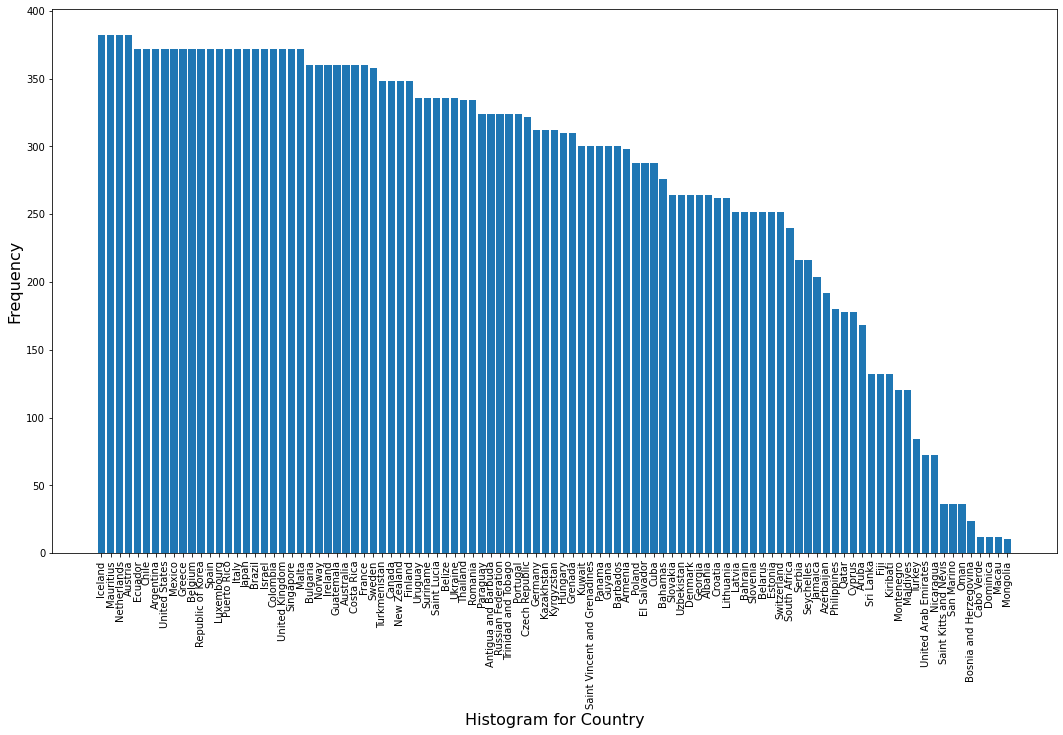

Mode of the data for above graph => ['Iceland', 'Mauritius', 'Netherlands', 'Austria']
Frequency of modal data => 382
Entropy of the data => 4.512115046503917


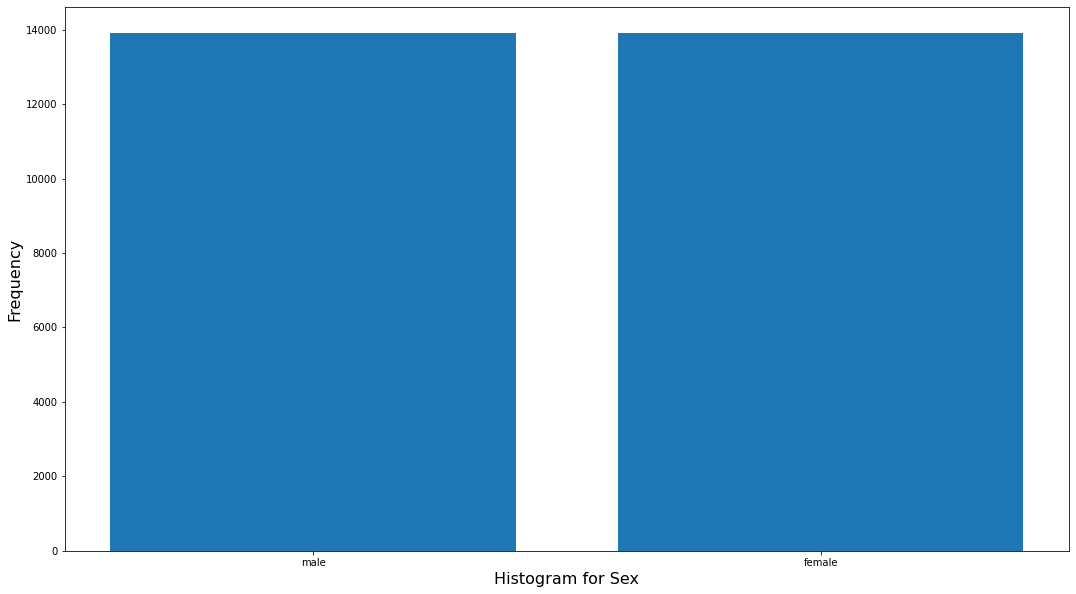

Mode of the data for above graph => ['male', 'female']
Frequency of modal data => 13910
Entropy of the data => 0.6931471805599453


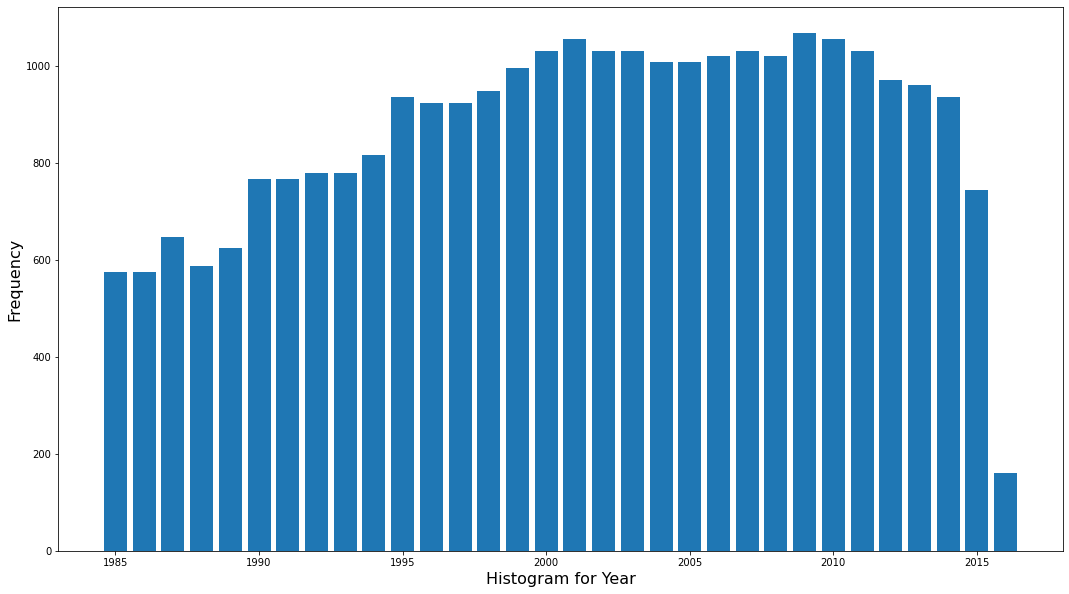

Mode of the data for above graph => [2009]
Frequency of modal data => 1068
Entropy of the data => 3.4329561237563206


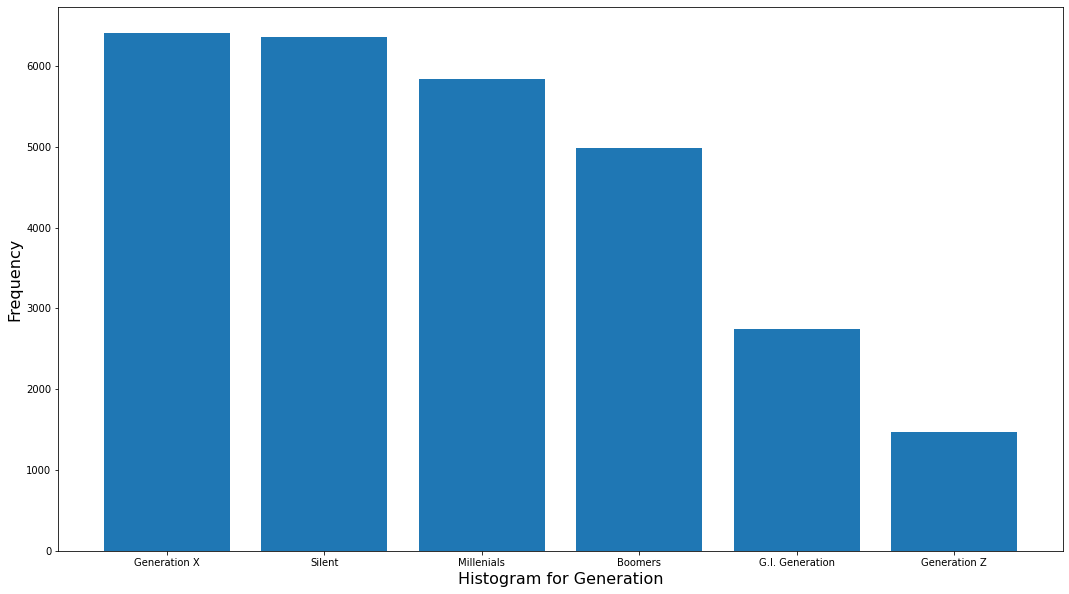

Mode of the data for above graph => ['Generation X']
Frequency of modal data => 6408
Entropy of the data => 1.695449187635522


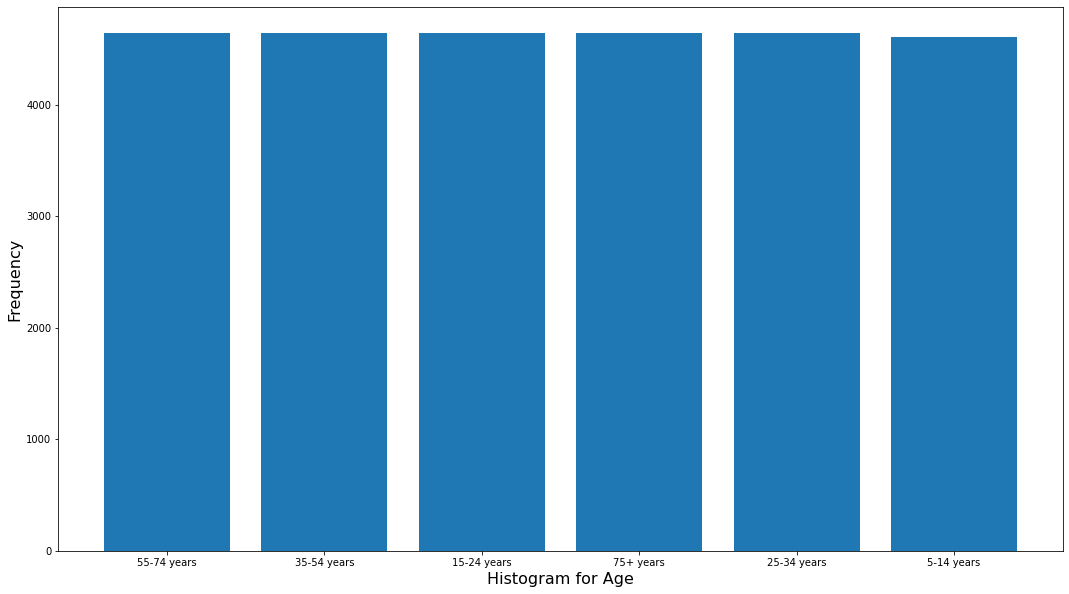

Mode of the data for above graph => ['55-74 years', '35-54 years', '15-24 years', '75+ years', '25-34 years']
Frequency of modal data => 4642
Entropy of the data => 1.7917561564428144


In [76]:
#having the discrete variables
discrete = ['country','sex','year','generation','age']
#changing plot-size of the plots 
plt.rcParams['figure.figsize'] = [18, 10]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20
for i in discrete:
    if(i=='country'):
        #rotating the xticks to give aesthetic appeal to graphs
        plt.xticks(rotation=90)
    #converting this to dictionary to extract keys and values    
    k = dict(data[i].value_counts())
    bars = plt.bar(k.keys(),k.values())
    #finding modal values
    mode = max(k.values())
    #finding modal keys
    modelabels = [i for i in k.keys() if k[i]==mode]
    plt.xlabel("Histogram for "+i.capitalize())
    plt.ylabel("Frequency")
    plt.show()
    print("Mode of the data for above graph =>",modelabels)
    print("Frequency of modal data =>",mode)
    print("Entropy of the data =>",scipy.stats.entropy(data[i].value_counts()))

<h1>1c) Continuous Variables</h1>


<h2>Statistics and Box and Whiskers Plots</h2>

For the variable: suicides_no
Average:  242.57440690150972
Variance:  813661.1958654822
Min: 0
Max: 22338
25th percentile: 3.0
75th percentile: 131.0
Interquartile range: 128.0
Skew: 10.352352118815231


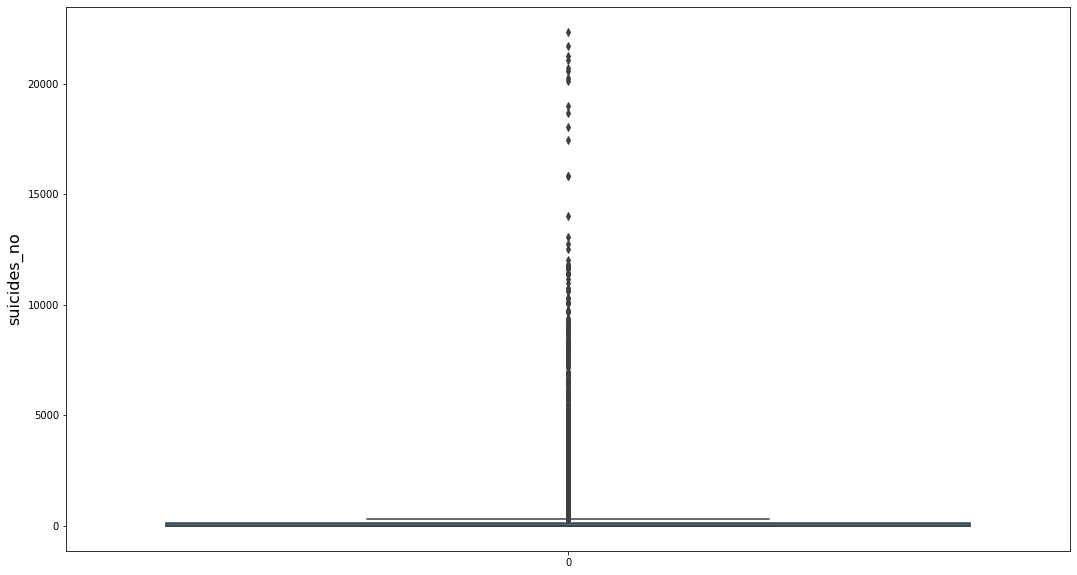

For the variable: population
Average:  1844793.6173975556
Variance:  15301468364340.932
Min: 278
Max: 43805214
25th percentile: 97498.5
75th percentile: 1486143.25
Interquartile range: 1388644.75
Skew: 4.459173975029068


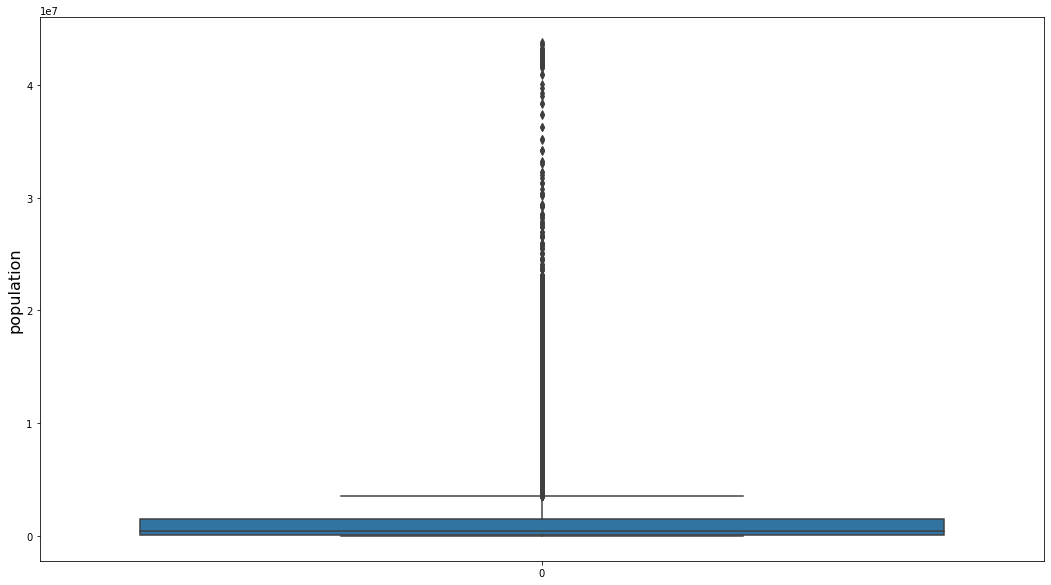

For the variable: suicides/100k pop
Average:  12.816097411933864
Variance:  359.52597619683723
Min: 0.0
Max: 224.97
25th percentile: 0.92
75th percentile: 16.62
Interquartile range: 15.700000000000001
Skew: 2.9632546926986527


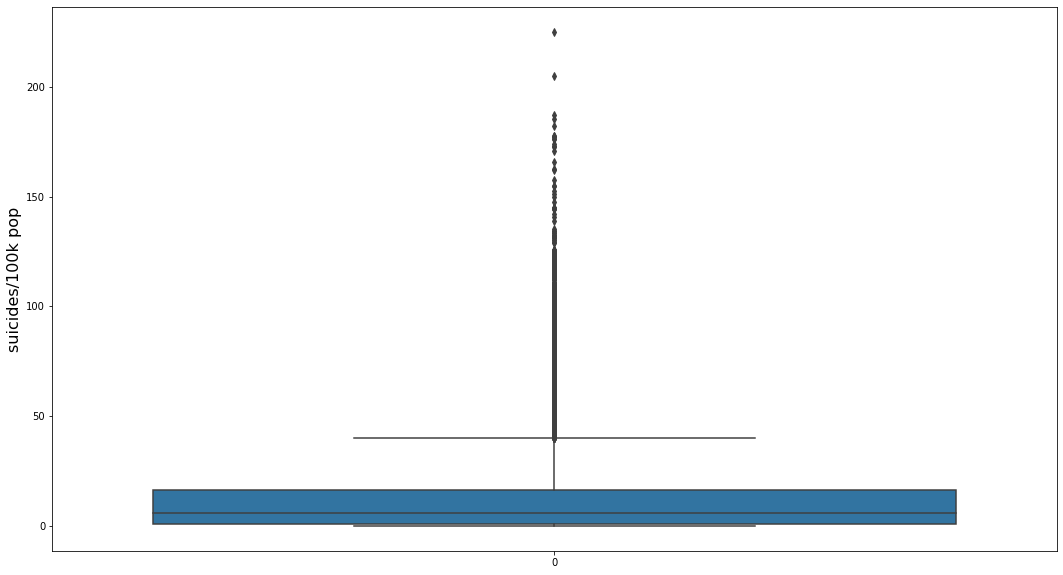

For the variable: HDI for year
Average:  0.7766011477761837
Variance:  0.008716300027377014
Min: 0.483
Max: 0.944
25th percentile: 0.713
75th percentile: 0.855
Interquartile range: 0.14200000000000002
Skew: -0.3008234868371366


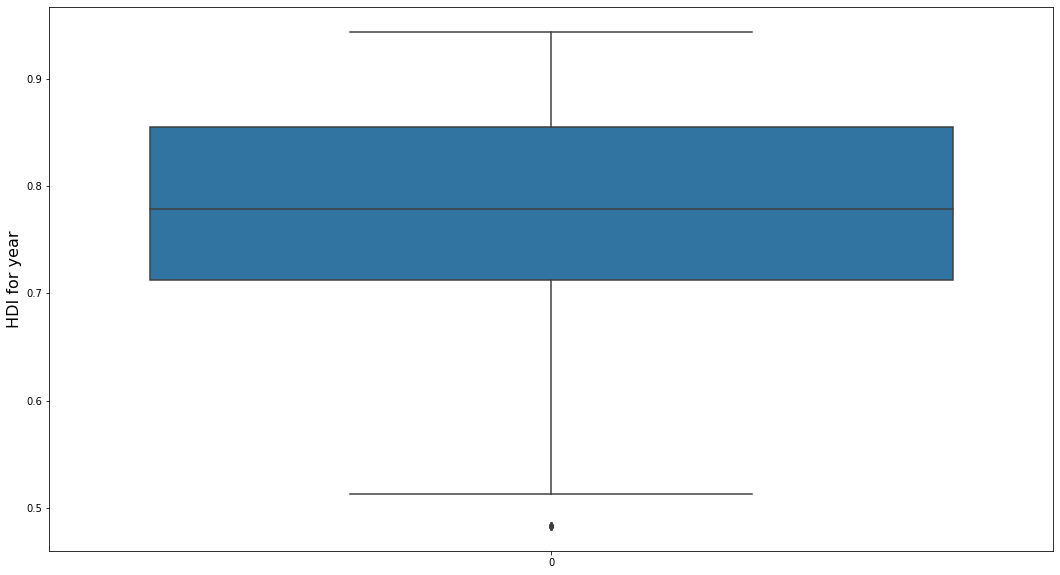

For the variable:  gdp_for_year ($) 
Average:  445580969025.7266
Variance:  2.11290603932235e+24
Min: 46919625
Max: 18120714000000
25th percentile: 8985352832.0
75th percentile: 260202429150.0
Interquartile range: 251217076318.0
Skew: 7.233364988376144


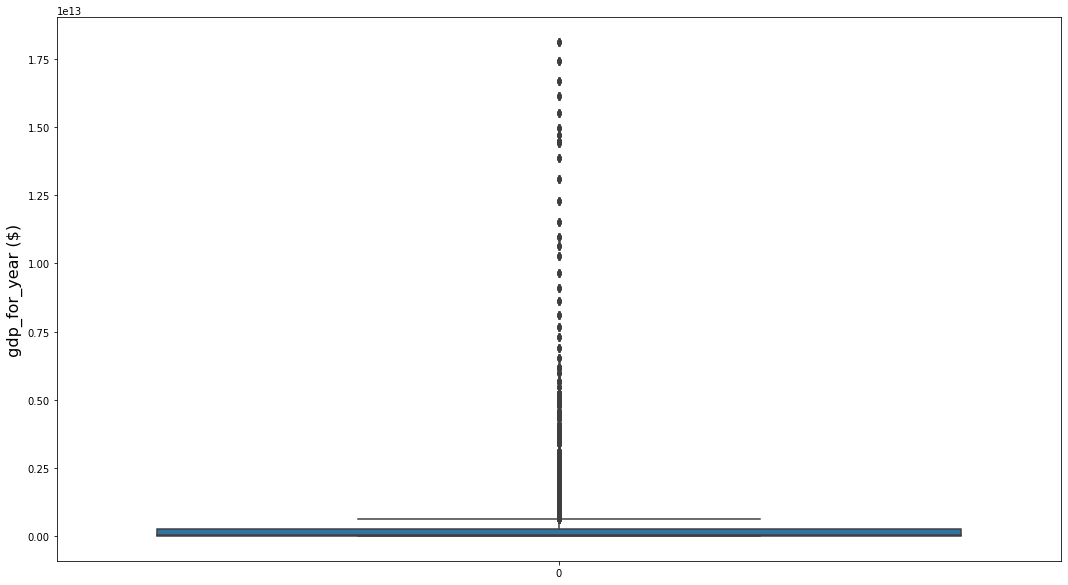

For the variable: gdp_per_capita ($)
Average:  16866.464414090584
Variance:  356727721.8250097
Min: 251
Max: 126352
25th percentile: 3447.0
75th percentile: 24874.0
Interquartile range: 21427.0
Skew: 1.9633641262309738


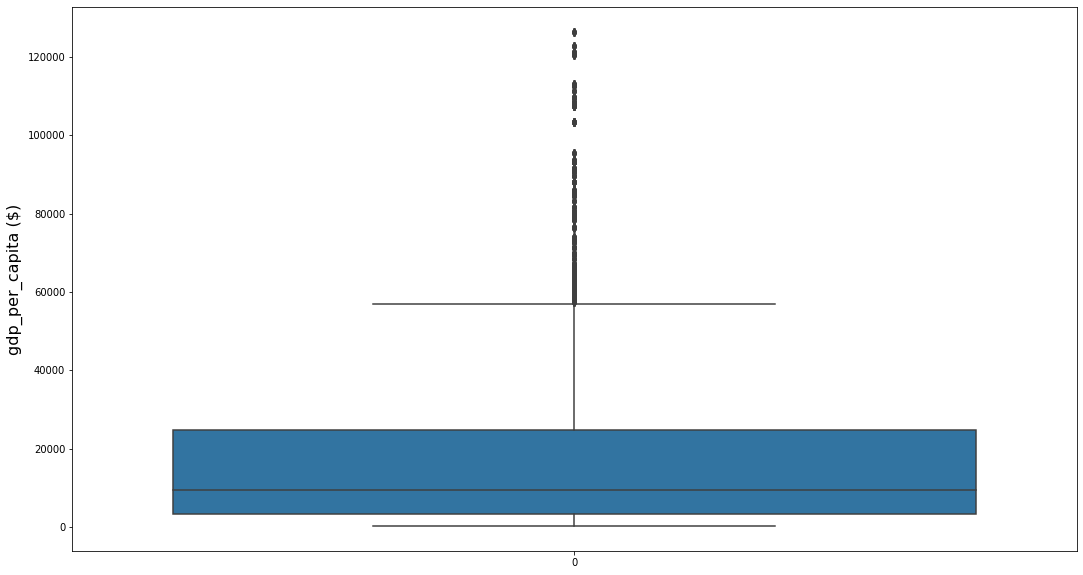

In [77]:
continuous = [i for i in data.columns if i not in discrete and i!='year']
#storing all the continuous values in the list continuous
for i in data.columns:
    if i in continuous:
        k = np.array(data[i])
        #creating a numpy array for the continuous columns
        if(i=="HDI for year"):
            k = k[~np.isnan(k)]
            #removing the nan values
        #displaying various fields
        print("For the variable:",i)
        print("Average: ",np.average(k))
        print("Variance: ",np.var(k))
        print("Min:",min(k))
        print("Max:",max(k))
        print("25th percentile:",np.percentile(k,25))
        print("75th percentile:",np.percentile(k,75))
        print("Interquartile range:",(np.percentile(k,75)-np.percentile(k,25)))
        print('Skew:',scipy.stats.skew(k))
        sns.boxplot(data=k)
        plt.ylabel(i)
        plt.show()

<h2>Histograms</h2>

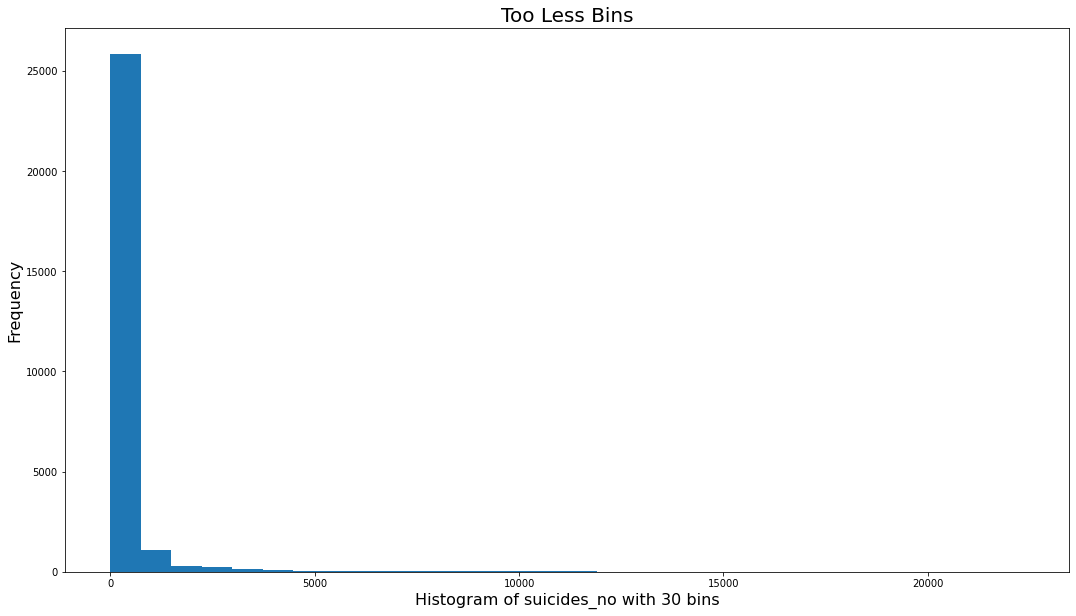

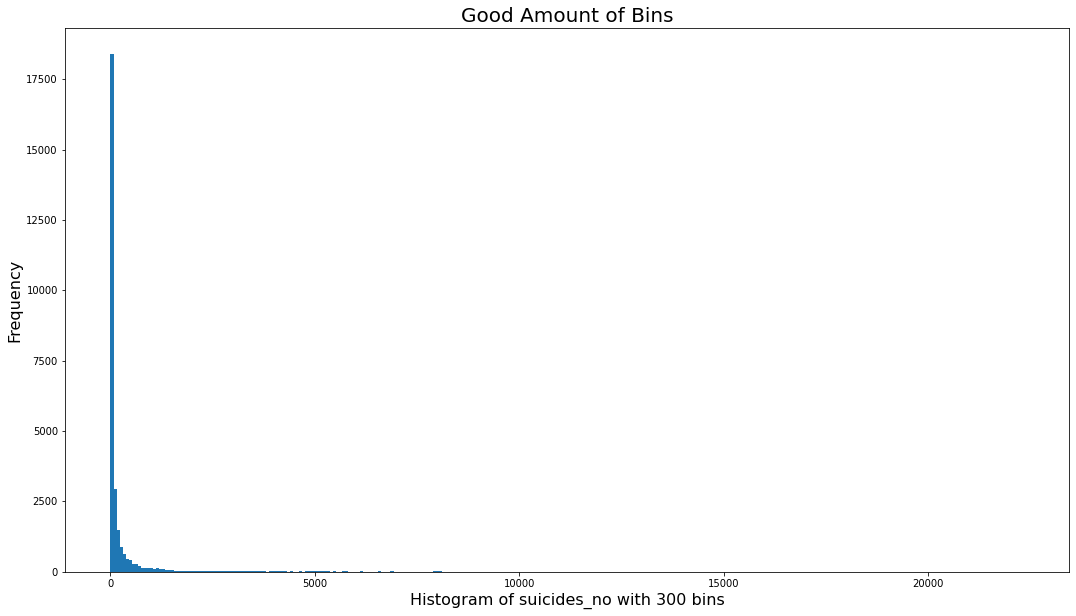

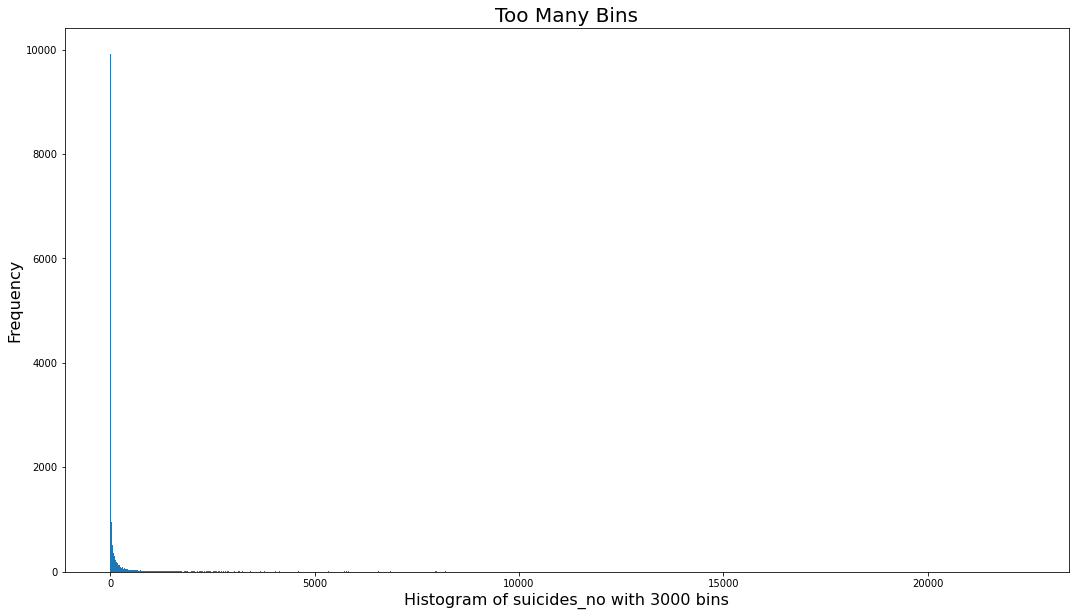

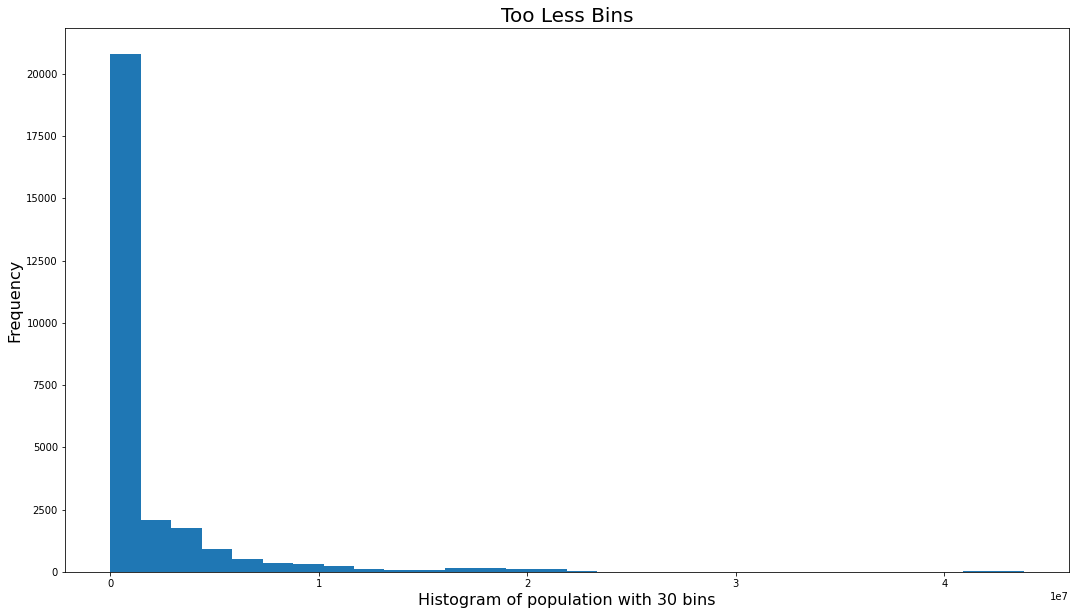

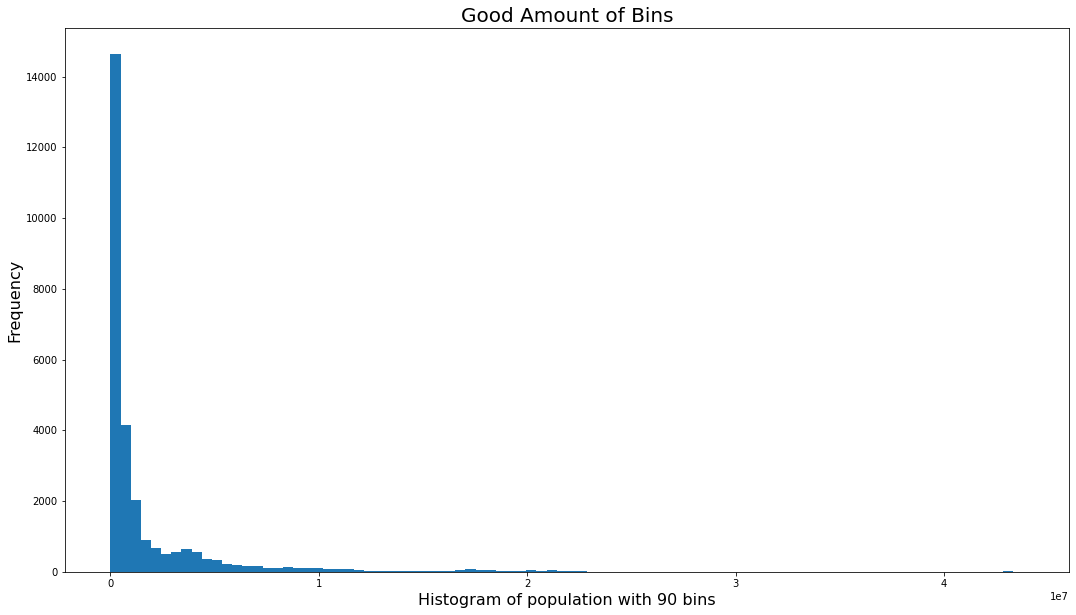

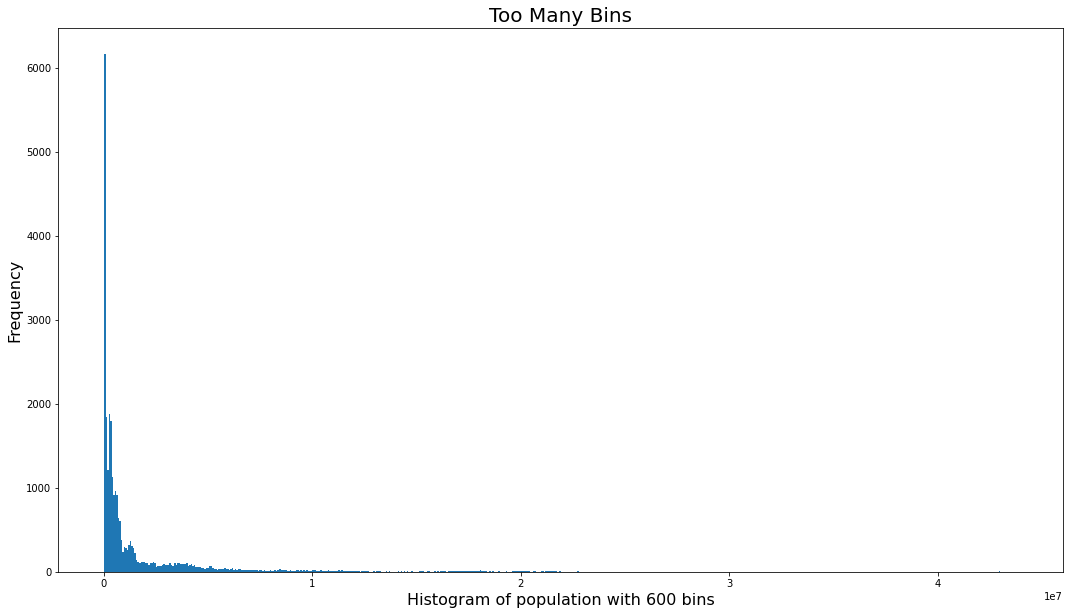

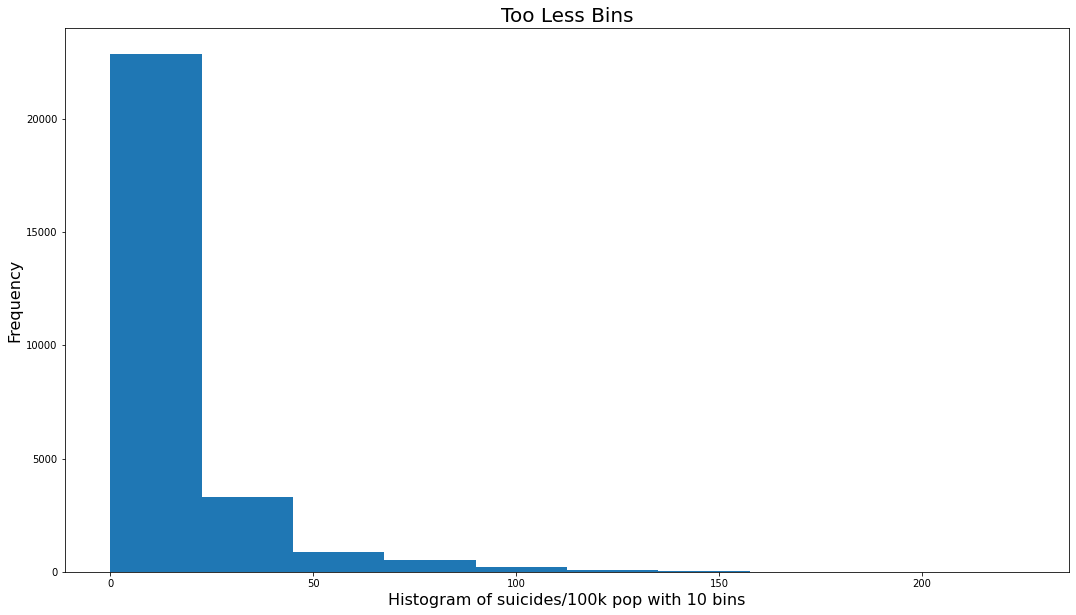

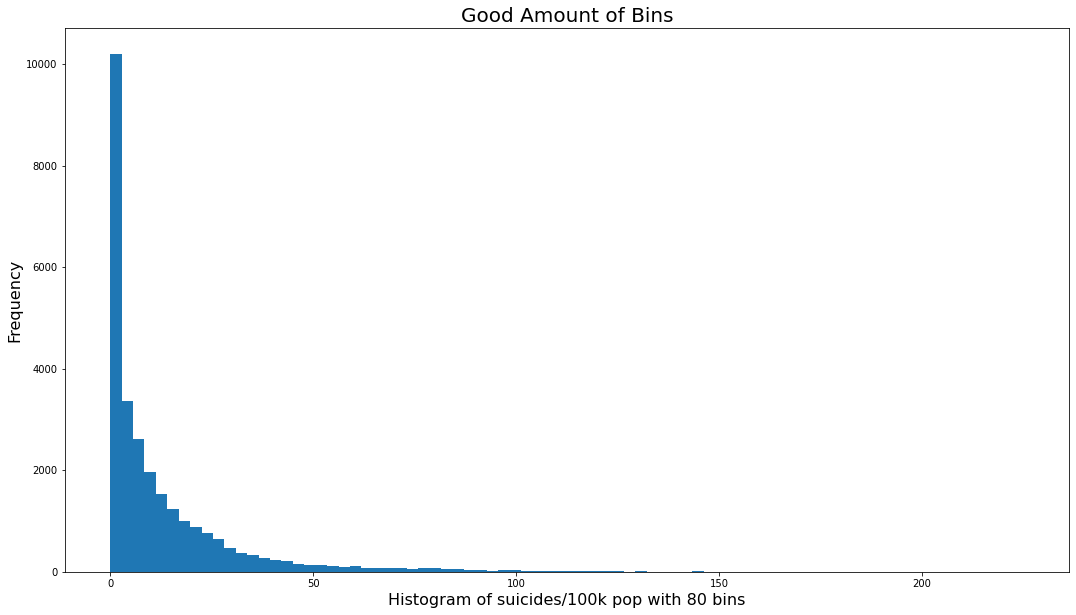

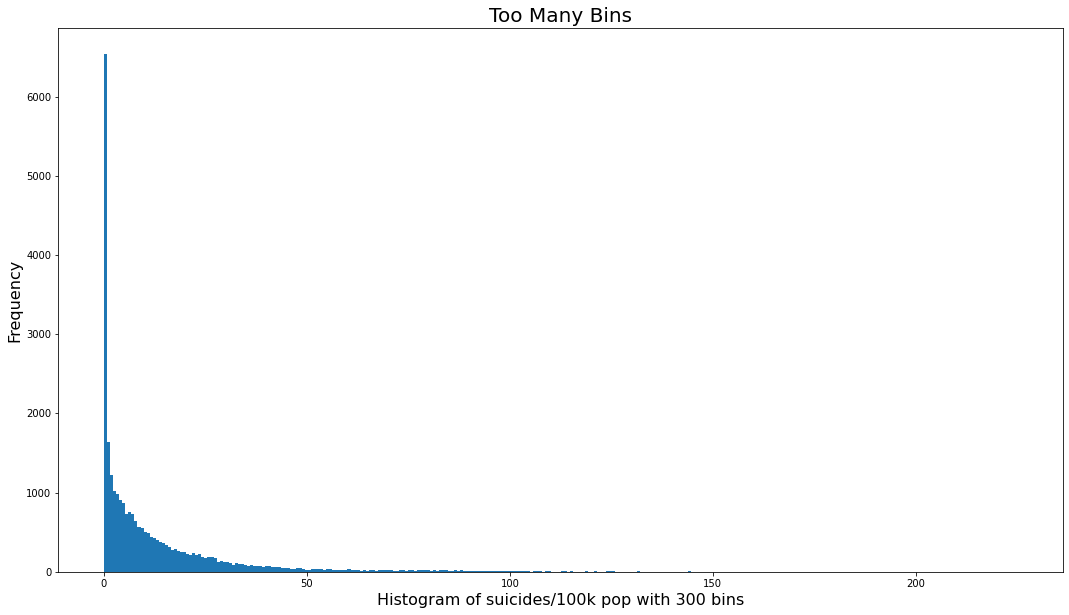

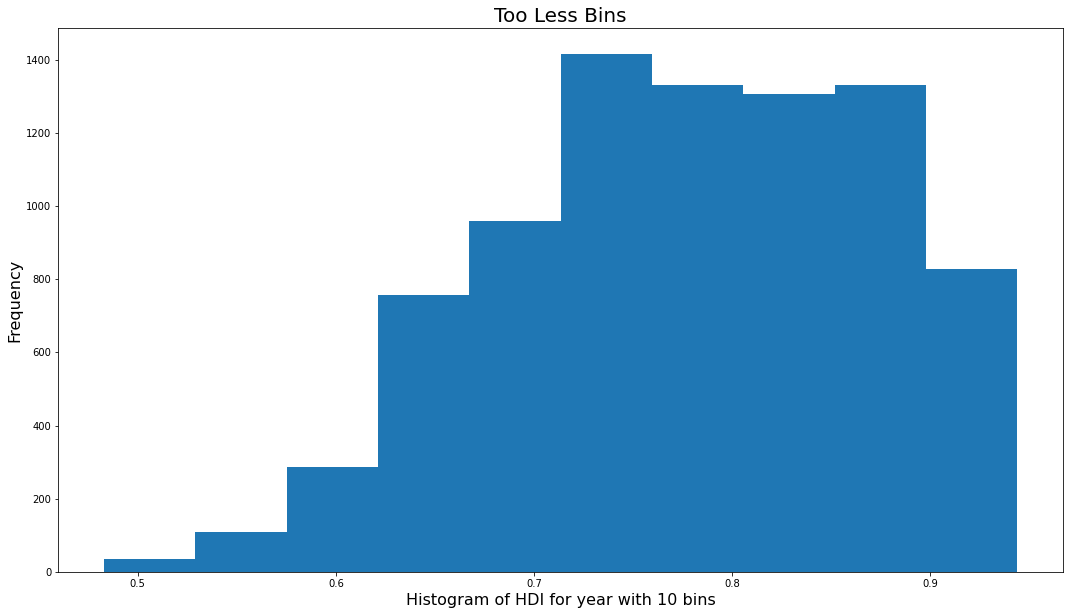

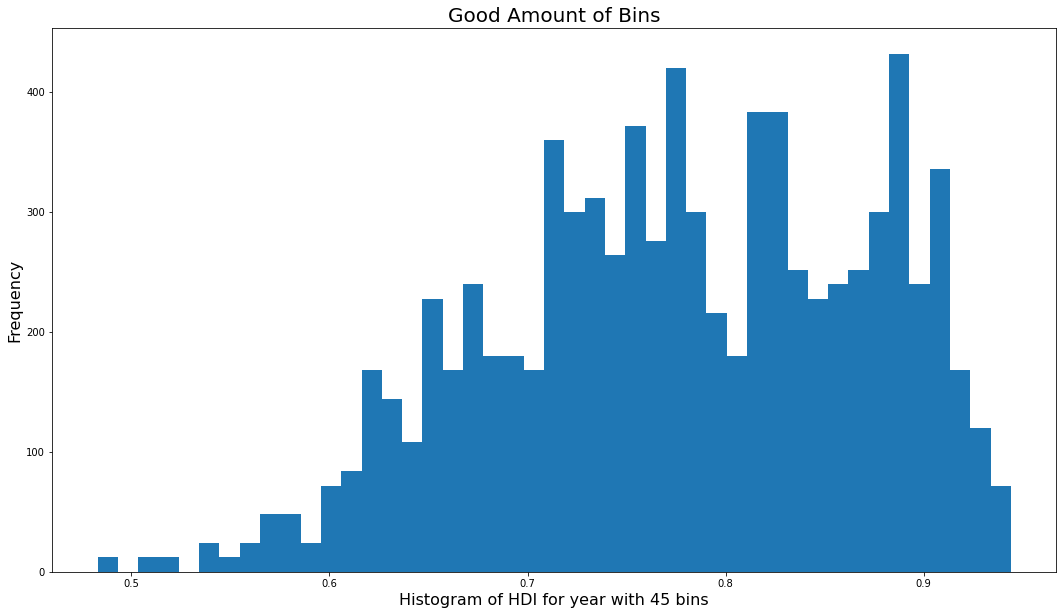

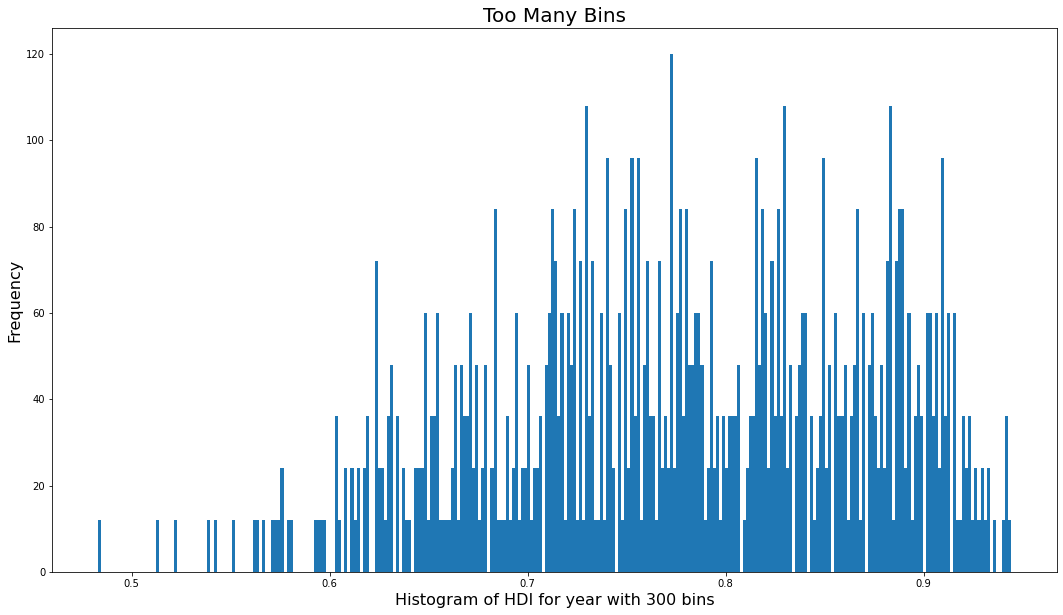

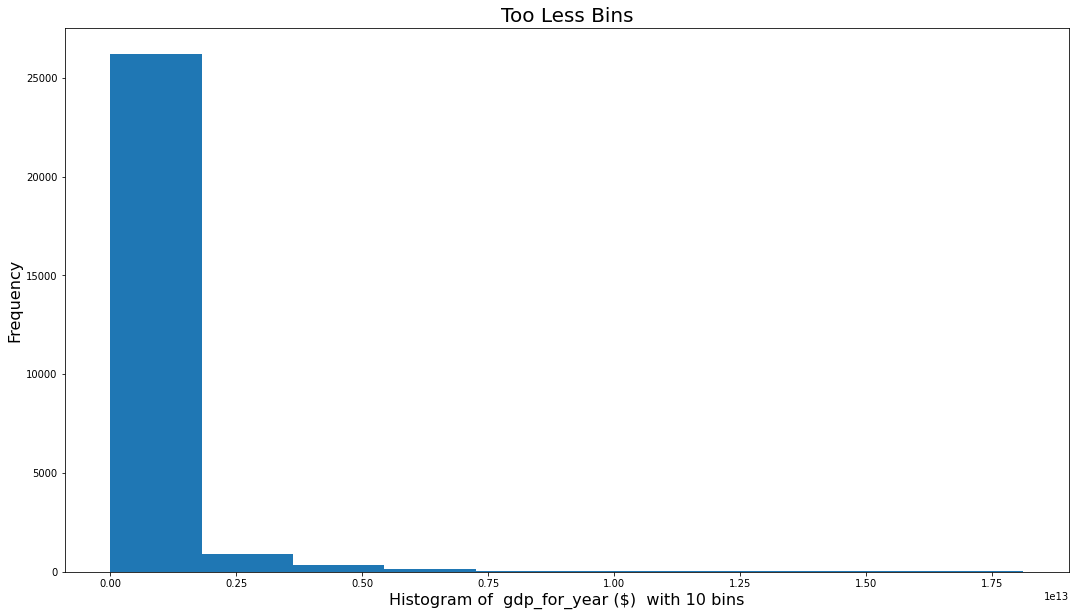

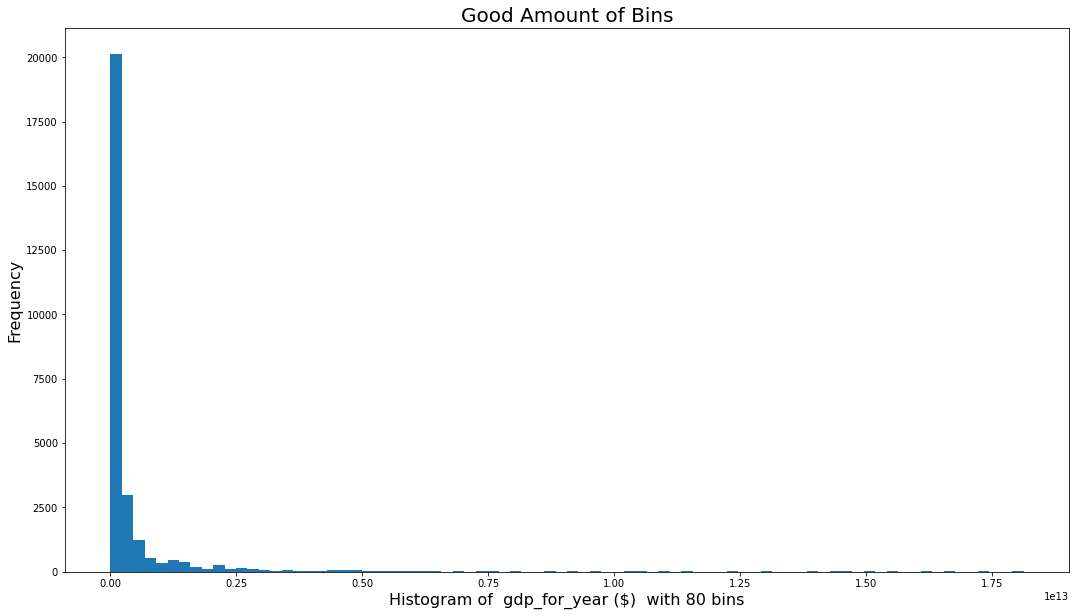

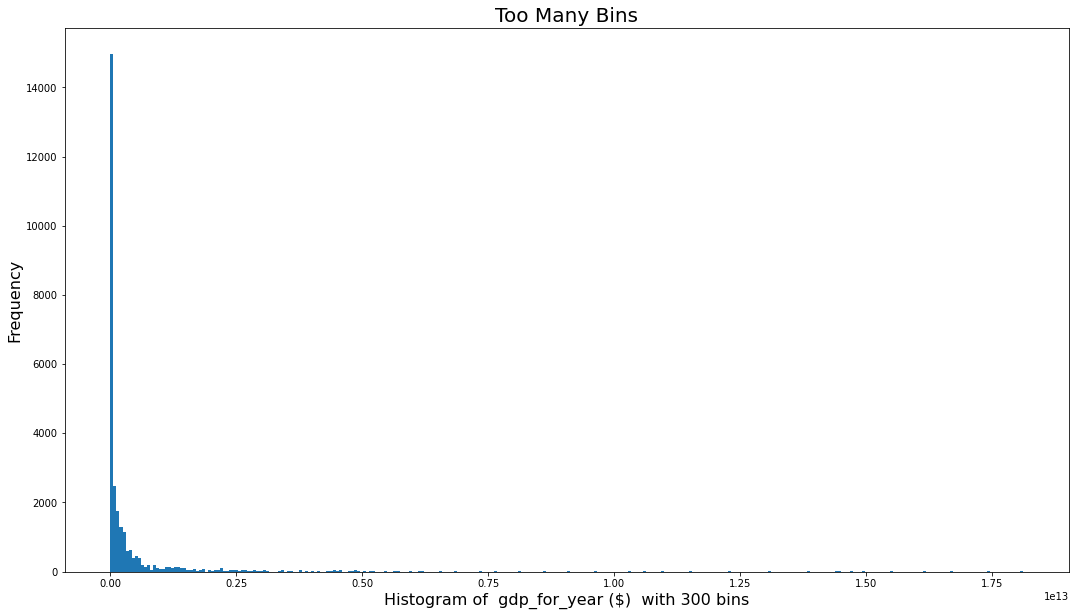

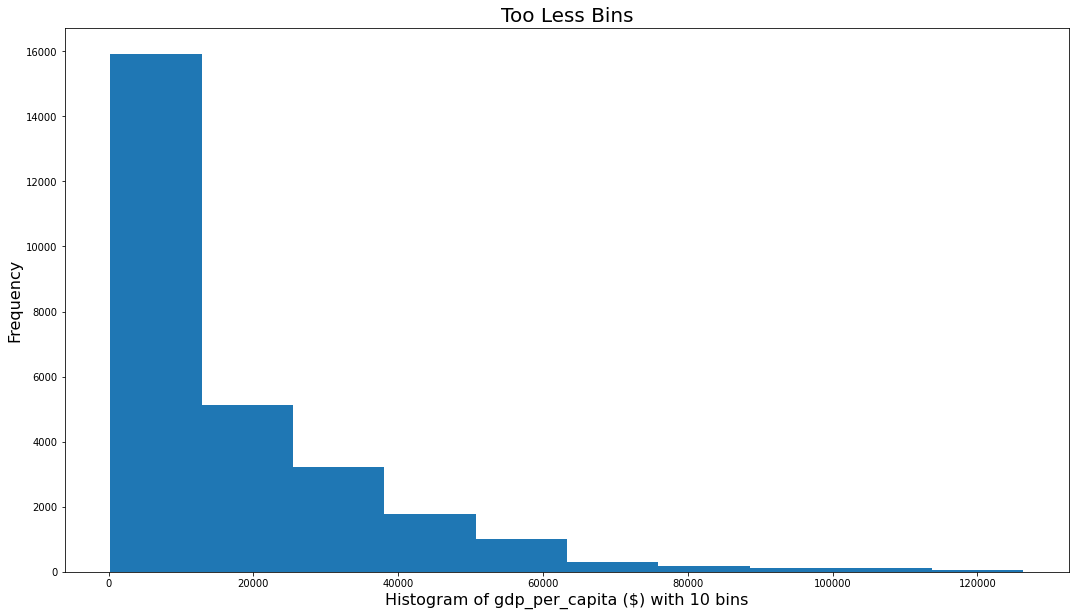

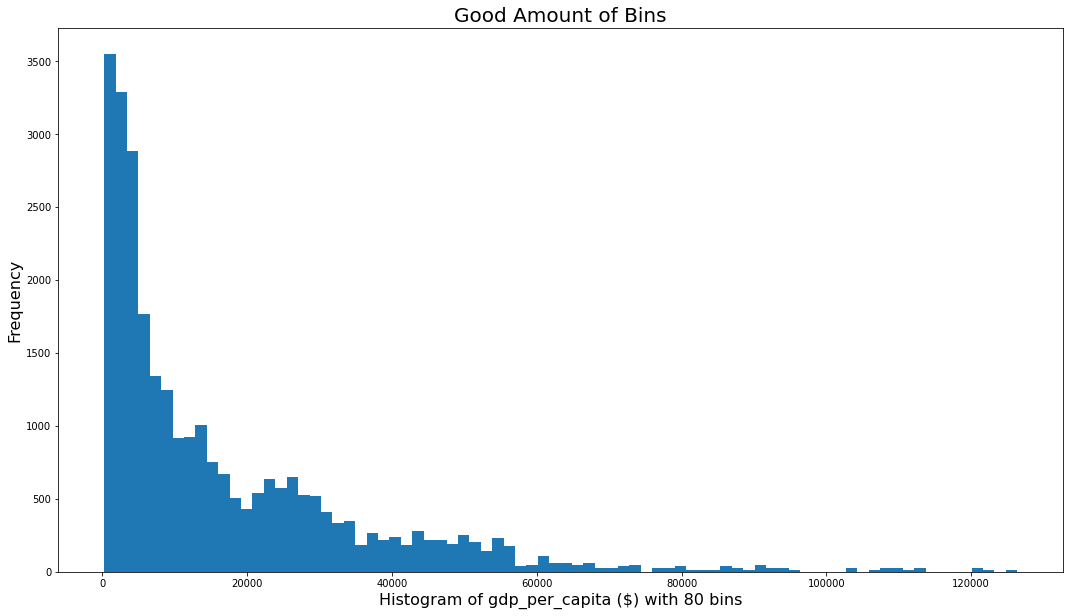

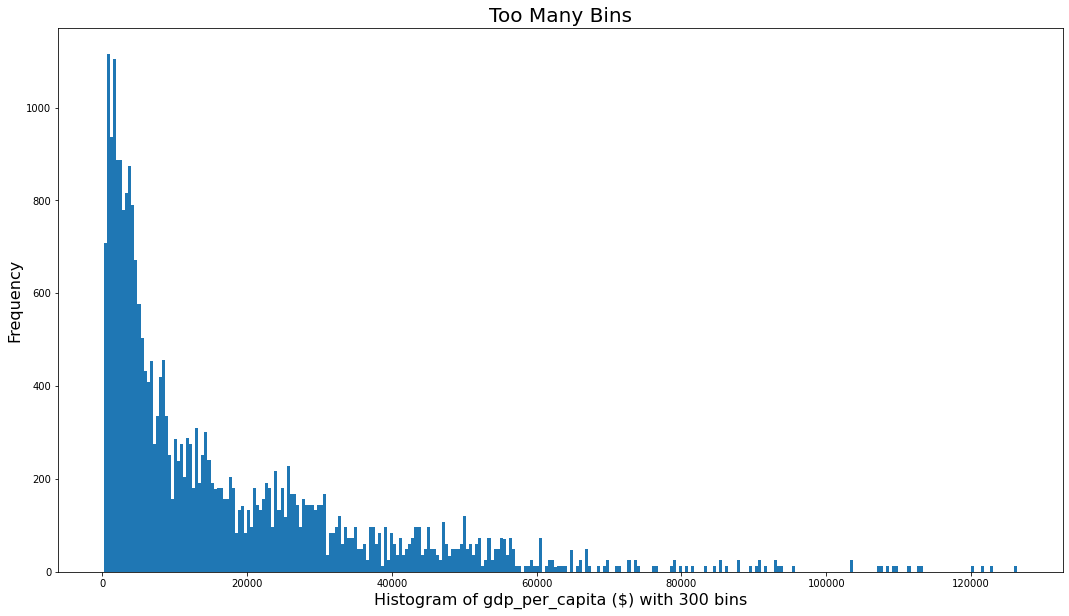

In [78]:
continuous = [i for i in data.columns if i not in discrete and i!='year']
#list containing bins for the histogram
bins = [60,150,300]
headings=['Too Less Bins', 'Good Amount of Bins', 'Too Many Bins']
for i in data.columns:
    if i in continuous:
        #creating numpy array
        k = np.array(data[i])
        if(i=="HDI for year"):
            k = k[~np.isnan(k)]
            bins = [10,45,300]
        elif(i == 'suicides_no'):
            bins = [30,300,3000]
        elif(i=='population'):
            bins = [30,90,600]
        elif(i==' gdp_for_year ($)'):
            bins = [45,90,300]
        else:
            bins = [10,80,300]
            #removing nans
        for j in range(3):
            #plotting a histogram for each entry in the list bins
            plt.hist(k,bins=bins[j])
            plt.title(headings[j])
            plt.ylabel("Frequency")
            plt.xlabel("Histogram of "+i+" with "+str(bins[j])+" bins")
            plt.show()

<h2>QQ Plots for Continuous Variables</h2>

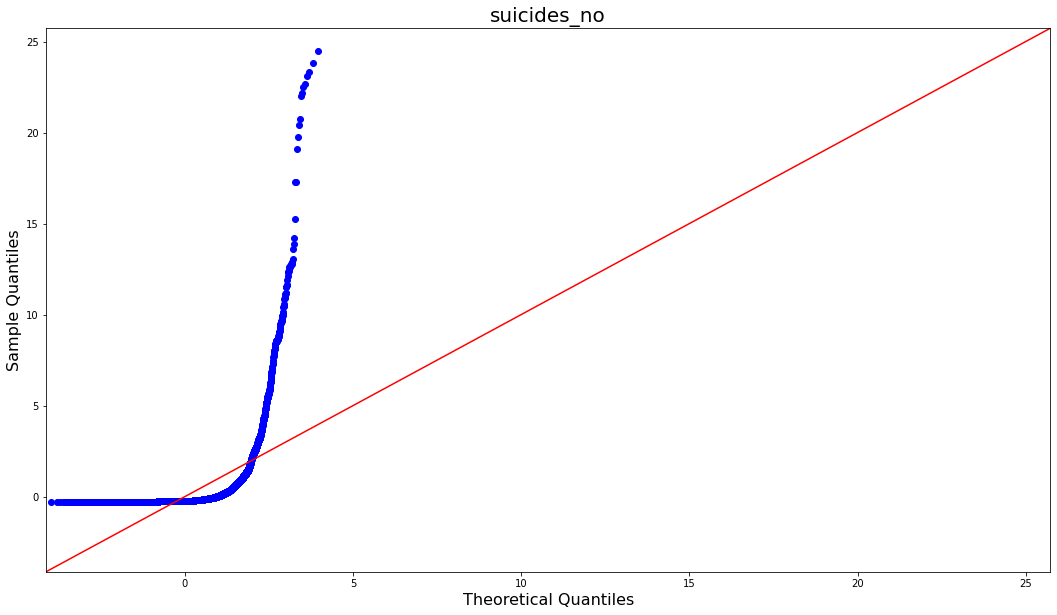

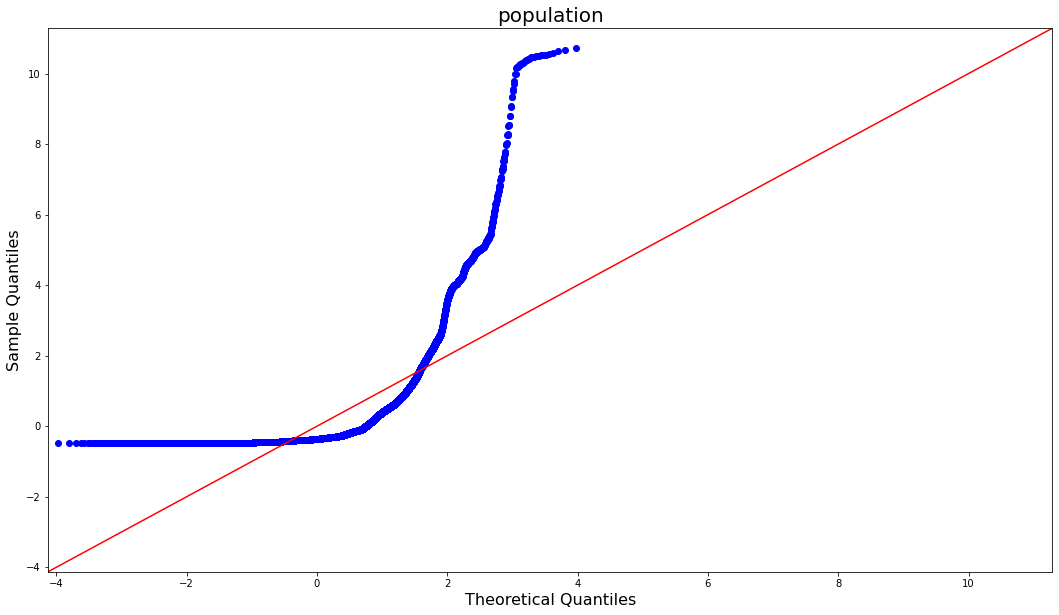

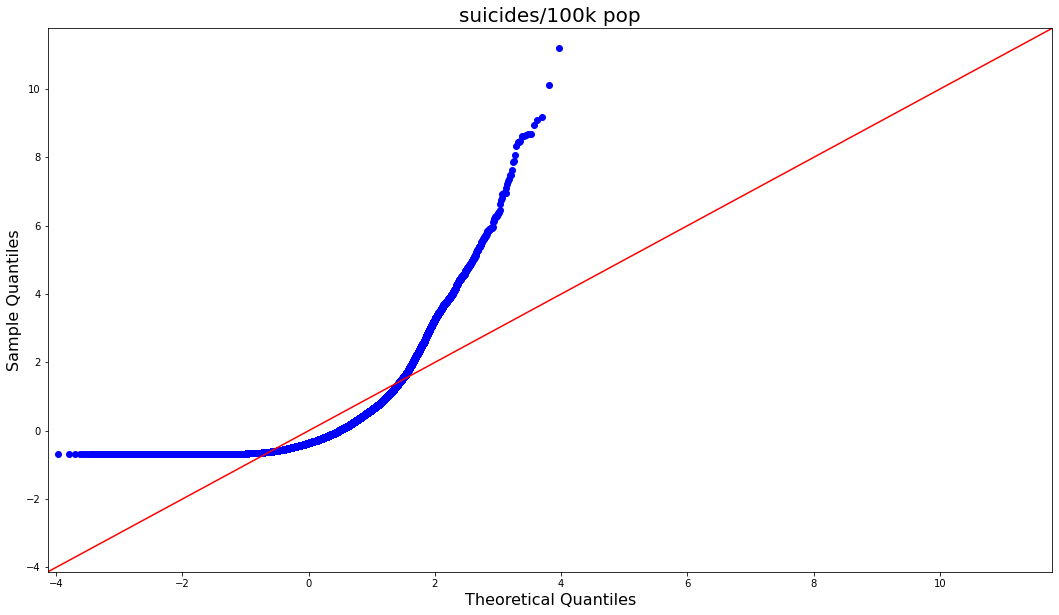

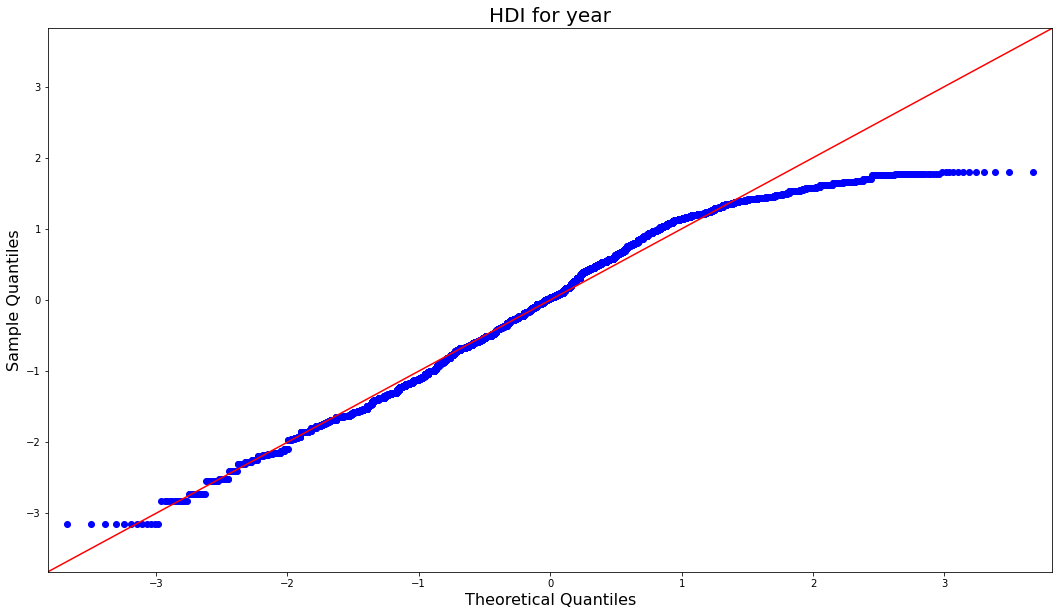

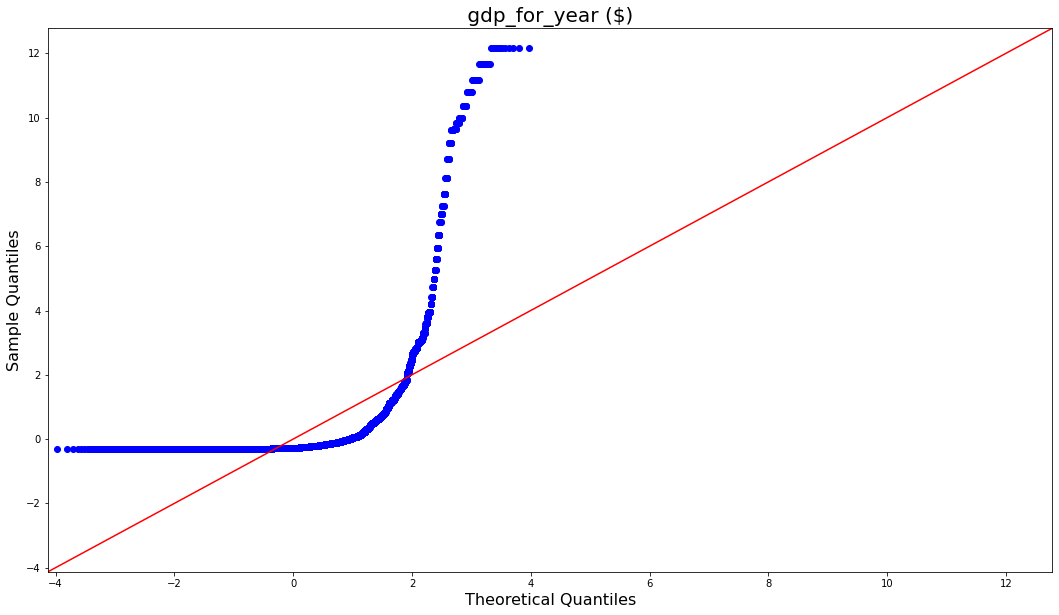

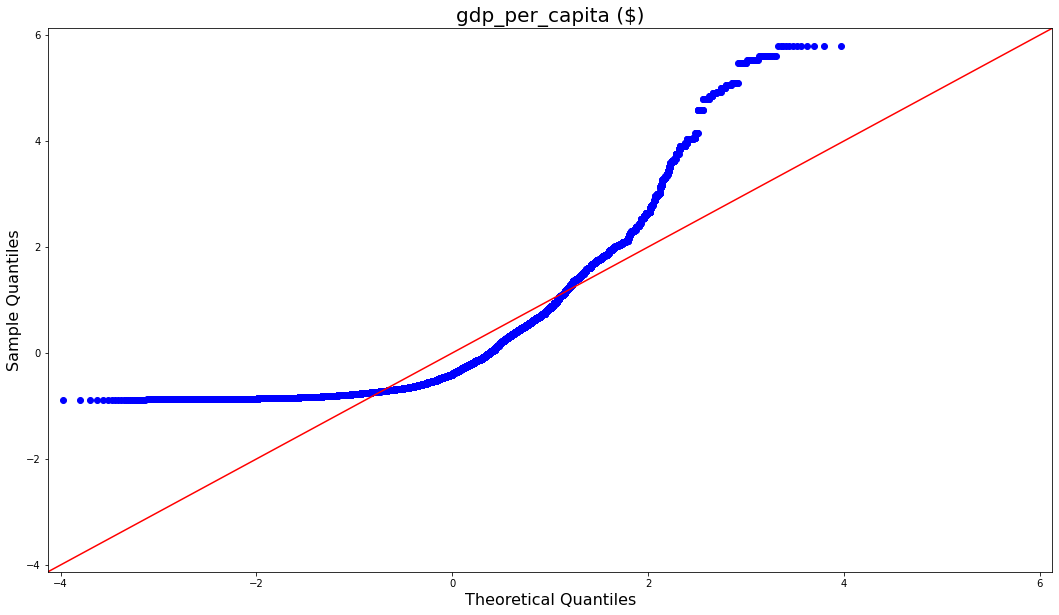

In [79]:
for i in data.columns:
    if i in continuous:
        #creating numpy array for each column
        k = np.array(data[i])
        if(i=="HDI for year"):
            k = k[~np.isnan(k)]
            #removing null values in HDI
        sm.qqplot(data=k,fit=True, line='45')
        plt.title(i)
        plt.show()

<h3>Conclusion: Thus we observe that all the plots except "HDI for year" are right skewed, whereas "HDI for year is nearly not skew".</h3>

<h2>Comparison for Distribution is Log Normal</h2>

In [80]:
for i in data.columns:
    if i in continuous:
        #numpy array creation for each
        k = np.array(data[i])
        if(i == "HDI for year"):
            k = k[~np.isnan(k)]
        #using log normal from scipy.stats 
        shape,location,scale = scipy.stats.lognorm.fit(k)
        mu, sigma = np.log(scale), shape
        #values of the mean and standard deviation of lognormal
        likelihood_lognormal = (scipy.stats.kstest(k, "lognorm", scipy.stats.lognorm.fit(k)))[1]
        #using Kolmogorov-Smirnov test for goodness of fit to get the likelihood of fit
        print('the required fitting factor (likelihood) of',i , 'being lognormal distributed is :',likelihood_lognormal)

the required fitting factor (likelihood) of suicides_no being lognormal distributed is : 0.0
the required fitting factor (likelihood) of population being lognormal distributed is : 2.5883570199465803e-155
the required fitting factor (likelihood) of suicides/100k pop being lognormal distributed is : 0.0
the required fitting factor (likelihood) of HDI for year being lognormal distributed is : 5.705852646856234e-23
the required fitting factor (likelihood) of  gdp_for_year ($)  being lognormal distributed is : 4.315764177045786e-29
the required fitting factor (likelihood) of gdp_per_capita ($) being lognormal distributed is : 0.0


<h3>Since the Fitting Factors/Likelihood of the distribution is very close to 0, hence it is not log normal distributed.</h3>

<h1>1d) Pair-wise Interaction</h1>

<h2>Box Plot Creation of Discrete - Continuous Pair</h2>

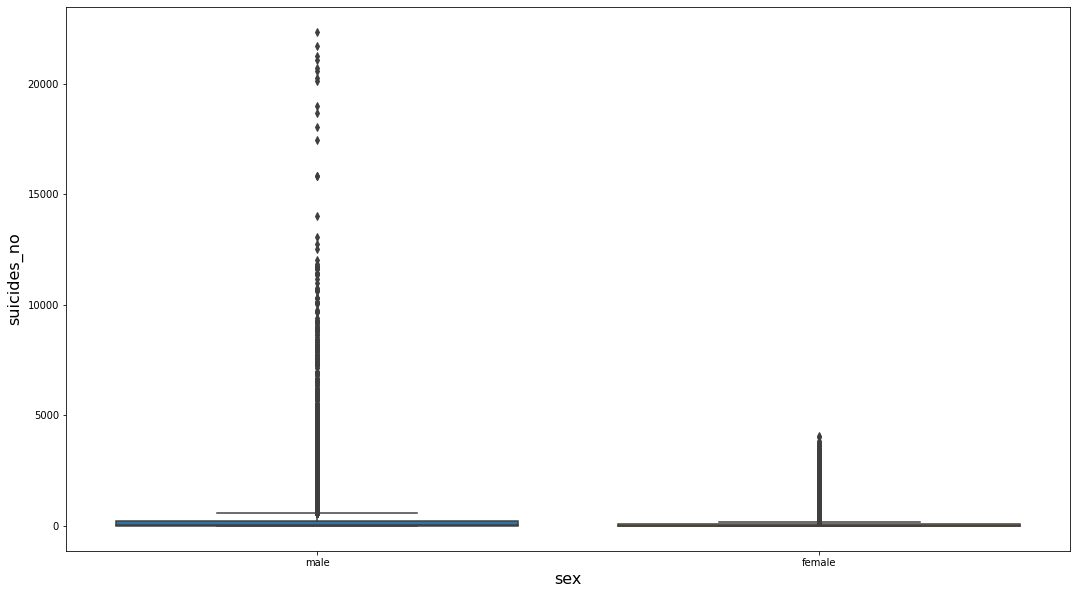

In [81]:
#using boxplot function of seaborn 
#First pair taken is sex and suicides_no
sns.boxplot(x='sex',y='suicides_no',data=data)
plt.show()

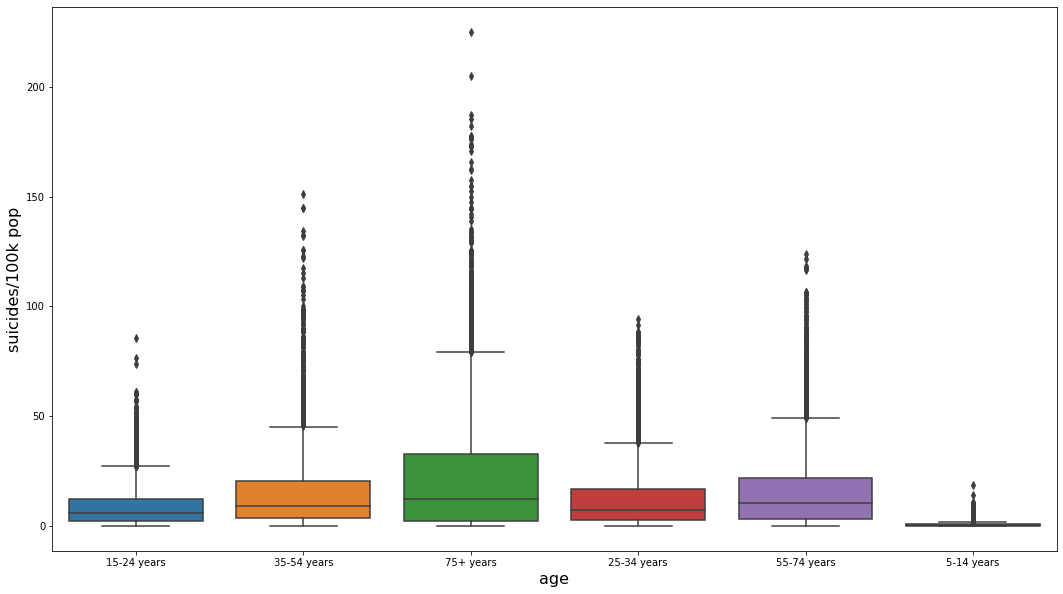

In [82]:
#Second pair taken is age and suicides/per100k pop
sns.boxplot(x='age',y='suicides/100k pop',data=data)
plt.show()

<h2>Heatmap of correlation with all continuous RVs</h2>

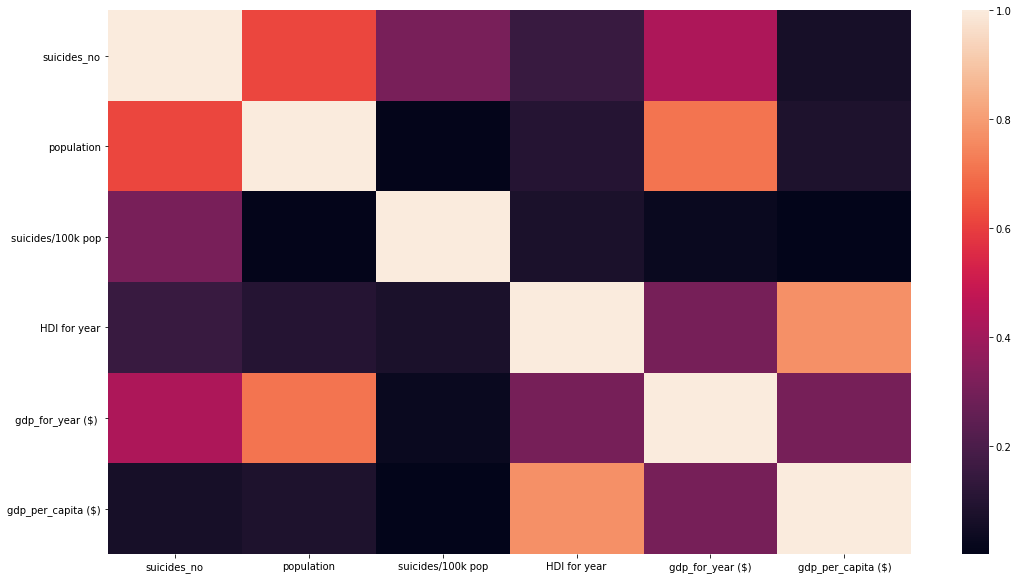

In [83]:
#using heatmap function of seaborn 
sns.heatmap(data[continuous].corr())
#making yticks horizontal
plt.yticks(rotation=0)
plt.show()

<h1>1d) (iii) Creative Part - EDA of Dataset Chosen - Engineering Colleges in India</h1>

<h2>Dataset was taken from the following website <a href="https://www.kaggle.com/shrirangmhalgi/engineering-colleges-in-india">https://www.kaggle.com/shrirangmhalgi/engineering-colleges-in-india</a></h2>

In [84]:
#reading from CSV file
info = pd.read_csv("engineering colleges in India.csv")
info

,College Name,Genders Accepted,Campus Size,Total Student Enrollments,Total Faculty,Established Year,Rating,University,Courses,Facilities,City,State,Country,College Type,Average Fees
0,National Institute of Technology Rourkela,Co-Ed,647 Acres,4811,329,2007,3.12,NaN,"B.Tech Mechanical Engineering, B.Tech Computer...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Rourkela,Odisha,India,Public/Government,350600.0
1,Visvesvaraya National Institute of Technology ...,Co-Ed,215 Acres,1071,192,2007,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Nagpur,Maharashtra,India,Public/Government,273596.6666666667
2,Netaji Subhas University of Technology,Co-Ed,145 Acres,3759,101,2018,NaN,NaN,"B.Tech Computer Engineering, B.Tech Electronic...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",New Delhi,Delhi,India,Public/Government,352320.0
3,Birla Institute of Technology,Co-Ed,980 Acres,4506,284,1955,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Ranchi,Jharkhand,India,Private,596686.0465116279
4,International Institute of Information Technology,Co-Ed,66 Acres,1721,85,2001,3.05,NaN,"B.Tech Computer Science and Engineering, M.Tec...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Hyderabad,Telangana,India,Private,756666.6666666666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441,BES Institute of Technology,Co-Ed,4 Acres,NaN,31,2003,NaN,NaN,"Diploma in Civil Engineering, Diploma in Compu...","Girls Hostel, Library, Sports, Cafeteria, Audi...",Bengaluru,Karnataka,India,Private,38490.0
5442,Radical Polytechnic College,Co-Ed,NaN,NaN,NaN,2013,NaN,NaN,"Diploma in Civil Engineering, Diploma in Mecha...","Boys Hostel, Girls Hostel, Library, Sports, Wi...",Amritsar,Punjab,India,Private,75100.0
5443,Trimurti Institute of Technology Polytechnic,Co-Ed,NaN,22,55,2009,NaN,NaN,"Diploma in Electrical Engineering, Diploma in ...","Library, Sports, IT Infrastructure, Laboratories",Paldhi,Maharashtra,India,Private,157000.0
5444,RV Parankar College of Engineering and Technology,Co-Ed,NaN,38,10,2015,NaN,Rashtrasant Tukadoji Maharaj Nagpur University...,"BE Civil Engineering, BE Electrical Engineerin...","Library, Sports, Cafeteria, Auditorium, IT Inf...",Arvi,Maharashtra,India,Private,272000.0


In [85]:
#Number of Records
#Number of Variables
print("No of records:",len(info))
print("No of variables:",len(info.columns))

No of records: 5446
No of variables: 15


In [86]:
#Printing the number of unique values in the Columns
for i in info.columns:
    k = info[i].unique()
    print("Column:",i," => No of unique values:",len(k))
    if(len(k)<=35):
        print("The unique values for",i,"is",k)

Column: College Name  => No of unique values: 4831
Column: Genders Accepted  => No of unique values: 6
The unique values for Genders Accepted is ['Co-Ed' 'Female' 'Genders Accepted' nan 'Male' 'Co-Ed5666656']
Column: Campus Size  => No of unique values: 256
Column: Total Student Enrollments  => No of unique values: 2209
Column: Total Faculty  => No of unique values: 421
Column: Established Year  => No of unique values: 112
Column: Rating  => No of unique values: 111
Column: University  => No of unique values: 199
Column: Courses  => No of unique values: 4767
Column: Facilities  => No of unique values: 1813
Column: City  => No of unique values: 2389
Column: State  => No of unique values: 35
The unique values for State is ['Odisha' 'Maharashtra' 'Delhi' 'Jharkhand' 'Telangana' 'Karnataka'
 'Uttar Pradesh' 'Punjab' 'Tamil Nadu' 'Gujarat' 'West Bengal' 'Kerala'
 'Haryana' 'Rajasthan' 'Madhya Pradesh' 'Assam' 'Chandigarh'
 'Andhra Pradesh' 'Chhattisgarh' 'Bihar' 'Himachal Pradesh' 'Manipur'

In [87]:
print(info.dtypes)

College Name                 object
Genders Accepted             object
Campus Size                  object
Total Student Enrollments    object
Total Faculty                object
Established Year             object
Rating                       object
University                   object
Courses                      object
Facilities                   object
City                         object
State                        object
Country                      object
College Type                 object
Average Fees                 object
dtype: object


In [88]:
#There seems to be some discrepancy in columns, country column is unnessecary as colleges are in India
#Certain missing values are named same as the Column name and not as nan hence fixing that for such columns
 
info["Genders Accepted"].replace({"Genders Accepted":np.nan,"Co-Ed5666656":np.nan}, inplace = True) 
info["College Type"].replace({"College Type":np.nan}, inplace = True)
info["Total Student Enrollments"].replace({"Total Student Enrollments":np.nan}, inplace=True)
info["Total Faculty"].replace({"Total Faculty":np.nan}, inplace=True)
info["Rating"].replace({"Rating":np.nan}, inplace=True)
info["Average Fees"].replace({"Average Fees":np.nan},inplace=True)
info["Campus Size"].replace({"Campus Size":np.nan}, inplace=True)
info["Established Year"].replace({"Established Year":np.nan}, inplace=True)
del(info["Country"])
info['Campus Size'].replace('Acres','', regex=True, inplace=True)
info['Campus Size'].replace('Acre','', regex=True, inplace=True)

#printing new corrected data unique values
for i in info.columns:
    k = info[i].unique()
    print("Column:",i," => No of unique values:",len(k))
    if(len(k)<=35):
        print("The unique values for",i,"is",k)

Column: College Name  => No of unique values: 4831
Column: Genders Accepted  => No of unique values: 4
The unique values for Genders Accepted is ['Co-Ed' 'Female' nan 'Male']
Column: Campus Size  => No of unique values: 255
Column: Total Student Enrollments  => No of unique values: 2208
Column: Total Faculty  => No of unique values: 420
Column: Established Year  => No of unique values: 111
Column: Rating  => No of unique values: 110
Column: University  => No of unique values: 199
Column: Courses  => No of unique values: 4767
Column: Facilities  => No of unique values: 1813
Column: City  => No of unique values: 2389
Column: State  => No of unique values: 35
The unique values for State is ['Odisha' 'Maharashtra' 'Delhi' 'Jharkhand' 'Telangana' 'Karnataka'
 'Uttar Pradesh' 'Punjab' 'Tamil Nadu' 'Gujarat' 'West Bengal' 'Kerala'
 'Haryana' 'Rajasthan' 'Madhya Pradesh' 'Assam' 'Chandigarh'
 'Andhra Pradesh' 'Chhattisgarh' 'Bihar' 'Himachal Pradesh' 'Manipur'
 'Uttarakhand' 'Tripura' 'Goa' 'J

In [89]:
#changing numeric data to numerical datatypes since all datatypes are object
info.infer_objects()
info['Total Student Enrollments'] = pd.to_numeric(info['Total Student Enrollments'])
info['Total Faculty'] = pd.to_numeric(info['Total Faculty'])
info['Rating'] = pd.to_numeric(info['Rating'])
info['Average Fees'] = pd.to_numeric(info['Average Fees'])
info['Campus Size'] = pd.to_numeric(info['Campus Size'])
info['Established Year'] = pd.to_numeric(info['Established Year'])

<h2>Statistical Data Types</h2>
<ul>
<li>We assign categorical if the number of unique entries is <= 35 and statistically finite.</li>
<li>We assign nominal if it is categorical and doesn't carry numerical importance</li>
<li>We assign ordinal if it is categorical and carries order importance.</li>
<li>We assign temporal if it has time data (timestamp)</li>
<li>We assign integer data if it has large no of (nearly continuous) integer and doesn't carry order importance.</li>
<li>If it carries decimal data we assign continuous variable type.</li>

<h3>Thus we assign the following statistical datatypes</h3>
<ul>
<li>College Name - categorical (nominal)</li>
<li>Genders Accepted - categorical(nominal)</li>
<li>Campus Size - integer (native) - continuous</li>
<li>Total Student Enrollment - integer (native) - continuous </li>
<li>Total Faculty - integer (native) - continuous</li>
<li>Estabalished Year - Temporal</li>
<li>Rating - continuous</li>
<li>University - categorical (nominal)</li>
<li>Courses - categorical (nominal)</li>
<li>Facilities - categorical (nominal)</li>
<li>City - categorical(nominal)</li>
<li>State - categorical (nominal)</li>
<li>College Type - categorical(nominal)</li>
<li>Average Fees - continuous</li>				
</ul>

In [90]:
continuous = ["Campus Size","Total Student Enrollments", "Total Faculty", "Rating","Average Fees","Established Year"]
discrete = ["Genders Accepted","State"]
#The remaining data doesn't carry statistical relevance and is college specific data and doesn't talk about the statistical properties of the dataset

In [91]:
#Showing the number of null data entries
print("Null Data")
print(info.isnull().sum())

Null Data
College Name                    0
Genders Accepted               25
Campus Size                  2757
Total Student Enrollments    1009
Total Faculty                 167
Established Year              107
Rating                       5119
University                   1936
Courses                         0
Facilities                     12
City                            0
State                           0
College Type                    7
Average Fees                    6
dtype: int64


In [92]:
#Showing the number of not null data entries
print("Not Null Data")
print(info.notnull().sum())

Not Null Data
College Name                 5446
Genders Accepted             5421
Campus Size                  2689
Total Student Enrollments    4437
Total Faculty                5279
Established Year             5339
Rating                        327
University                   3510
Courses                      5446
Facilities                   5434
City                         5446
State                        5446
College Type                 5439
Average Fees                 5440
dtype: int64


<h1>Discrete Variables</h1>
<h2>Histogram Plots</h2>

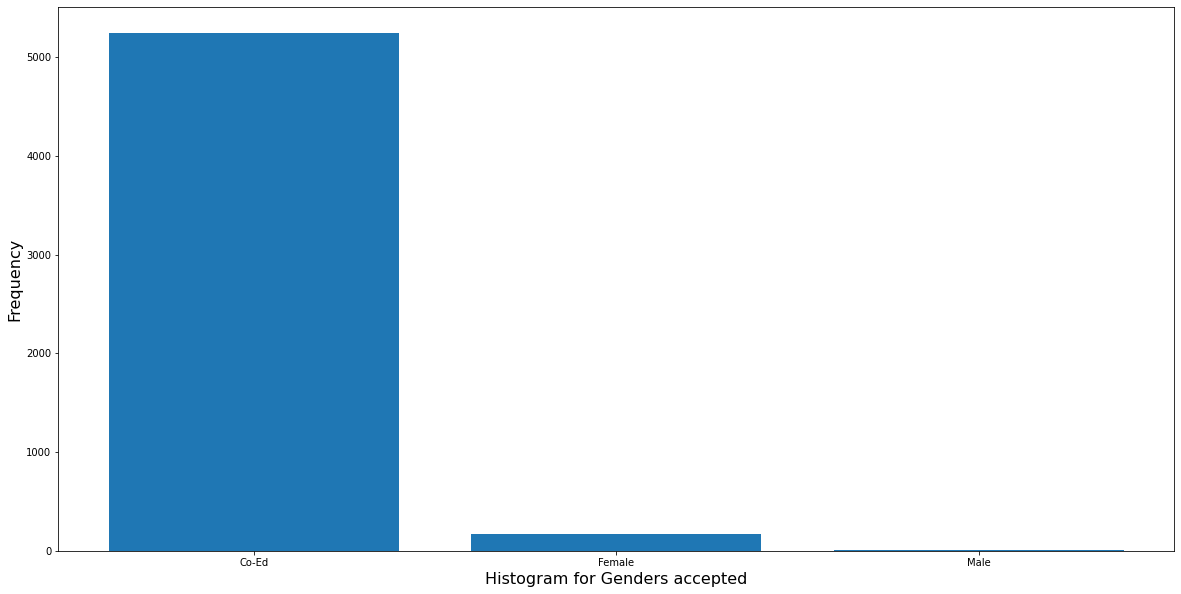

Mode of the data for above graph => ['Co-Ed']
Frequency of modal data => 5243
Entropy of the data => 0.1510362606667549


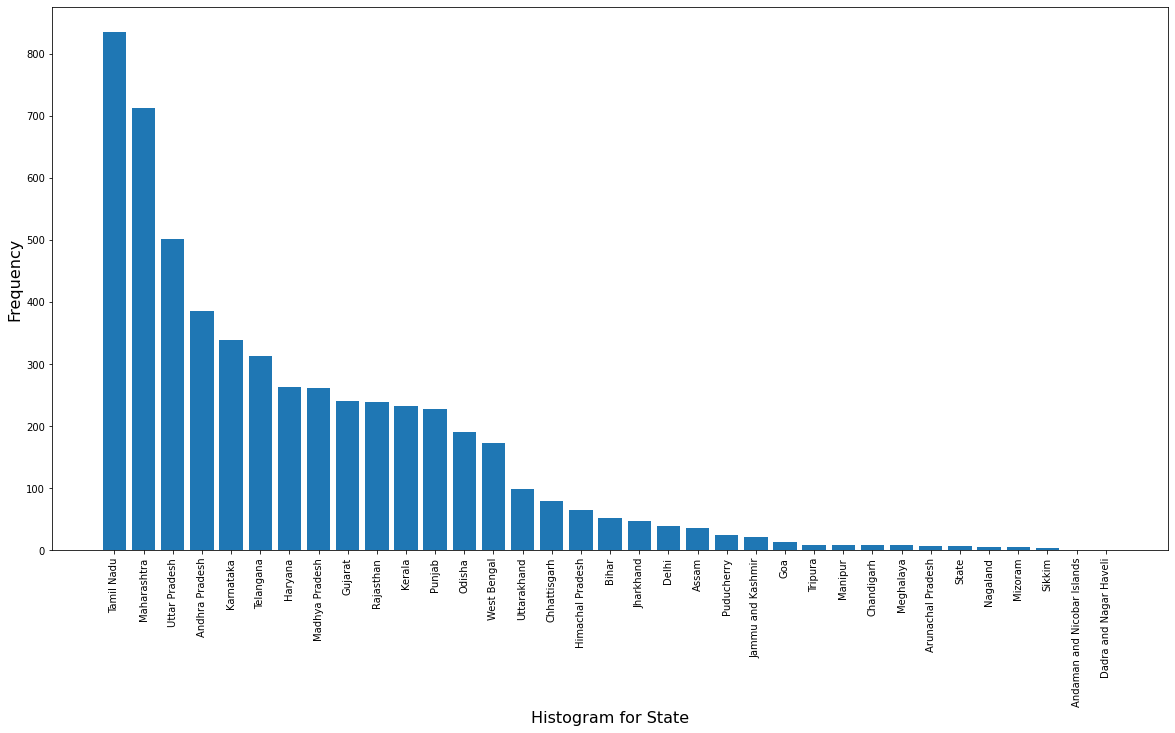

Mode of the data for above graph => ['Tamil Nadu']
Frequency of modal data => 834
Entropy of the data => 2.833600789646975


In [93]:
#changing plot-size of the plots 
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
for i in info.columns:
    if i in discrete:
        if(i == "State"):
            #rotating the xticks to give aesthetic appeal to graph
            plt.xticks(rotation=90)
        #converting this to dictionary to extract keys and values
        k = dict(info[i].dropna().value_counts())
        bars = plt.bar(k.keys(),k.values())
        #finding modal values
        mode = max(k.values())
        #finding modal keys
        modelabels = [i for i in k.keys() if k[i]==mode]
        plt.xlabel("Histogram for "+i.capitalize())
        plt.ylabel("Frequency")
        plt.show()
        print("Mode of the data for above graph =>",modelabels)
        print("Frequency of modal data =>",mode)
        print("Entropy of the data =>",scipy.stats.entropy(info[i].value_counts()))

<h1>Continuous Variables</h1>

<h2>Statistics and Box and Whiskers Plots</h2>

For the variable: Campus Size
Average:  67.45965042766828
Variance:  114003.11114617753
Min: 0.0
Max: 16000.0
25th percentile: 11.0
75th percentile: 50.0
Interquartile range: 39.0
Skew: 39.53530003803425


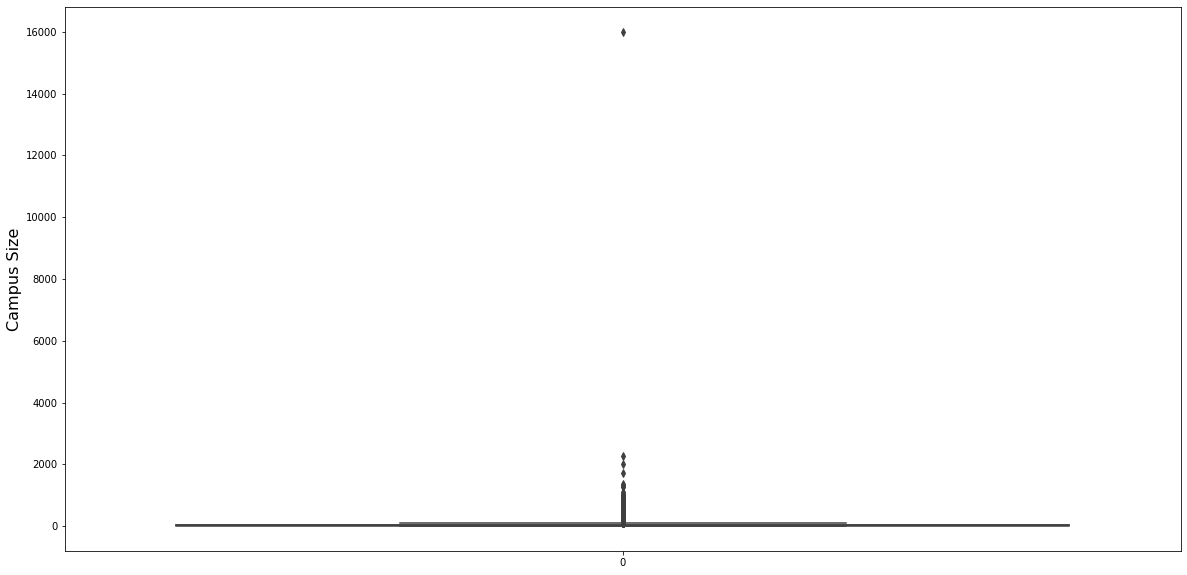

For the variable: Total Student Enrollments
Average:  1915.4460220869958
Variance:  339167722.4954524
Min: 1.0
Max: 1035081.0
25th percentile: 409.0
75th percentile: 1551.0
Interquartile range: 1142.0
Skew: 46.96515260976599


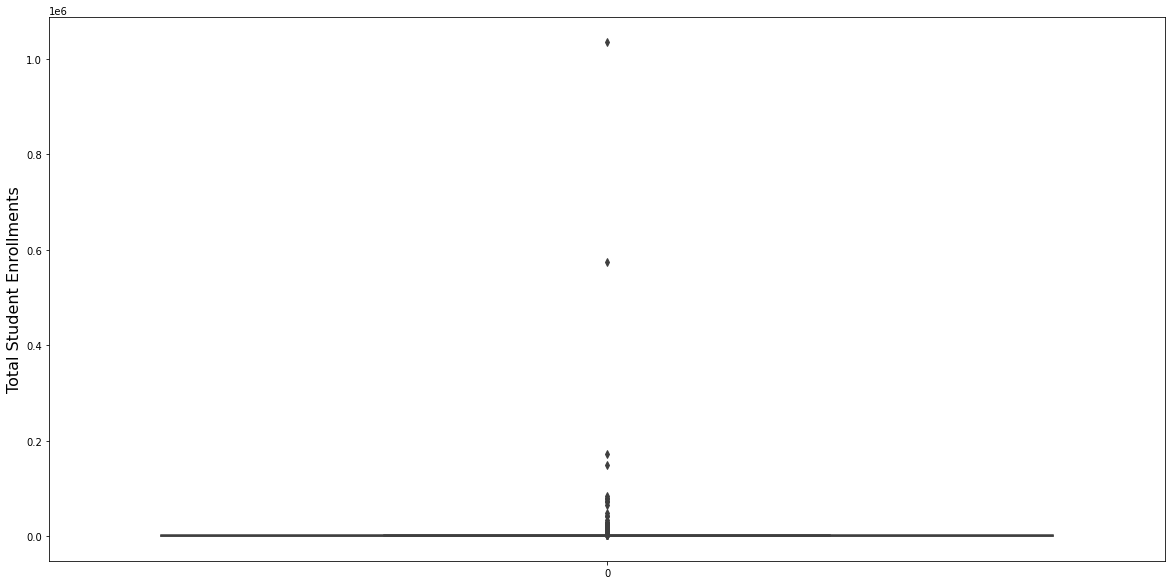

For the variable: Total Faculty
Average:  96.73934457283576
Variance:  12963.911979187766
Min: 1.0
Max: 2453.0
25th percentile: 37.0
75th percentile: 124.0
Interquartile range: 87.0
Skew: 7.260326441887345


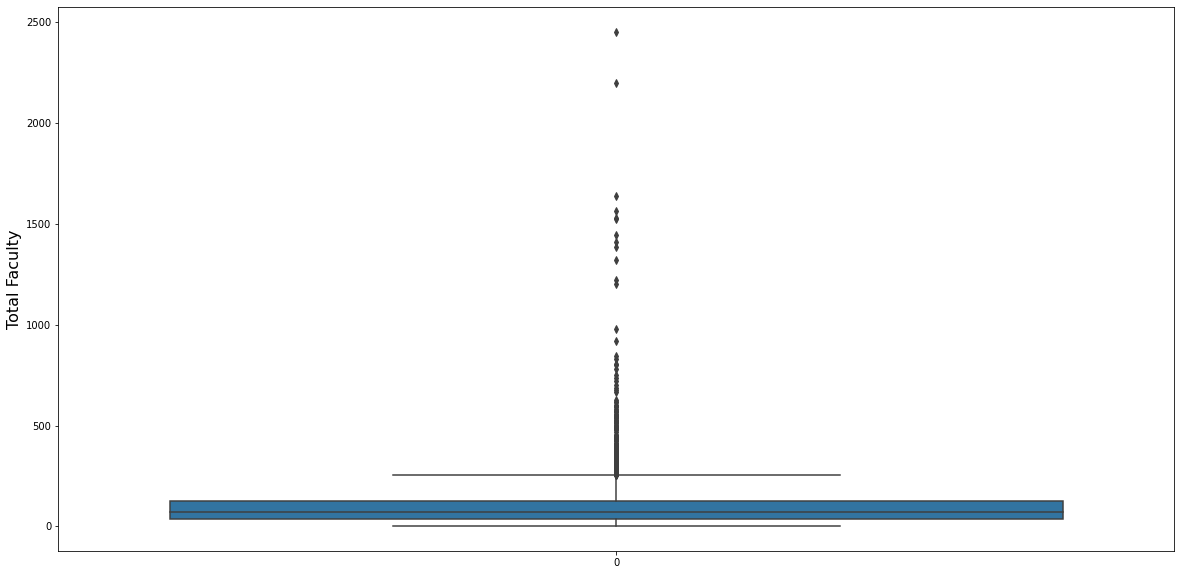

For the variable: Established Year
Average:  2000.4255478554037
Variance:  262.48944657661036
Min: 1857.0
Max: 2019.0
25th percentile: 1998.0
75th percentile: 2009.0
Interquartile range: 11.0
Skew: -2.7493859683818225


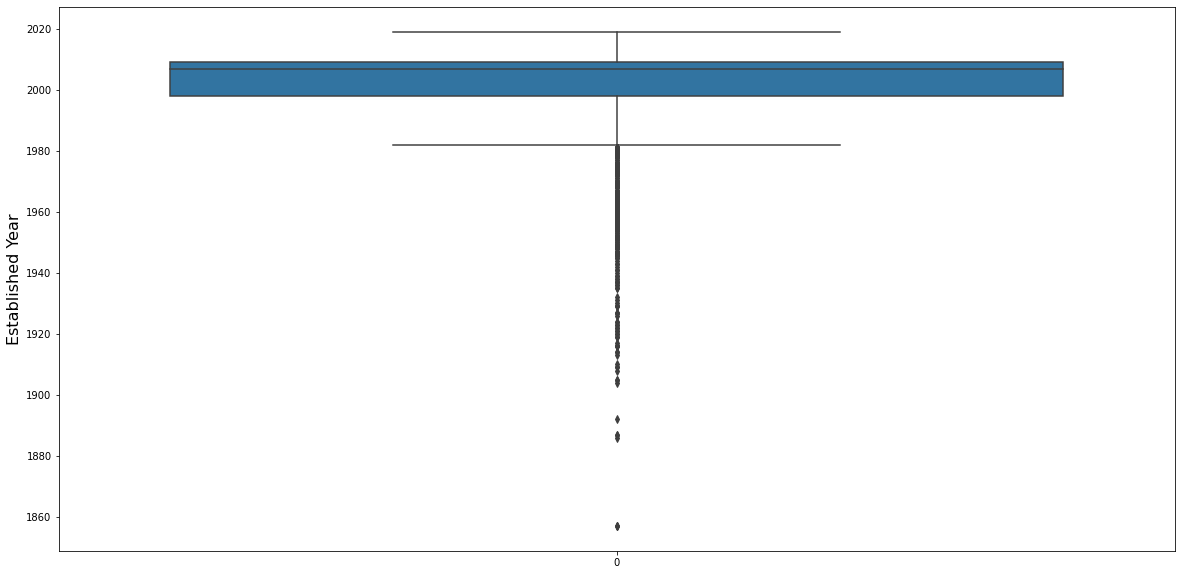

For the variable: Rating
Average:  3.081896024464832
Variance:  0.09284166503006668
Min: 2.01
Max: 3.83
25th percentile: 3.01
75th percentile: 3.2350000000000003
Interquartile range: 0.22500000000000053
Skew: -0.6185449679657397


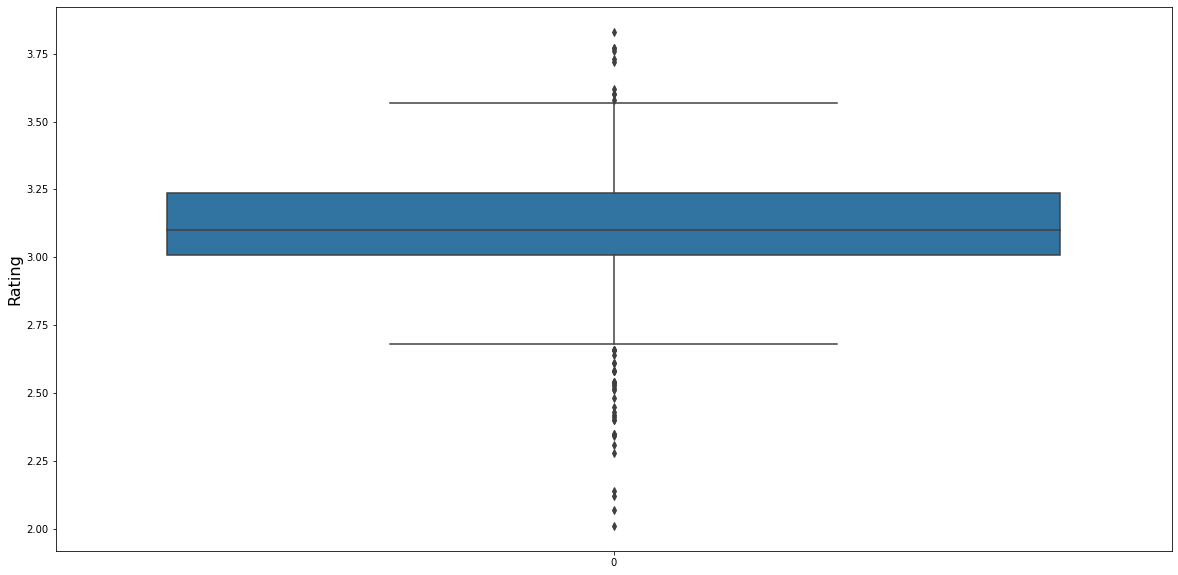

For the variable: Average Fees
Average:  188601.11958904492
Variance:  32669856442.6158
Min: 180.0
Max: 3578596.590909091
25th percentile: 90000.0
75th percentile: 240000.0
Interquartile range: 150000.0
Skew: 5.67739048347613


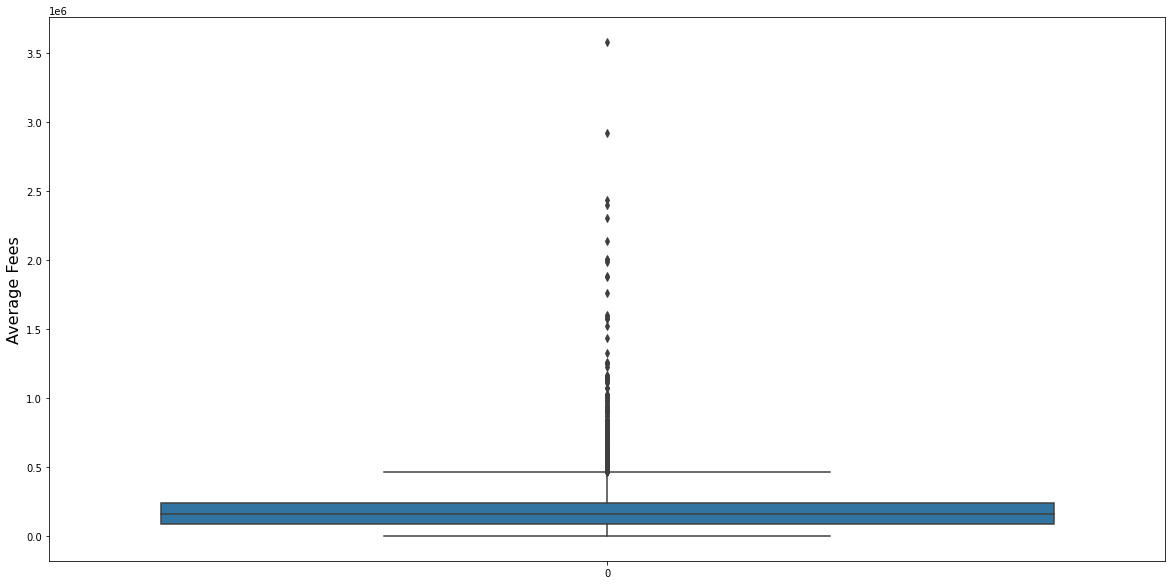

In [94]:
for i in info.columns:
    if i in continuous:
        #creating a numpy array for the continuous columns
        k = np.array(info[i].dropna())
        #displaying various fields
        print("For the variable:",i)
        print("Average: ",np.average(k))
        print("Variance: ",np.var(k))
        print("Min:",min(k))
        print("Max:",max(k))
        print("25th percentile:",np.percentile(k,25))
        print("75th percentile:",np.percentile(k,75))
        print("Interquartile range:",(np.percentile(k,75)-np.percentile(k,25)))
        print('Skew:',scipy.stats.skew(k))
        sns.boxplot(data=k)
        plt.ylabel(i)
        plt.show()

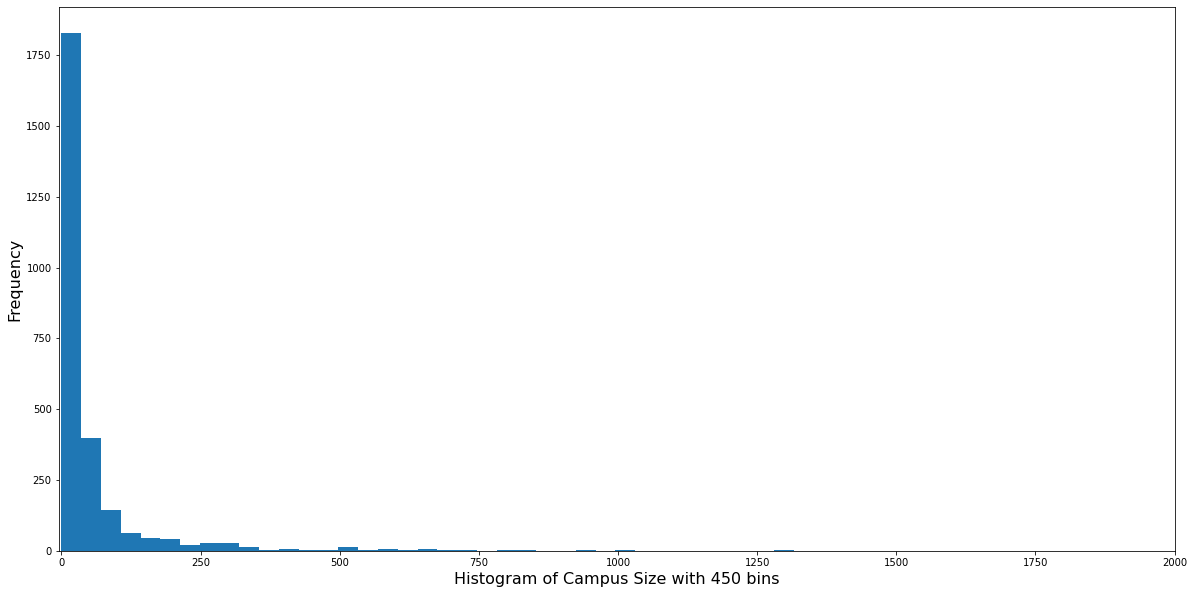

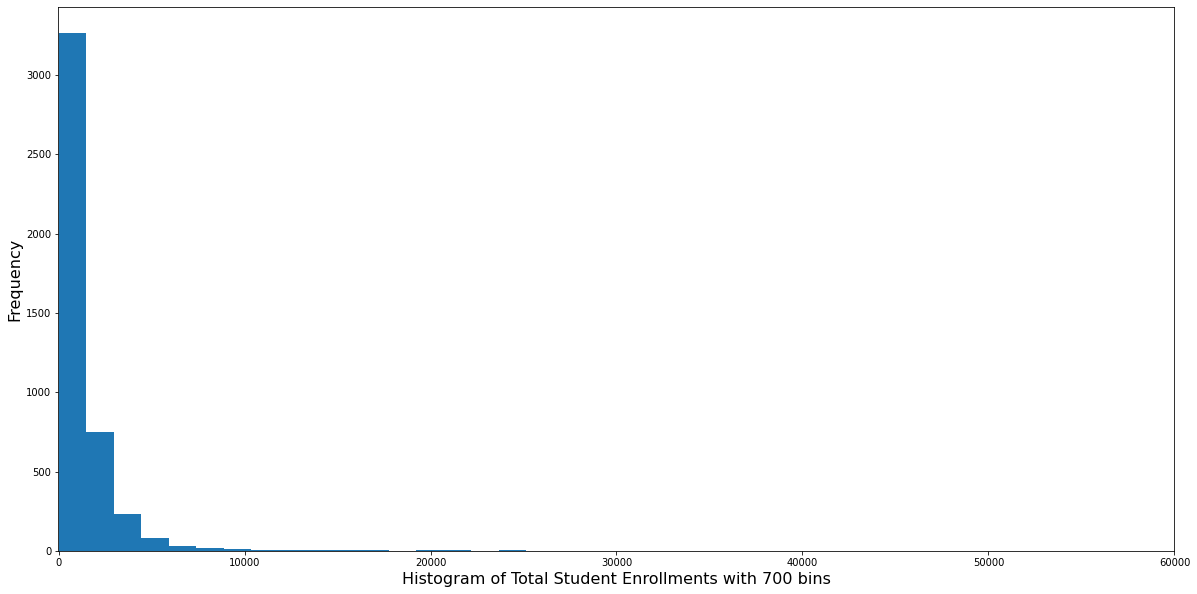

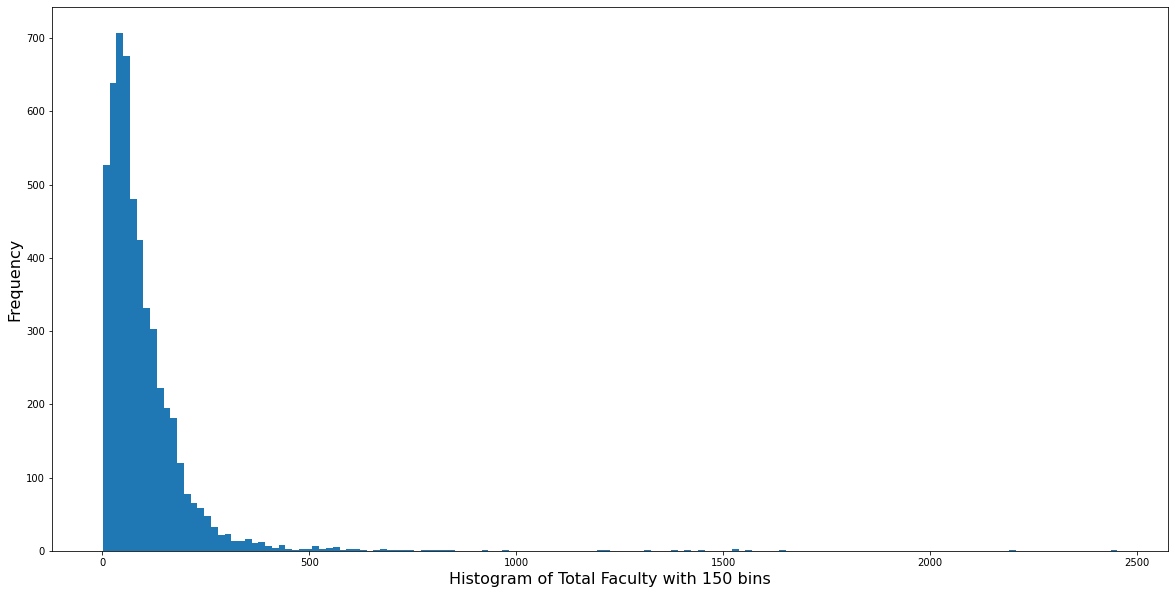

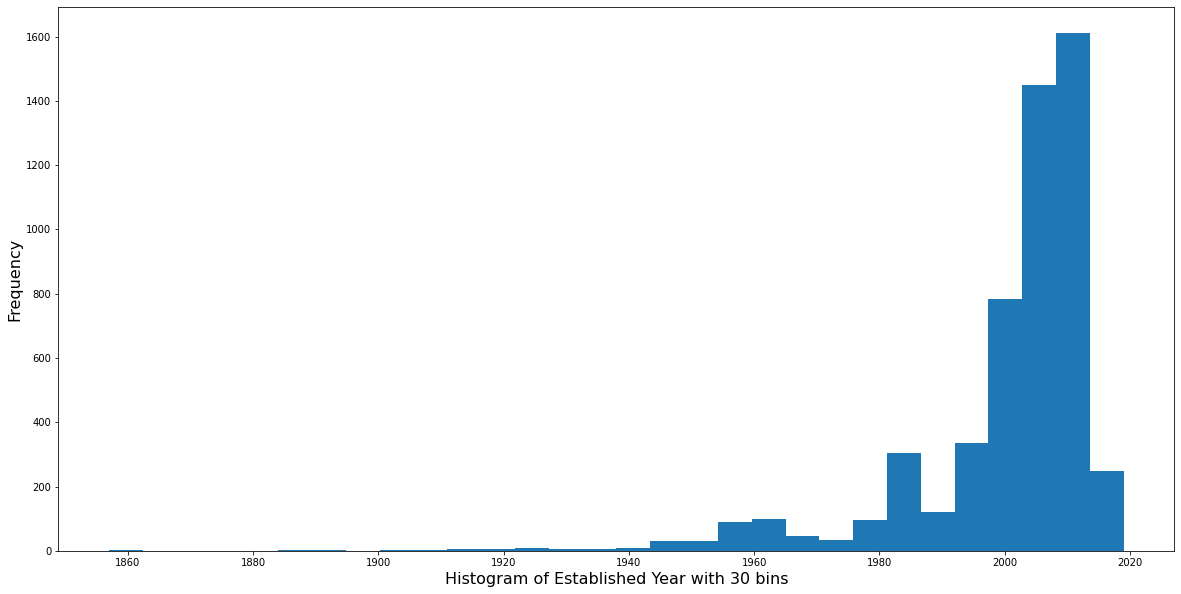

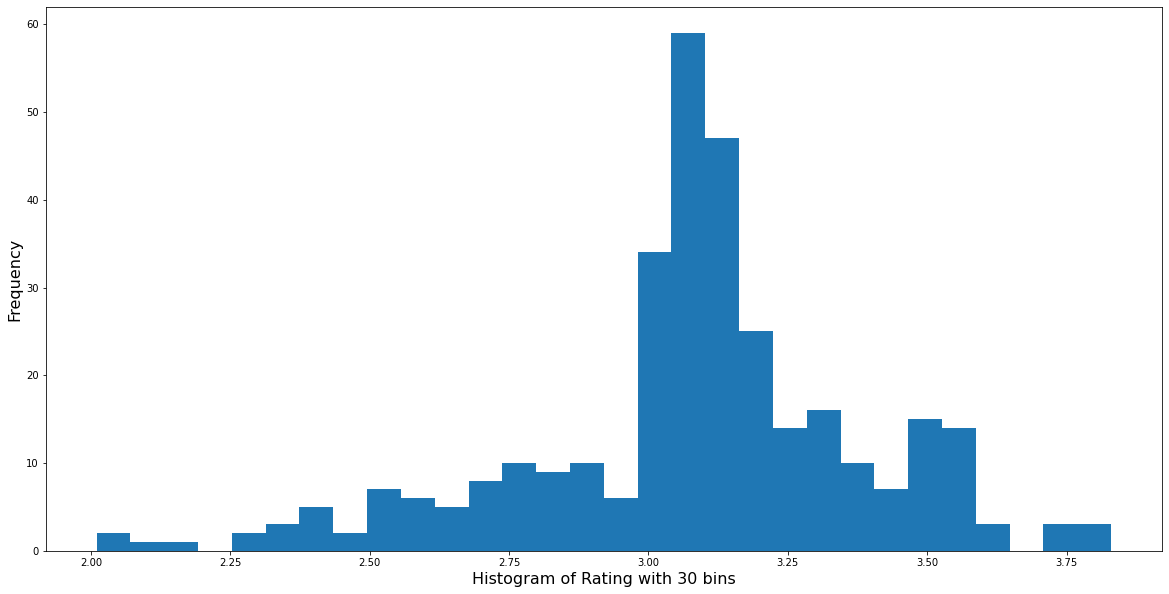

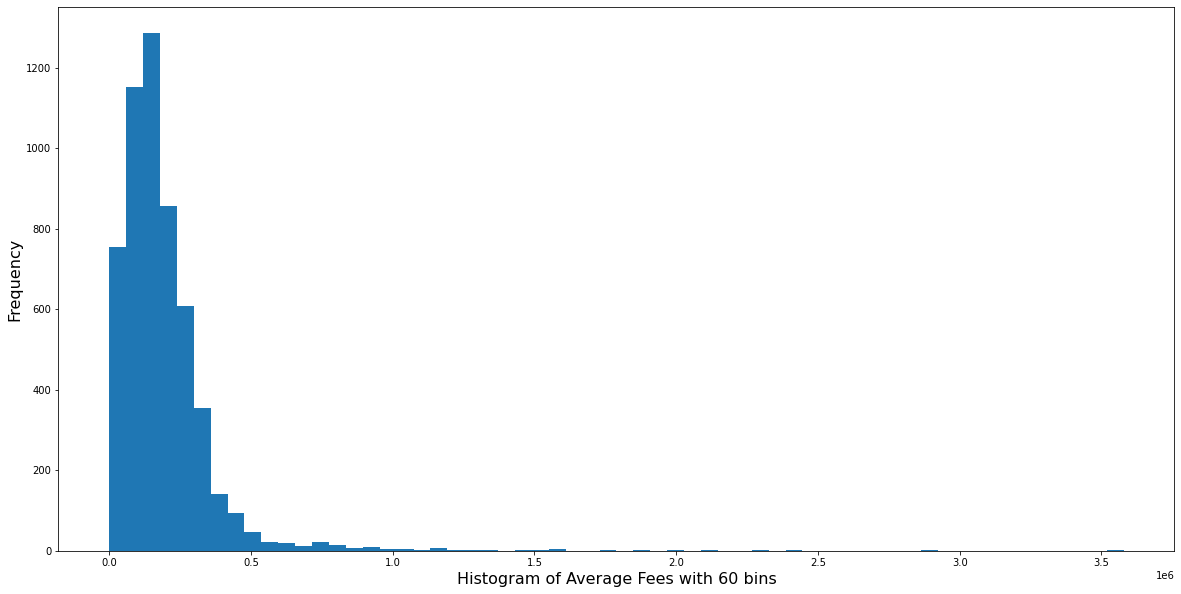

In [95]:
bins = [30,60,150,300]
#list containing bins for the histogram
for i in info.columns:
    if i in continuous:
        k = np.array(info[i].dropna())
        #removing nans
        if(i == "Campus Size"):
            plt.xlim(-5,2000)
            #To make the histogram in range
            plt.hist(k,450)
            #increase the number of bins to make the histogram better
            plt.ylabel("Frequency")
            plt.xlabel("Histogram of "+i+" with "+str(450)+" bins")
            plt.show()
            continue
        if(i == "Total Student Enrollments"):
            plt.xlim(-5,60000)
            #To make the histogram in range
            plt.hist(k,bins=700)
            #increase the number of bins to make the histogram better
            plt.ylabel("Frequency")
            plt.xlabel("Histogram of "+i+" with "+str(700)+" bins")
            plt.show()
            continue
        #setting correct number of bins
        if(i=='Total Faculty'):
            j=150
        if(i=='Established Year'):
            j=30
        if(i=='Ratings'):
            j=25
        if(i=='Average Fees'):
            j=60
        plt.hist(k,bins=j)
        plt.ylabel("Frequency")
        plt.xlabel("Histogram of "+i+" with "+str(j)+" bins")
        plt.show()

<h2>QQ Plots for Continuous Variables</h2>

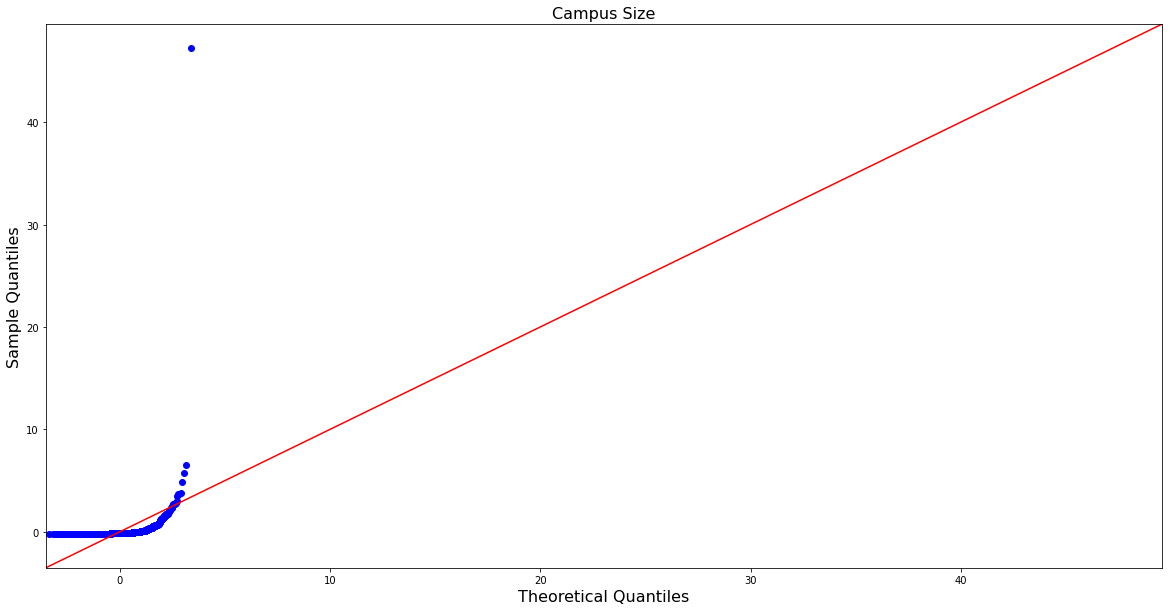

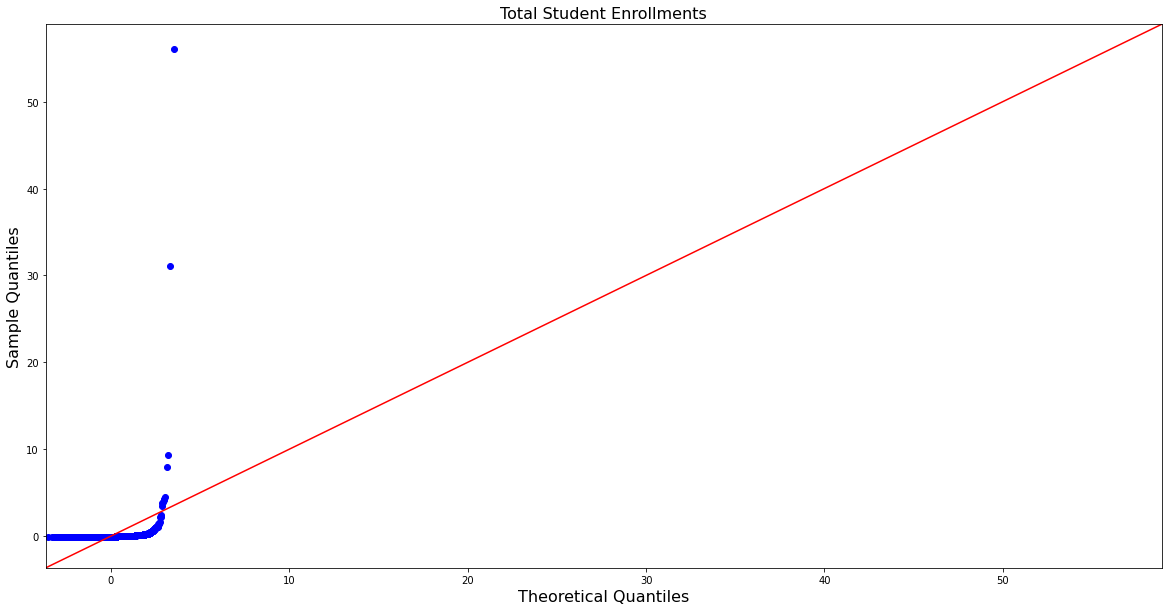

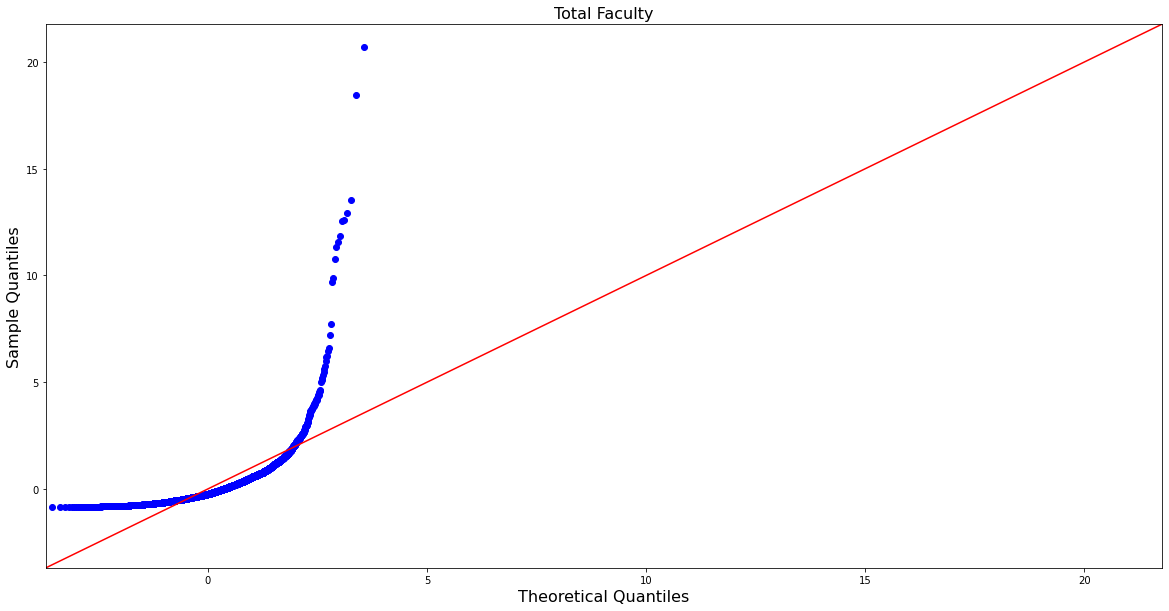

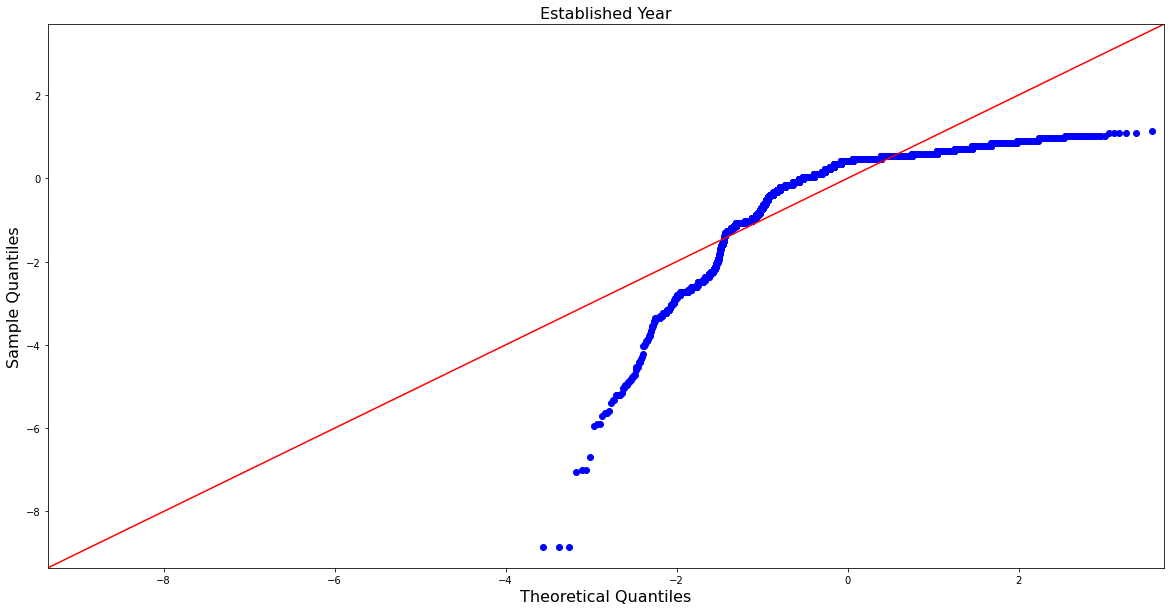

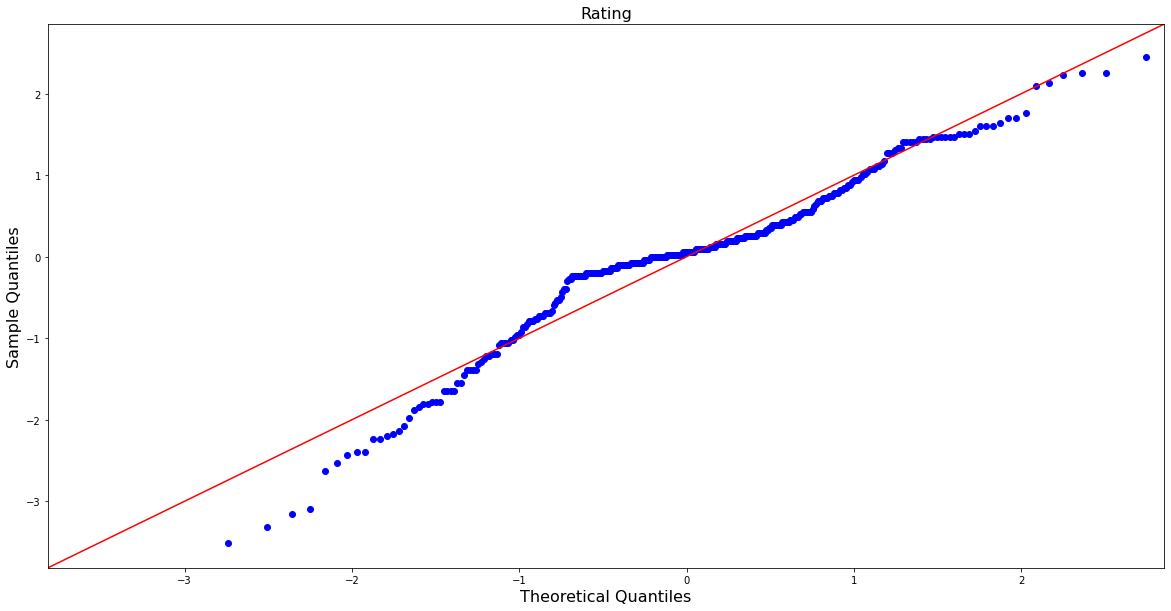

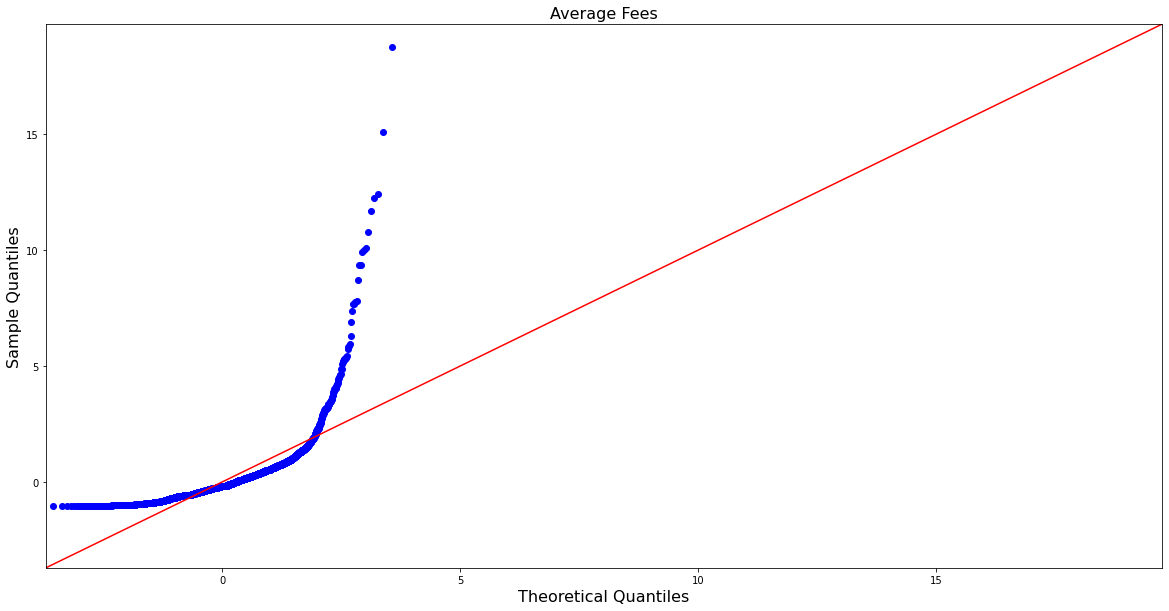

In [96]:
for i in info.columns:
    if i in continuous:
        #creating numpy array for each column
        k = np.array(info[i].dropna())
        #removing null values in HDI
        sm.qqplot(data=k,line='45',fit=True)
        plt.title(i)
        plt.show()

<h2>
Comparison for Distribution is Log Normal</h2>

In [97]:
for i in info.columns:
    if i in continuous:
        #numpy array creation for each
        k = np.array(info[i].dropna())
        #using log normal from scipy.stats 
        shape,location,scale = scipy.stats.lognorm.fit(k)
        mu, sigma = np.log(scale), shape
        #values of the mean and standard deviation of lognormal
        likelihood_lognormal = (scipy.stats.kstest(k, "lognorm", scipy.stats.lognorm.fit(k)))[1]
        #using Kolmogorov-Smirnov test for goodness of fit to get the likelihood of fit
        print('the required fitting factor (likelihood) of',i , 'being lognormal distributed is :',likelihood_lognormal)

the required fitting factor (likelihood) of Campus Size being lognormal distributed is : 2.6449471180419907e-15
the required fitting factor (likelihood) of Total Student Enrollments being lognormal distributed is : 0.0034000164046913066
the required fitting factor (likelihood) of Total Faculty being lognormal distributed is : 0.0
the required fitting factor (likelihood) of Established Year being lognormal distributed is : 1.3246995925905733e-209
the required fitting factor (likelihood) of Rating being lognormal distributed is : 8.272701894197894e-08
the required fitting factor (likelihood) of Average Fees being lognormal distributed is : 0.0


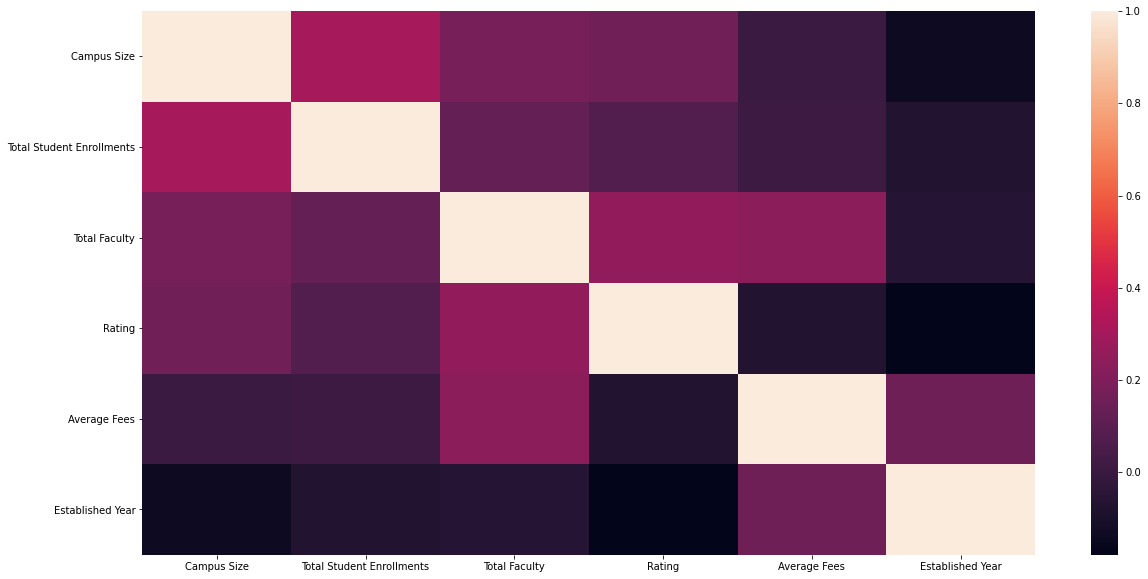

In [98]:
#using heatmap function of seaborn 
sns.heatmap(info[continuous].corr())
plt.show()

<h1>Inferences</h1>

<h2>General Observations</h2>
<ul>
<li>Majority of the Colleges are Co-Ed</li>
<li>Tamil Nadu has the most number of Colleges in the Dataset</li>
<li>The histograms of the continuous data are nearly gaussian for the correct values of bins</li>
<li>Total Student Enrollments shows some amount of log normal behaviour but not the other continuous variables since the Fitting Factors/Likelihood of the distributions of most is very close to 0, hence they are not log normal distributed.</li>

<li>Campus Size, Total Faculty, Total Enrollments, Average Fees have a right skew distribution from the QQ plot.</li>
<li>Rating is having a centered distribution which is close to ideal normal distribution from the QQ plot.</li>
<li>Estabalished year has a left skew distribution from the QQ plot.</li>
</ul>
<h2>Correlation Plot Observations</h2>
<ul>
<li>From the correlation plot we see that most of the columns aren't positively correlated. We see that Estabalished Year is negatively correlated with Rating which means that older colleges have better rating than the newer ones</li>
<li>Also campus size is negatively correlated with Estabalished year, means older colleges have generally larger campuses.</li>
</ul>

<h1>Question 2</h1>

In [99]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,63067077179,2309,Generation Z


<h2>Part (a)</h2>

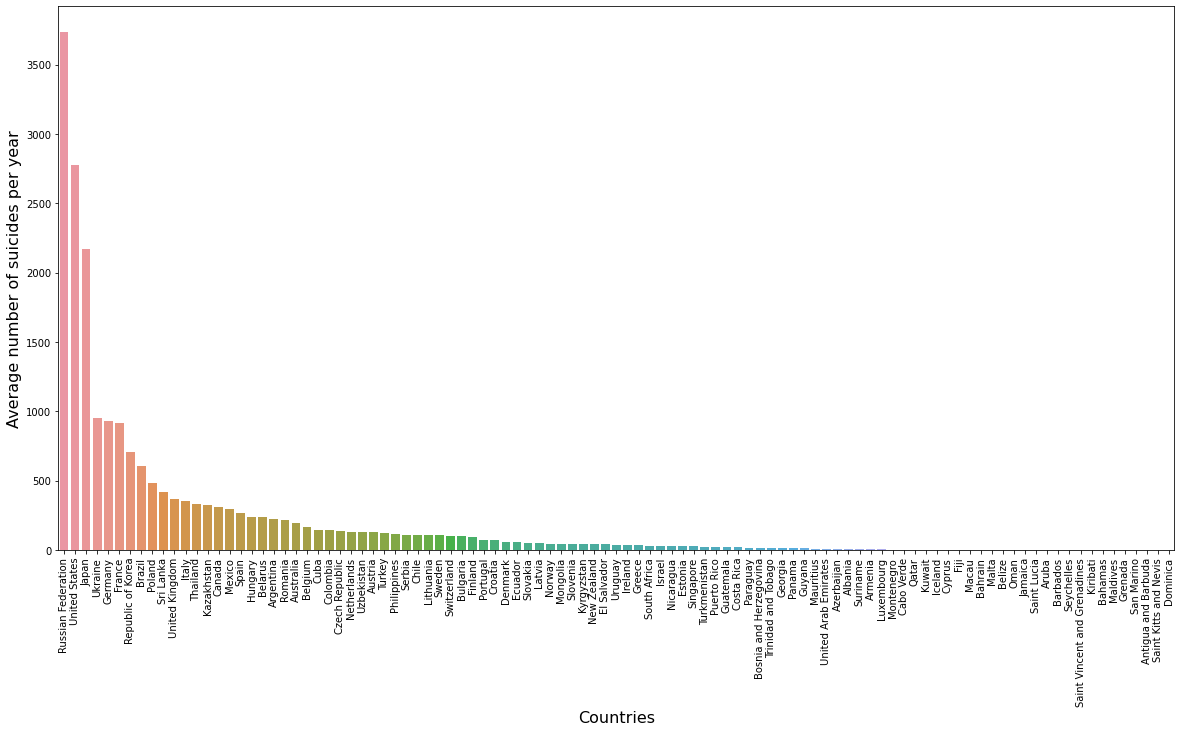

The countries with the most no of yearly suicides by average is ['Russian Federation', 'United States', 'Japan', 'Ukraine', 'Germany', 'France']


In [100]:
data1 = (data.groupby(['country']).mean())['suicides_no'].copy().sort_values(ascending=False)
#we group the data by country by taking mean of all the numeric data and sort it in descending fashion
sns.barplot(x=list(data1.keys()),y=list(data1.values))
plt.xlabel("Countries")
plt.ylabel("Average number of suicides per year")
plt.xticks(rotation=90)
#we rotate the xticks of the graph for aesthetic appeal
plt.show()
topsix_countries = list(data1.keys())[0:6]
#we take the first 6 countries 
print("The countries with the most no of yearly suicides by average is",topsix_countries)

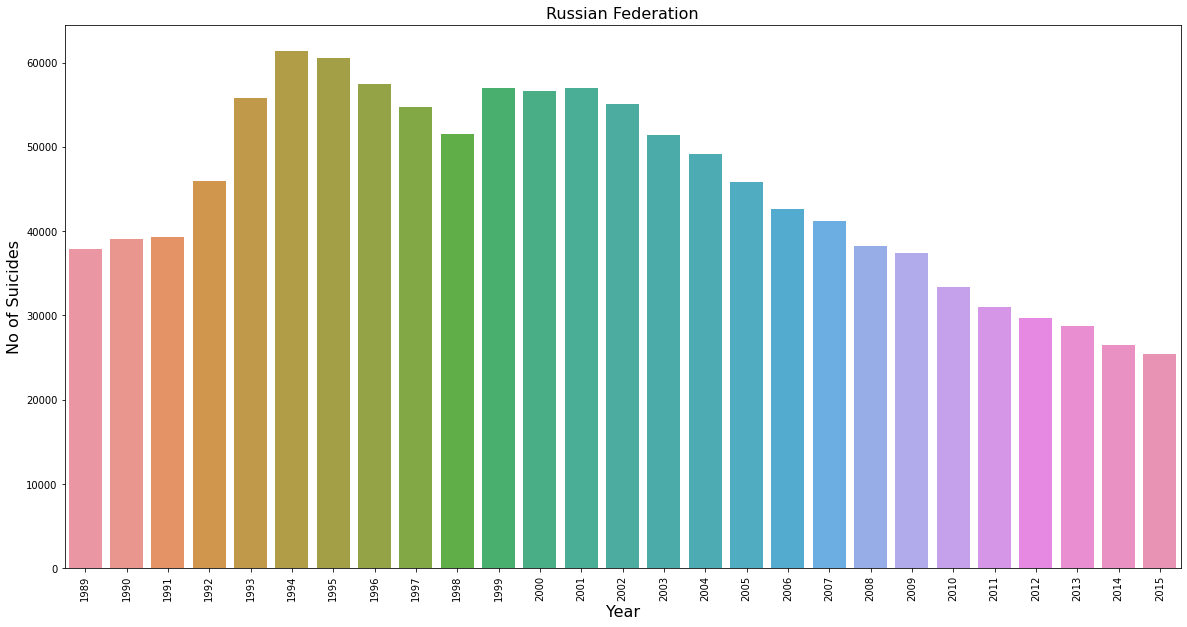

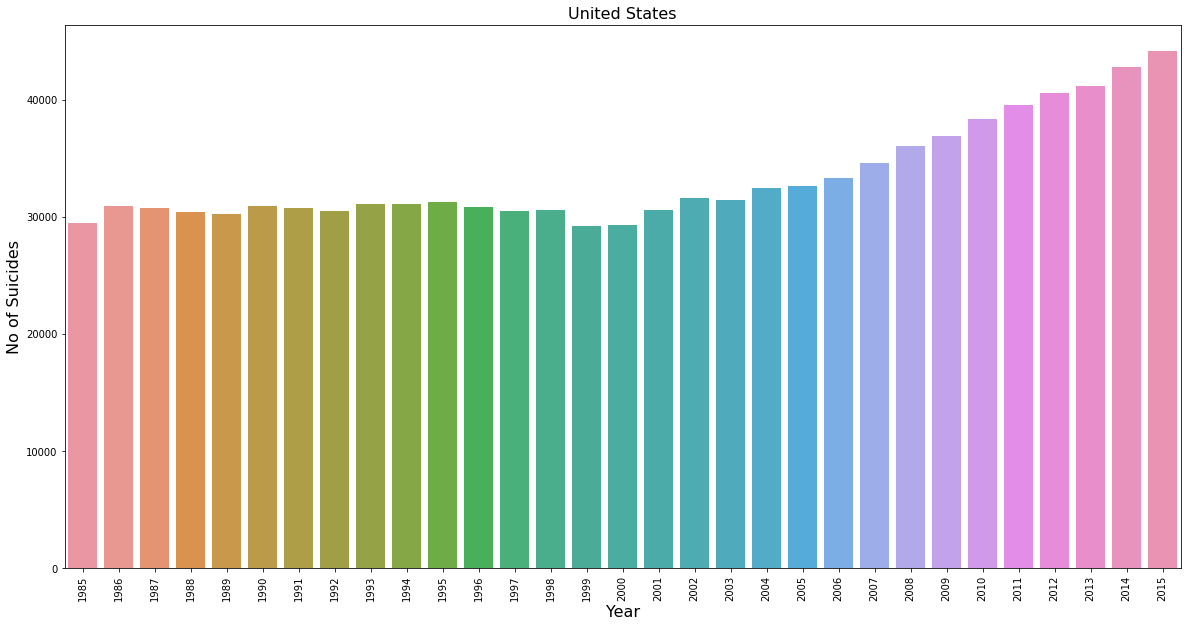

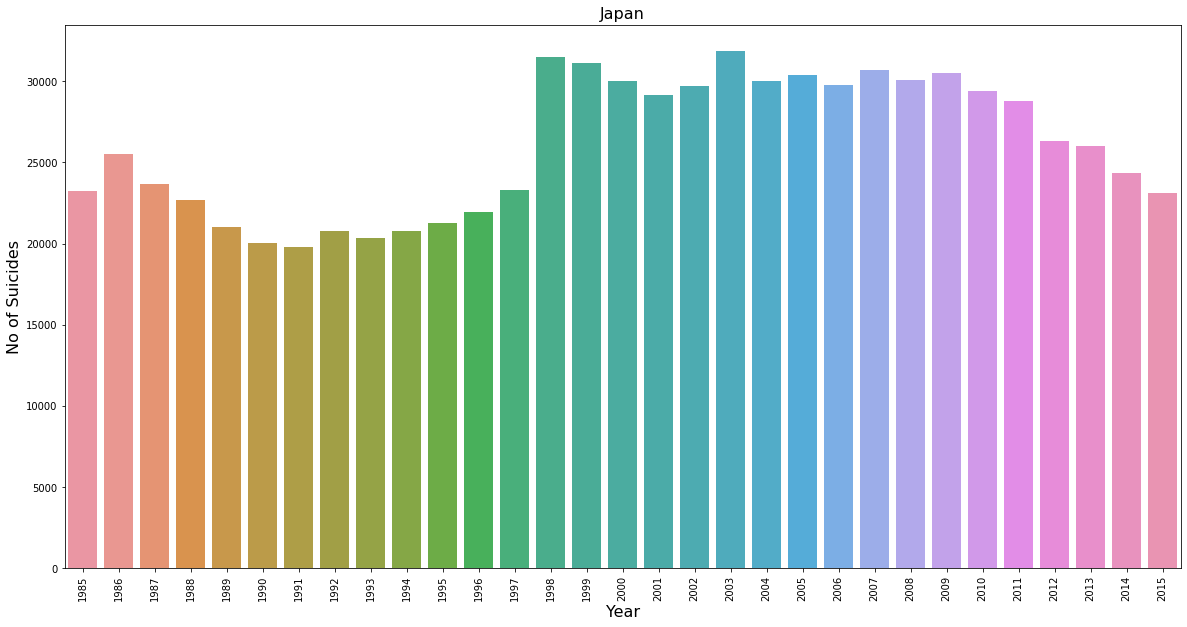

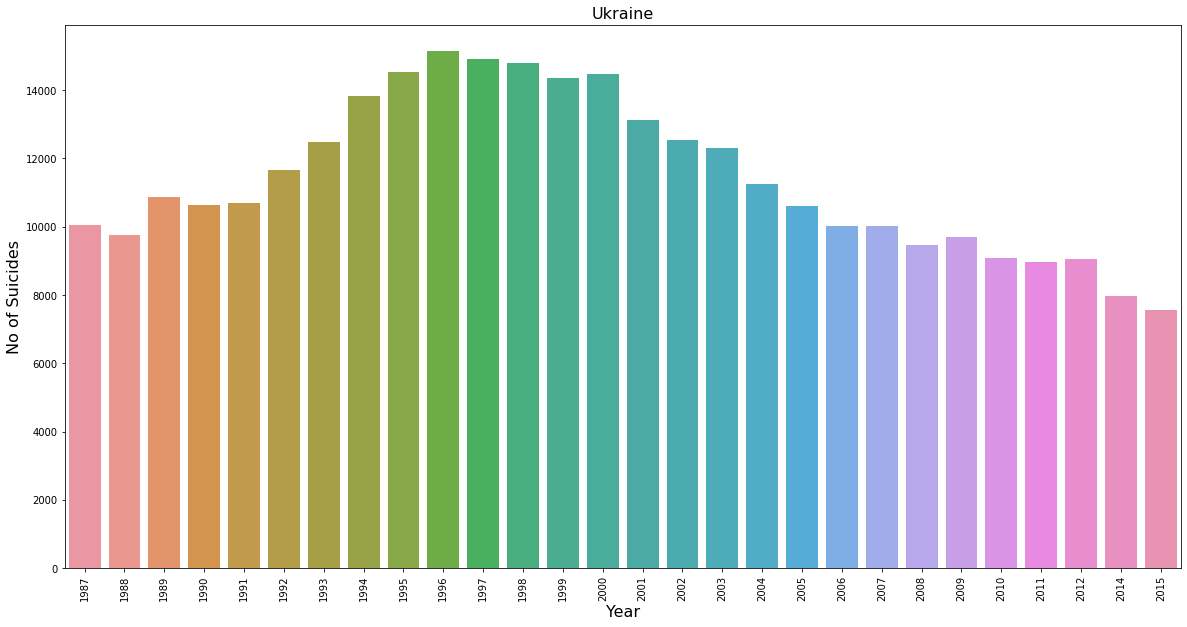

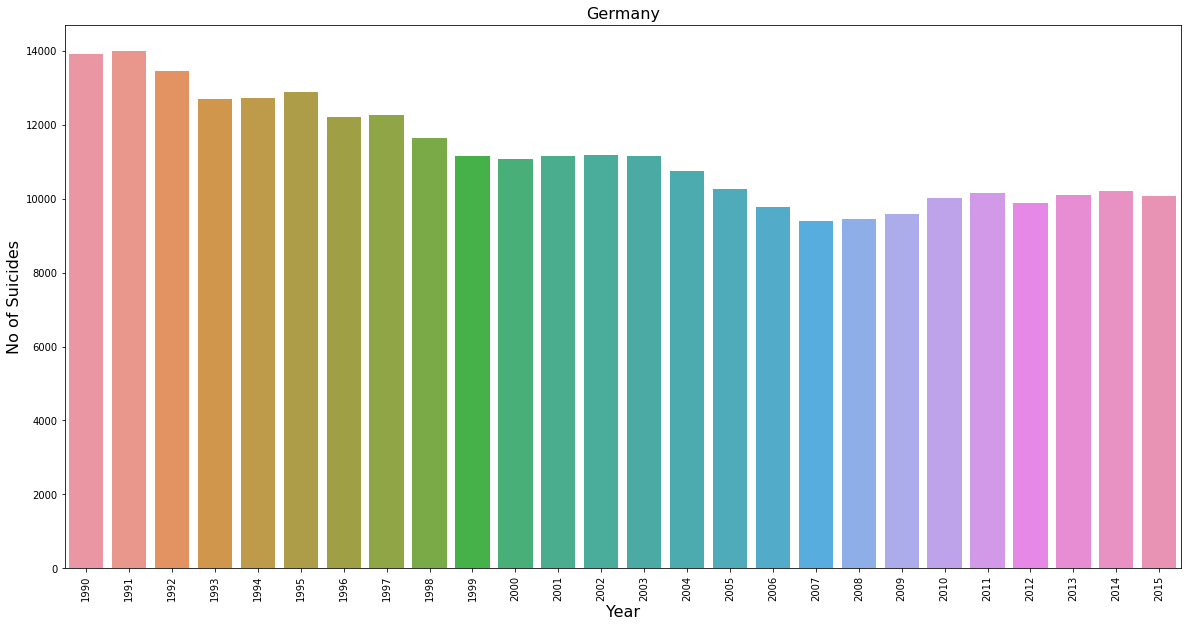

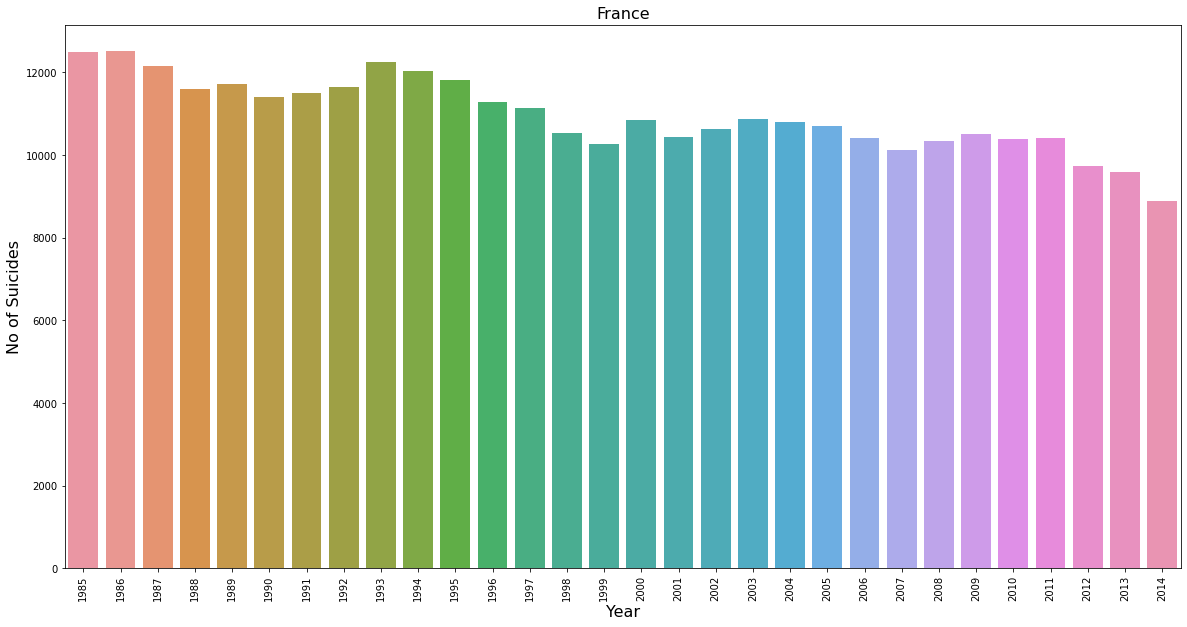

In [101]:
data1 = data.groupby(['country','year']).sum()
#we group the data by country and year and taking sum of all individual entries of a particular country 
for country in topsix_countries:
    #we take a cross section of the dataframe whose index is the country
    data1_i = data1.xs(country)
    sns.barplot(x=list(data1_i['suicides_no'].keys()),y=list(data1_i['suicides_no'].values))
    plt.xlabel('Year')
    plt.ylabel('No of Suicides')
    plt.xticks(rotation=90)
    plt.title(country)
    plt.show()

<h2>Part (b)</h2>

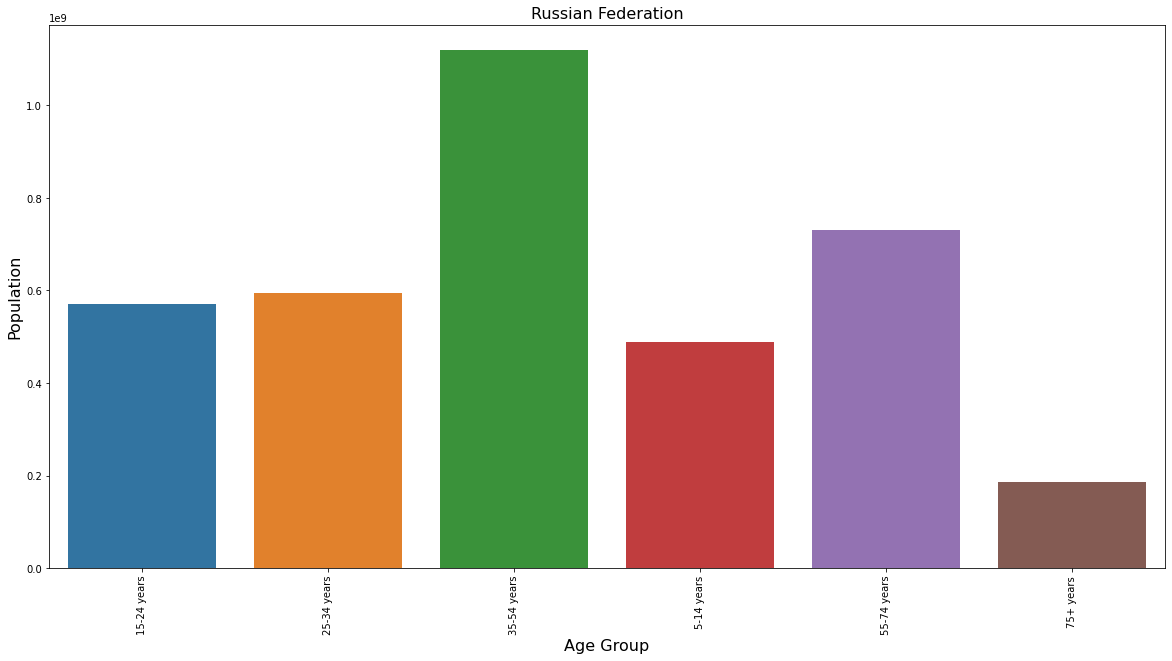

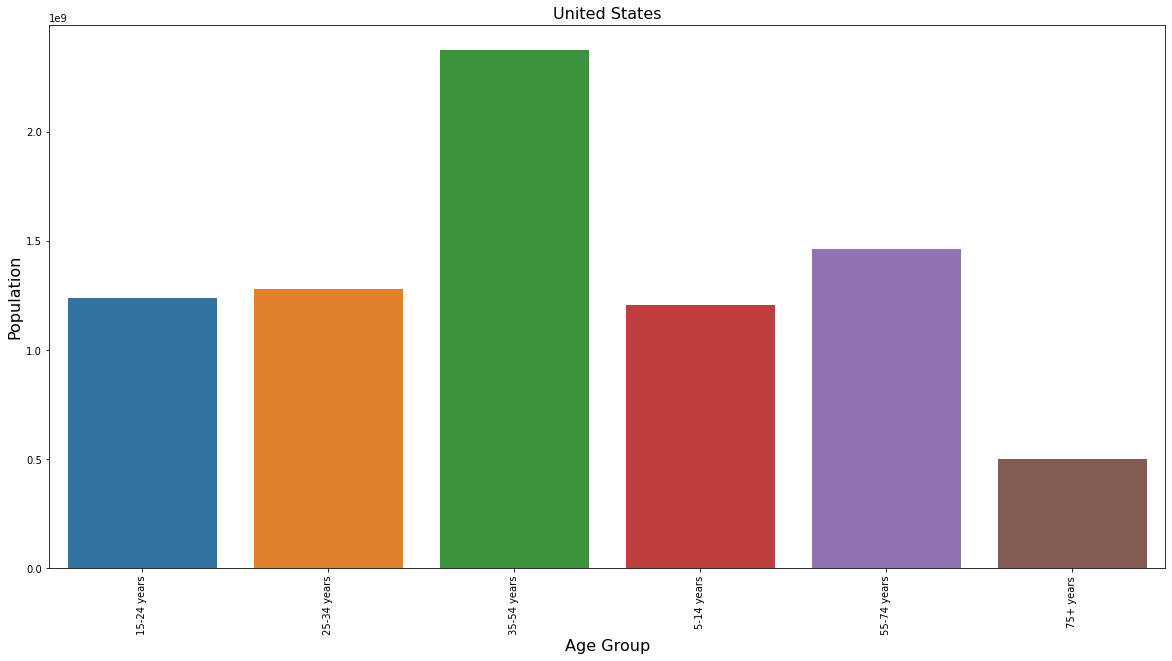

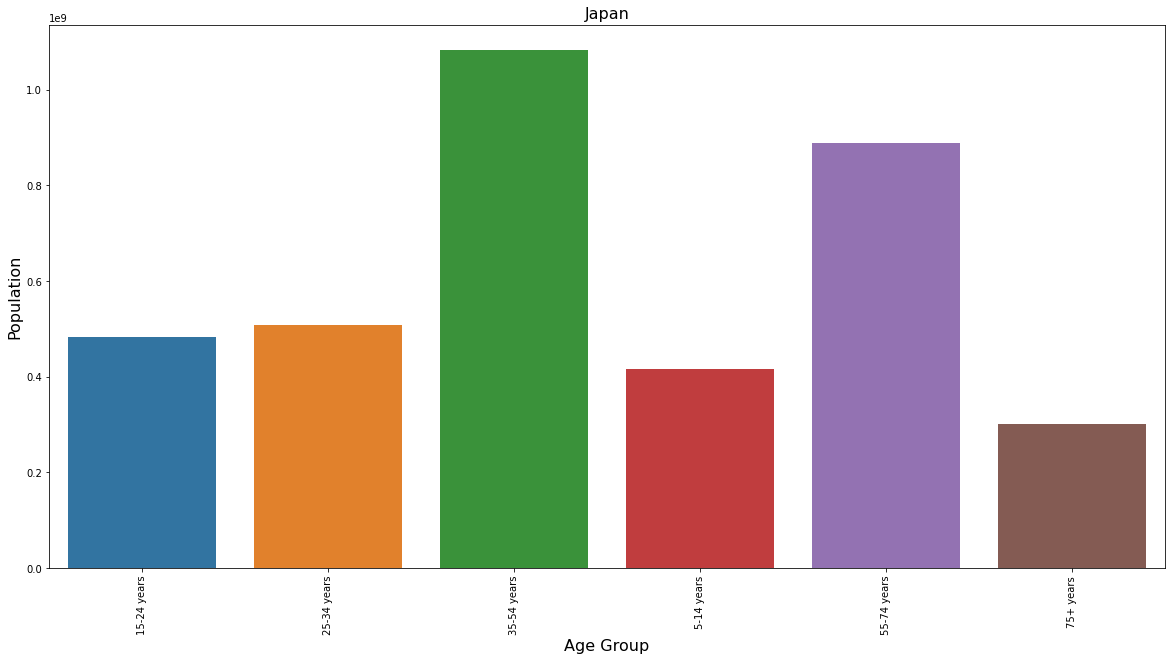

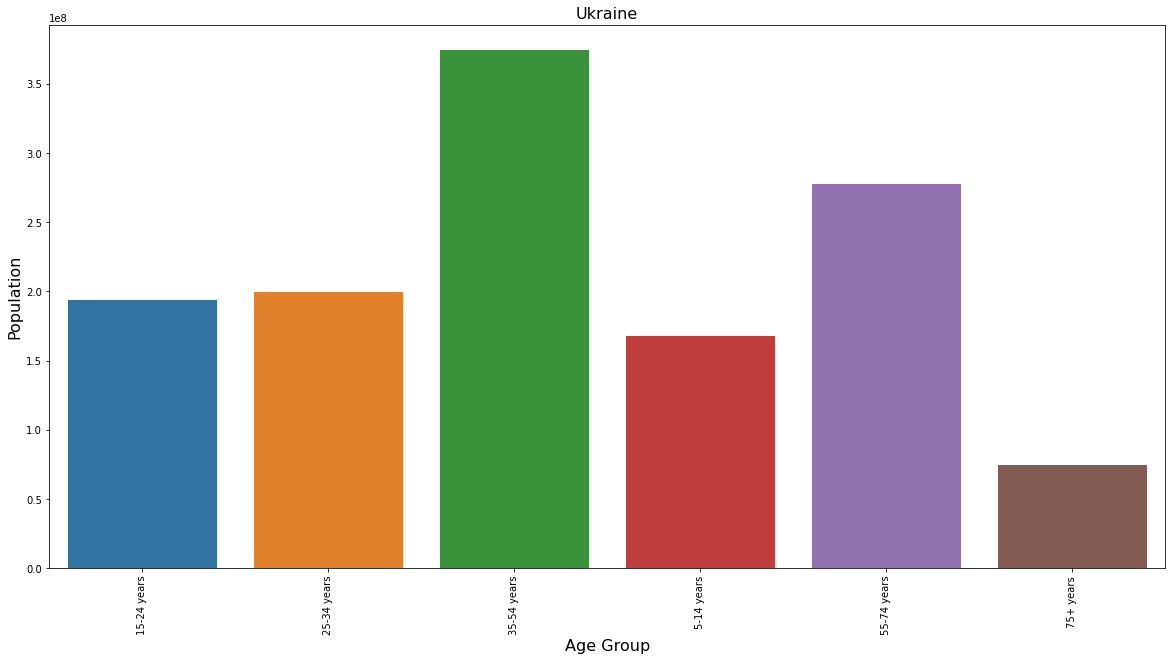

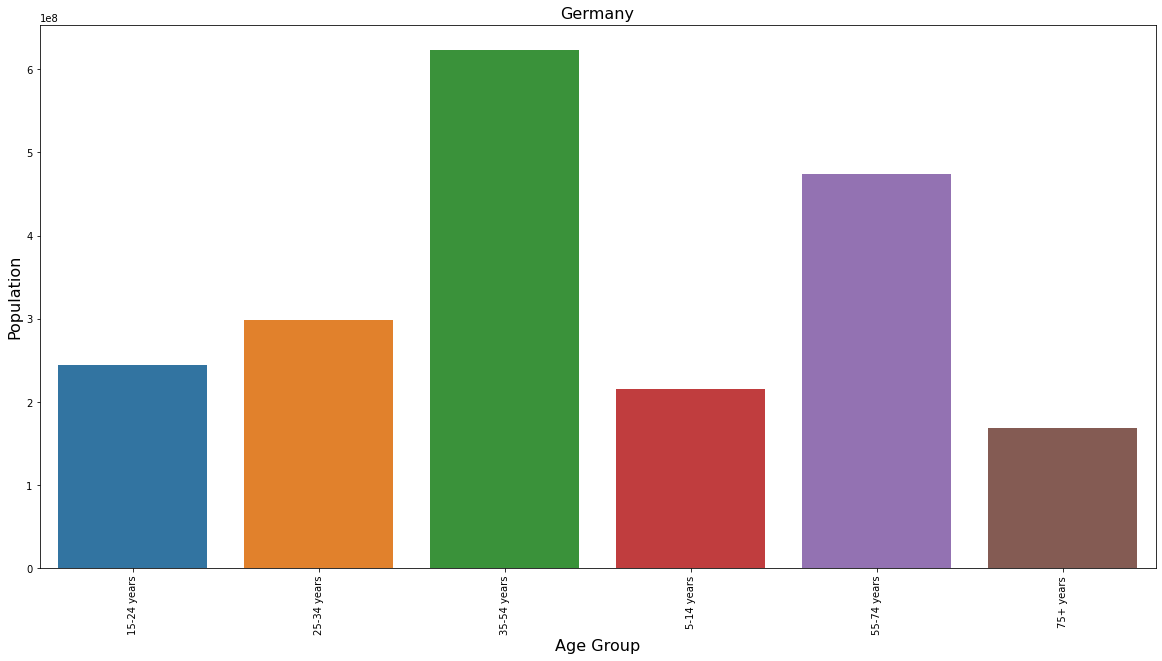

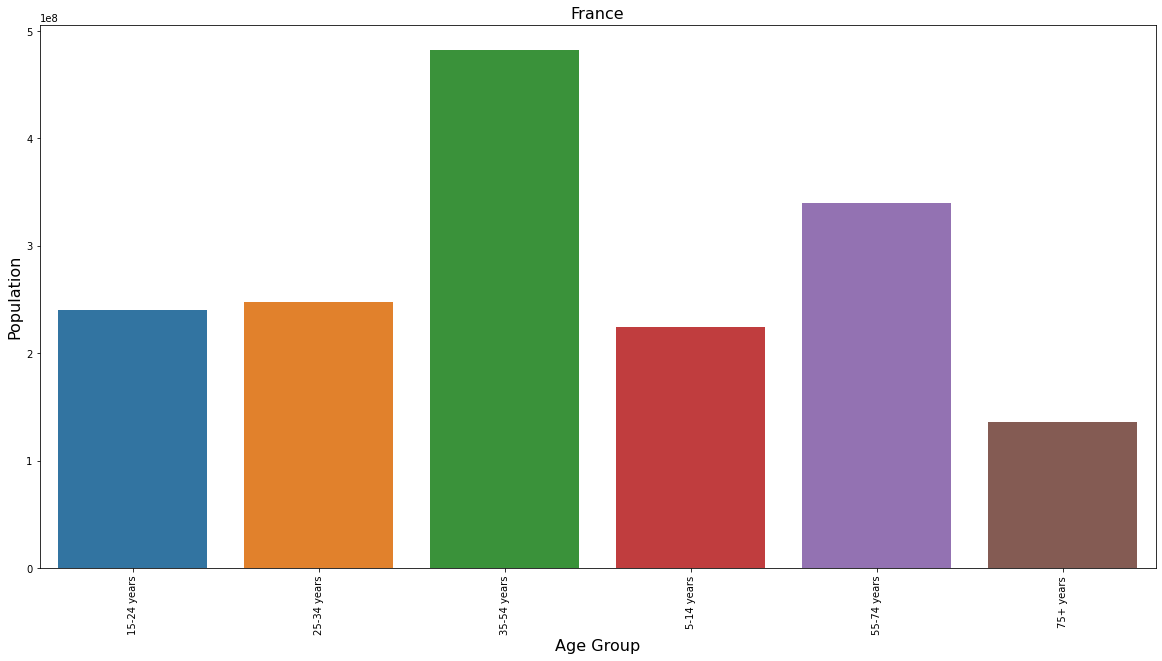

In [102]:
data1 = data.groupby(['country','age']).sum()
#we group the data by country and age group and taking sum of all individual entries of a particular country 
for i in topsix_countries:
    data1_i = data1.xs(i)
    #we take a cross section of the dataframe whose index is the country
    sns.barplot(x=list(data1_i['population'].keys()),y=list(data1_i['population'].values))
    plt.xlabel('Age Group')
    plt.ylabel('Population')
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

<h3>We observe that majority of all of the countries age group is in the range 25-54 years</h3>

<h2>Part (c)</h2>

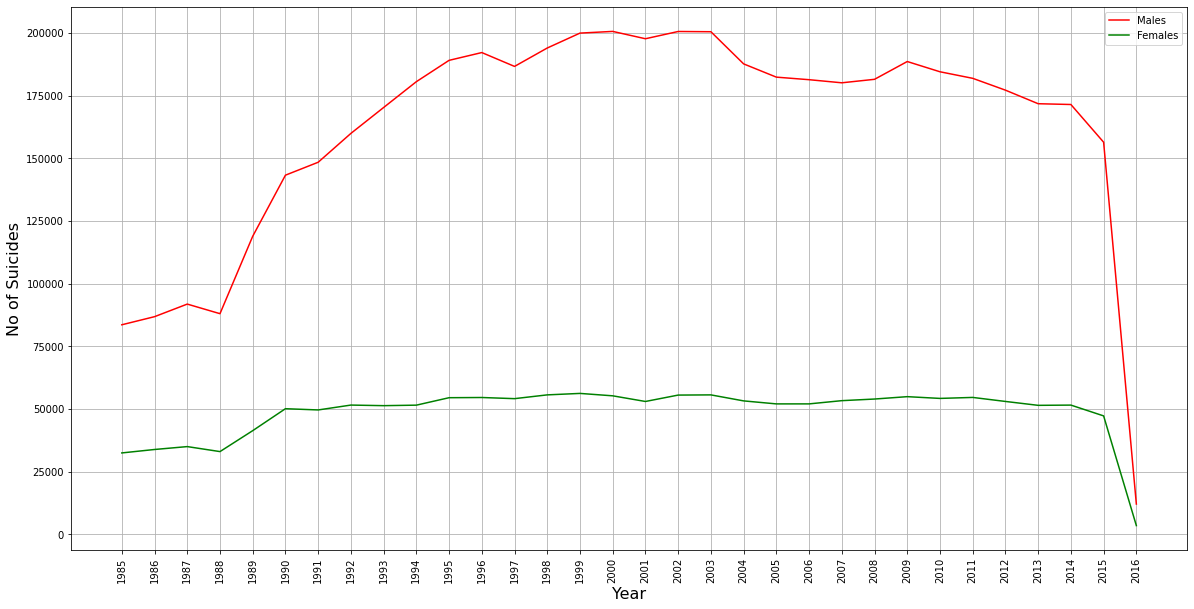

In [103]:
data1 = data.groupby(['sex','year']).sum()
#we group the data by sex and your and taking sum of all individual entries 
maledata = data1.xs('male')
#we take the cross section of this df with for males
femaledata = data1.xs('female')
#we take the cross section of this df with for females
#we plot line graph to compare the differences between the no of suicides per year for males and females
plt.plot(list(maledata['suicides_no'].keys()),list(maledata['suicides_no'].values),'r')
plt.xlabel('Year')
plt.ylabel('No of Suicides')
plt.xticks(range(1985,2017),rotation=90)
plt.plot(list(femaledata['suicides_no'].keys()),list(femaledata['suicides_no'].values),'g')
plt.legend(['Males','Females'])
plt.grid()
plt.show()

<h2>Part (d)</h2>

Worst year for Silent was 2010


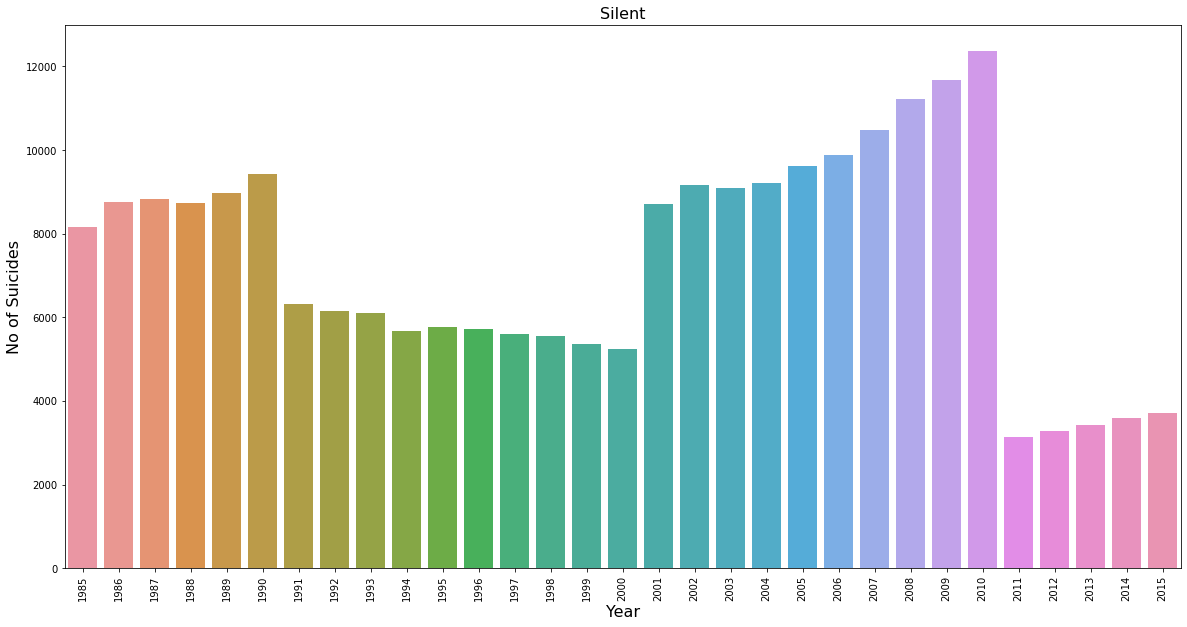

Worst year for Generation X was 2010


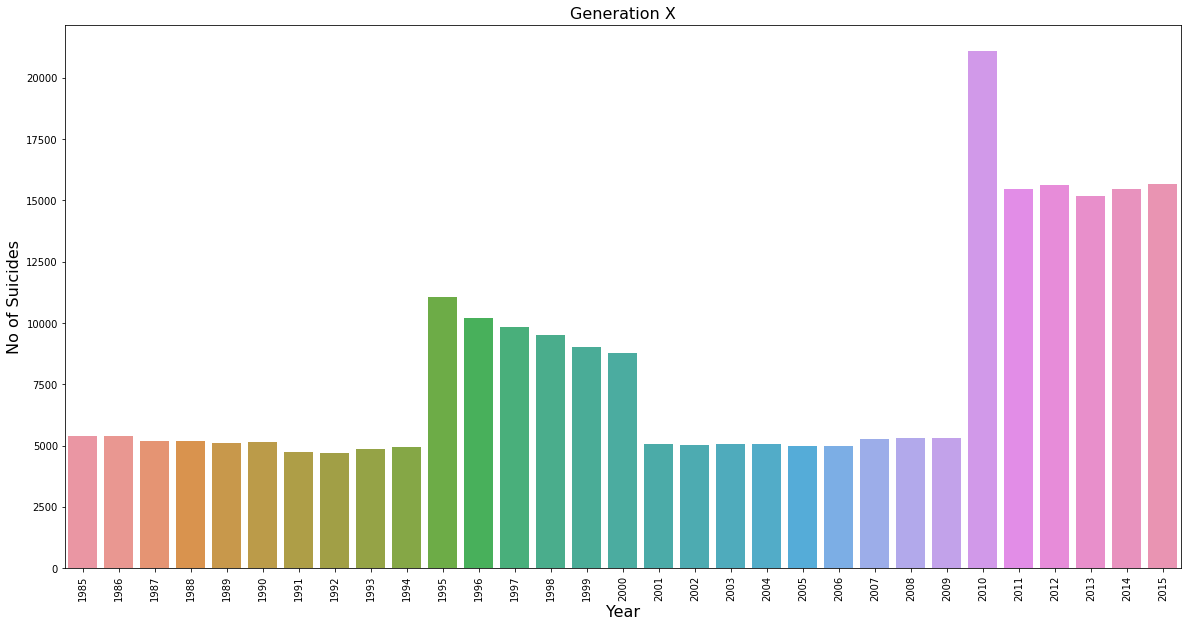

Worst year for Boomers was 1994


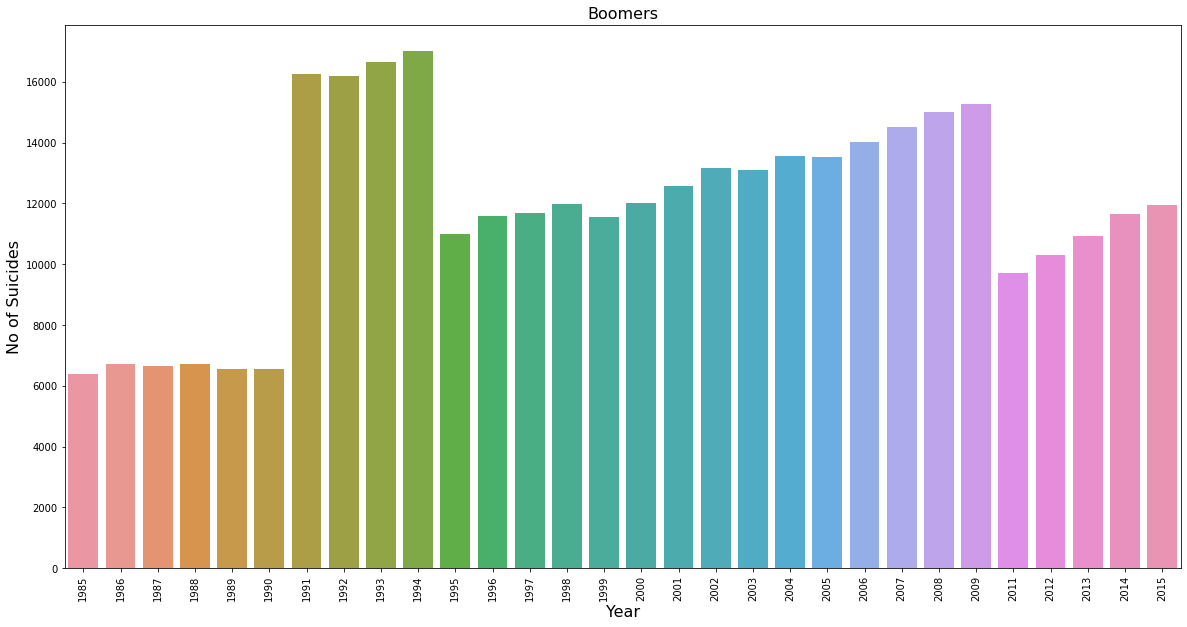

Worst year for Generation Z was 2014


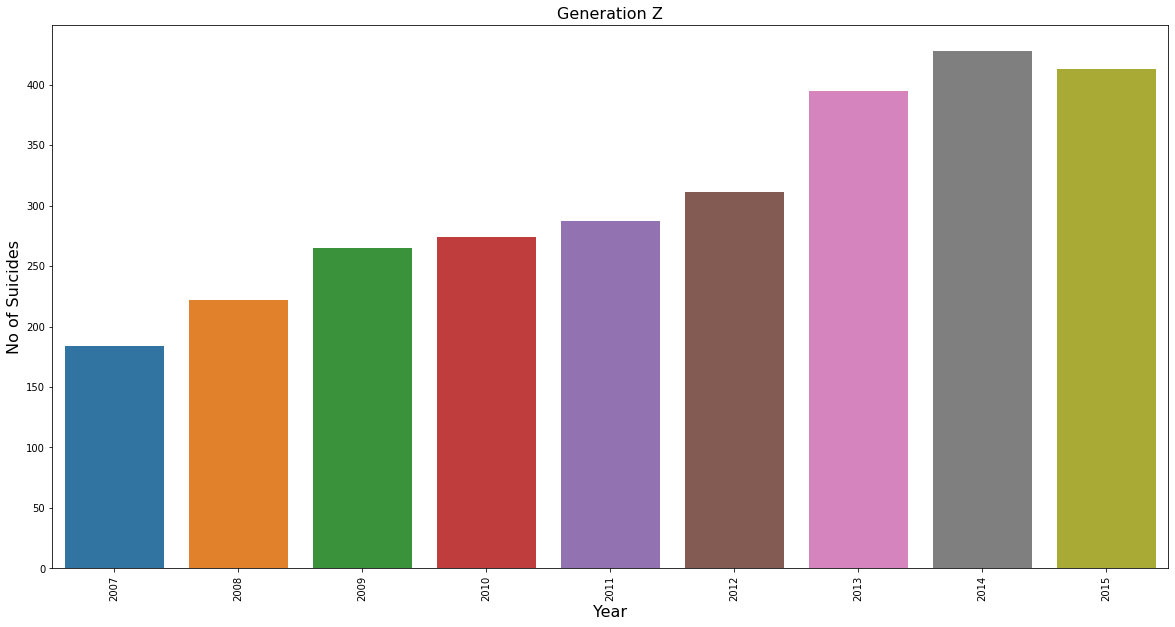

Worst year for Millenials was 2015


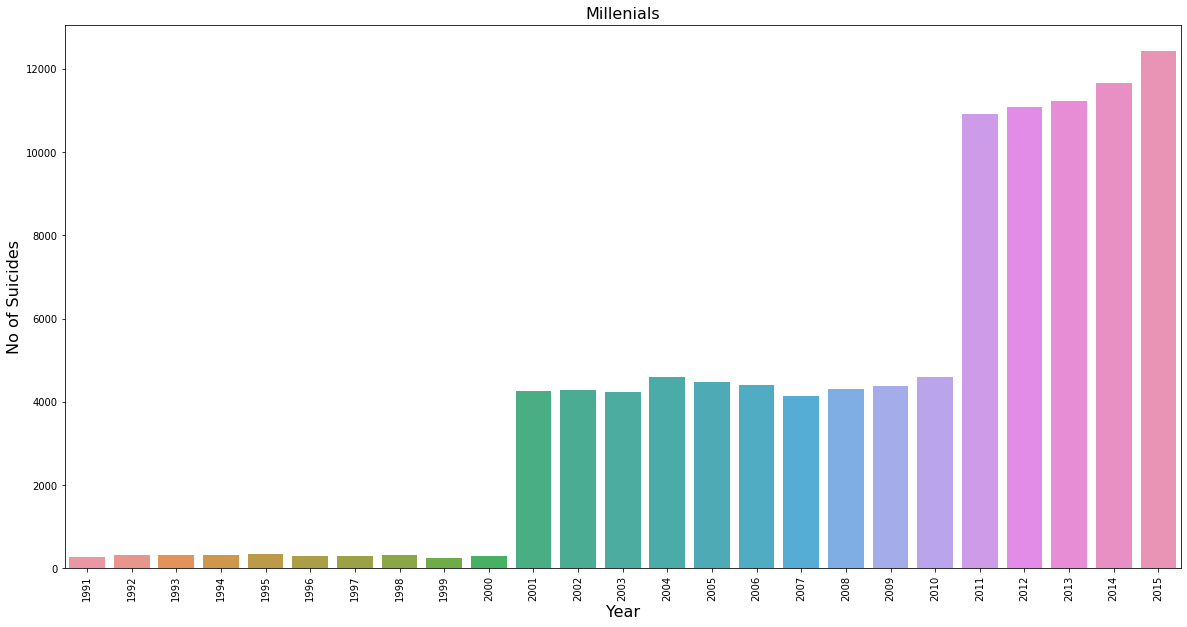

Worst year for G.I. Generation was 1987


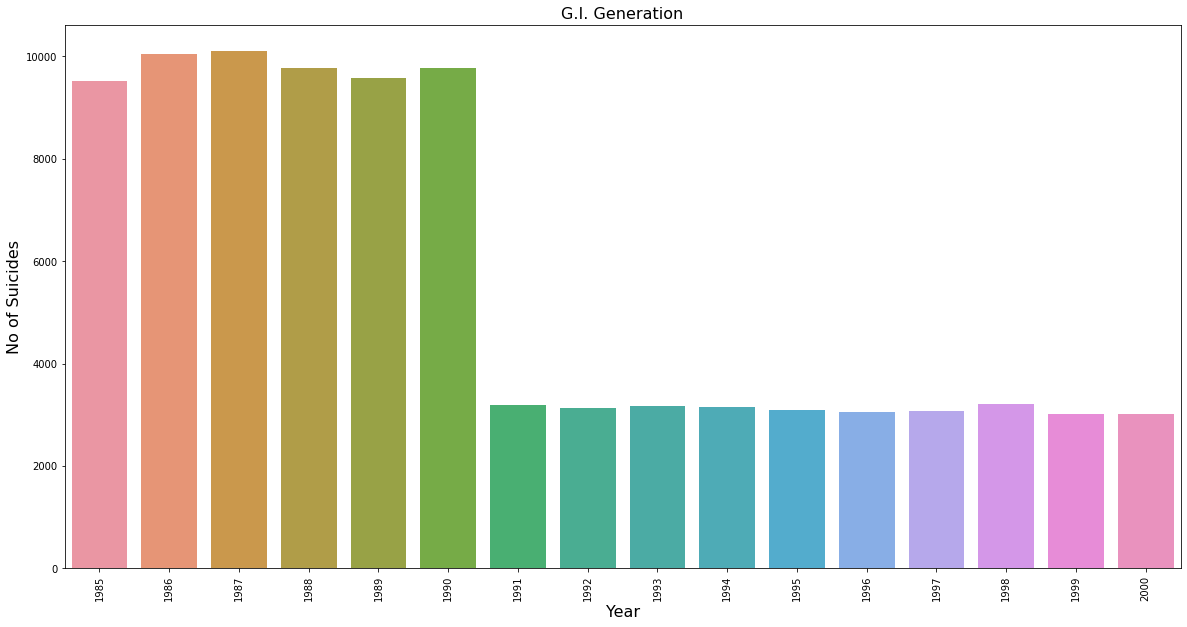

In [104]:
data1 = data.groupby(['country','generation','year']).sum()
#we group the data by country, generation and year 
usa_data = data1.xs('United States')
#we take a cross section of the df with USA as the country
gens = set([i[0] for i,row in usa_data.iterrows()])
#The above line is to find the distinct generations in the suicides data for USA
for i in gens:
    gen_data = ((usa_data.xs(i))['suicides_no'])
    sns.barplot(x=gen_data.keys(),y=gen_data.values)
    maximum = max(gen_data.values)
    maximum_year = [i for i in gen_data.keys() if(gen_data[i]==maximum)]
    print("Worst year for",i,"was",maximum_year[0]) 
    plt.xticks(rotation=90)
    plt.xlabel('Year')
    plt.ylabel('No of Suicides')
    plt.title(i)
    plt.show()


<h2>Part (e)</h2>

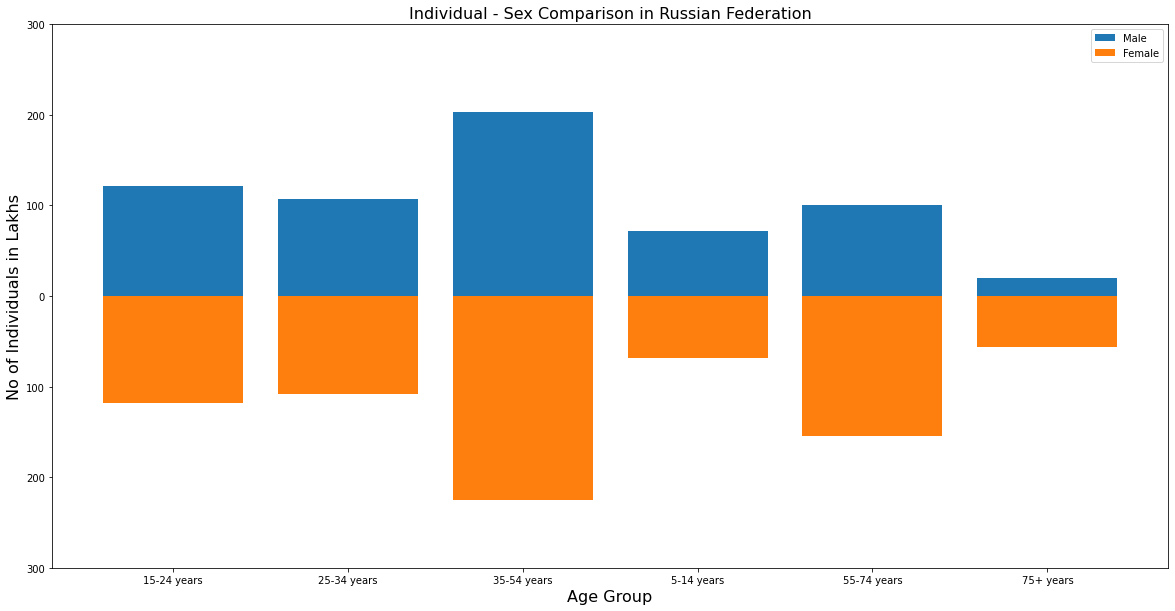

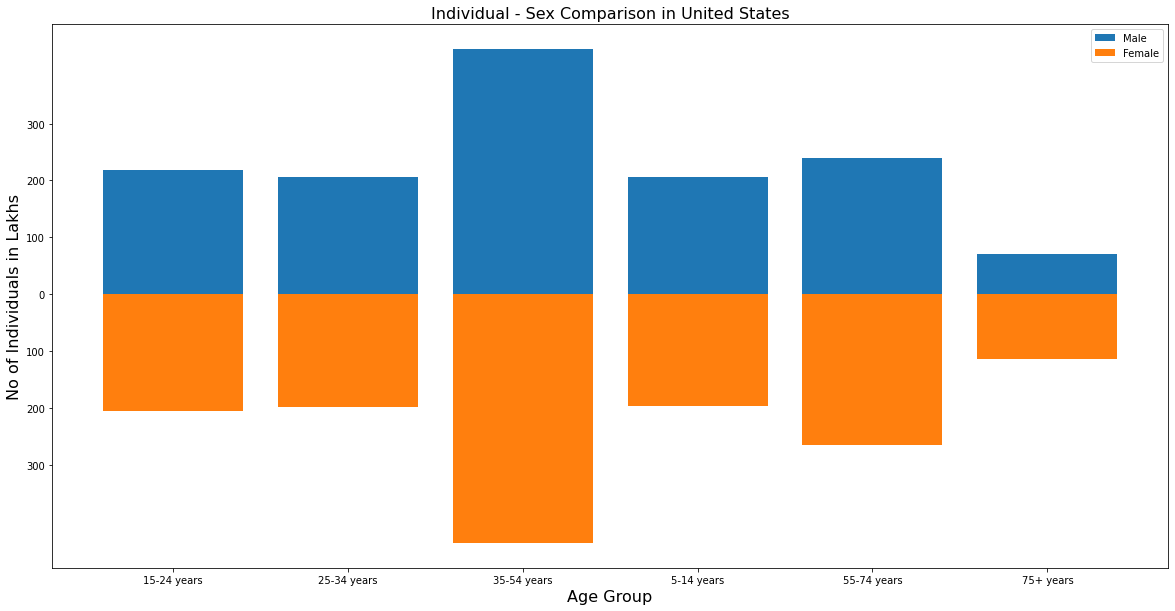

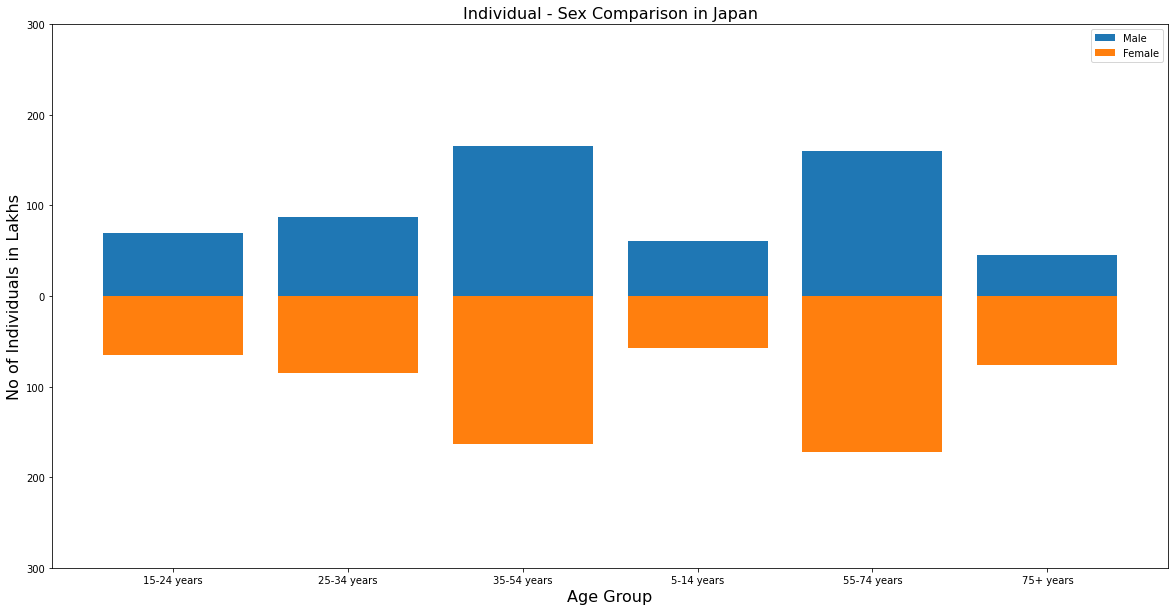

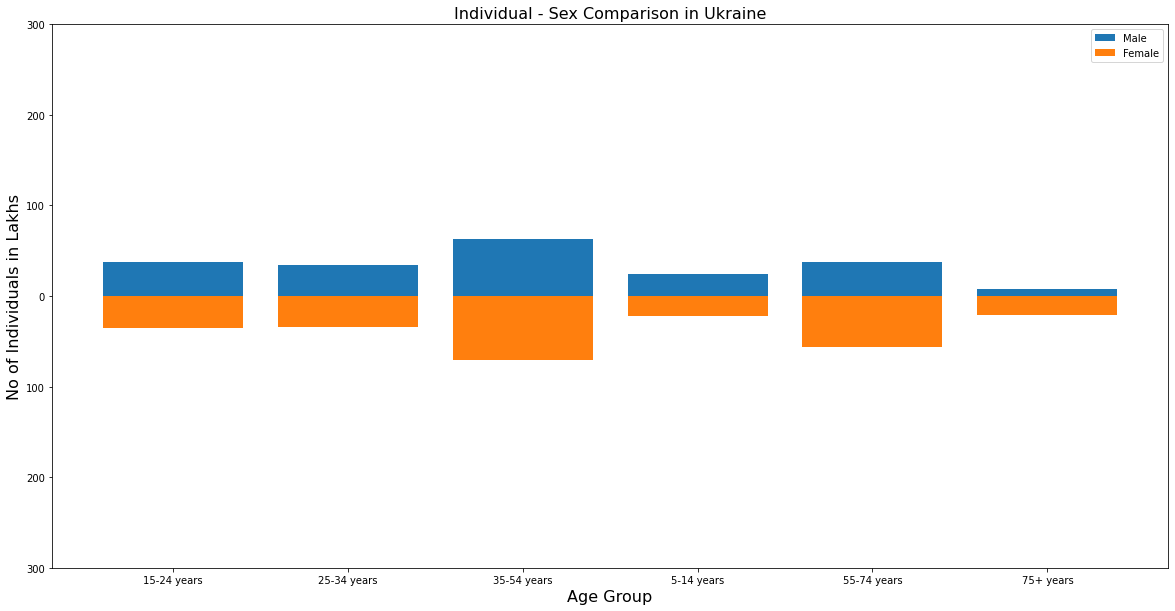

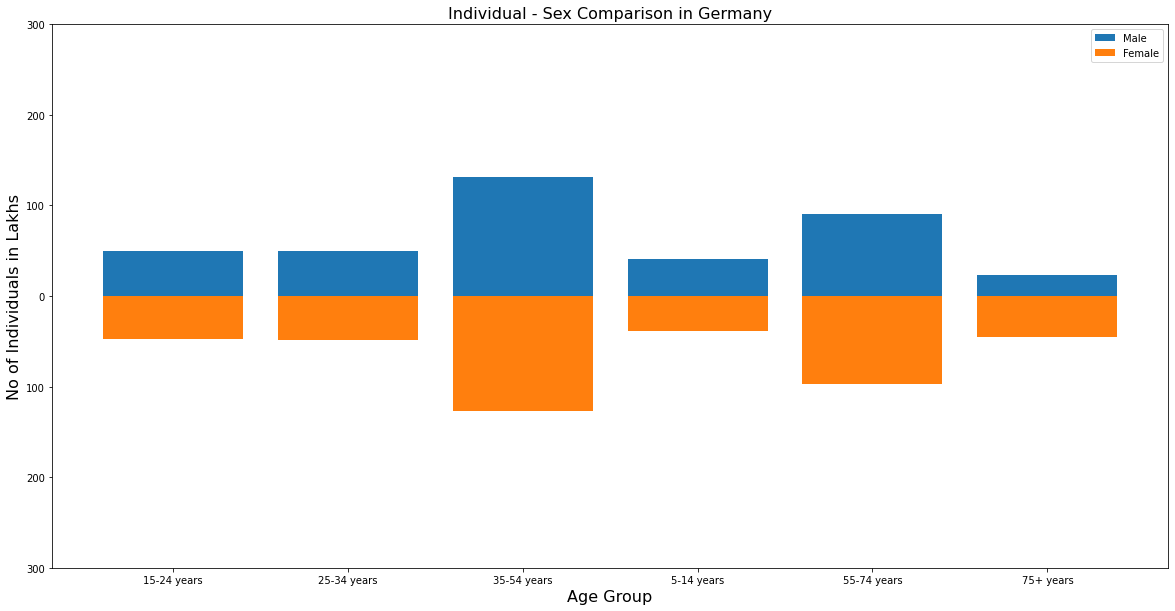

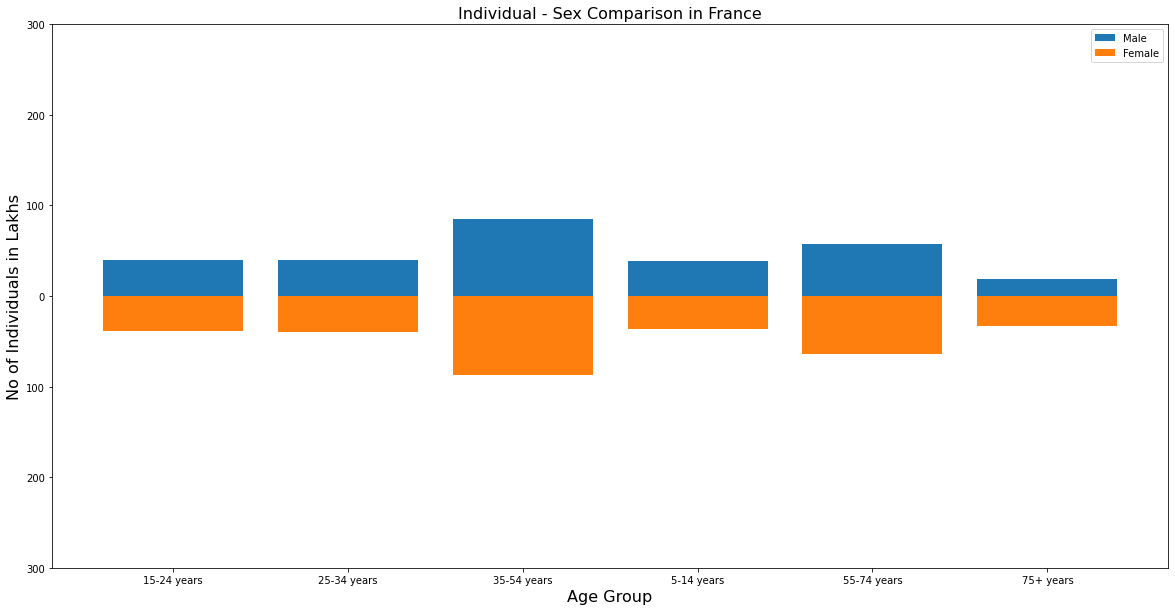

In [105]:
data1 = data.groupby(['year','country','sex','age']).sum()
#group dataframe by year country sex and then age 
#choosing the year as 2009
year = 2006
data1 = data1.xs(year, level = 'year')
for i in topsix_countries:
    #we collect subsets of the data for males and females
    male_data = data1.xs(i).xs('male')
    female_data = data1.xs(i).xs('female')
    #we plot the male data on the positive vertical axis
    plt.bar(list(male_data['population'].keys()),list(np.array(male_data['population'].values)/100000))
    #we plot the male data on the negative vertical axis by converting all elements into its negative
    plt.bar(list(female_data['population'].keys()), list(-np.array((female_data['population'].values))/100000))
    #y axis ticks for +ve part
    ticks = range(-300, 400, 100)
    plt.yticks(ticks,[abs(i) for i in ticks])
    #removing minus from the -ve part as no of suicides cannot be negative
    plt.legend(['Male','Female'])
    plt.ylabel('No of Individuals in Lakhs')
    plt.xlabel('Age Group')
    plt.title('Individual - Sex Comparison in '+i)
    plt.show()


<h2>Part (f)</h2>

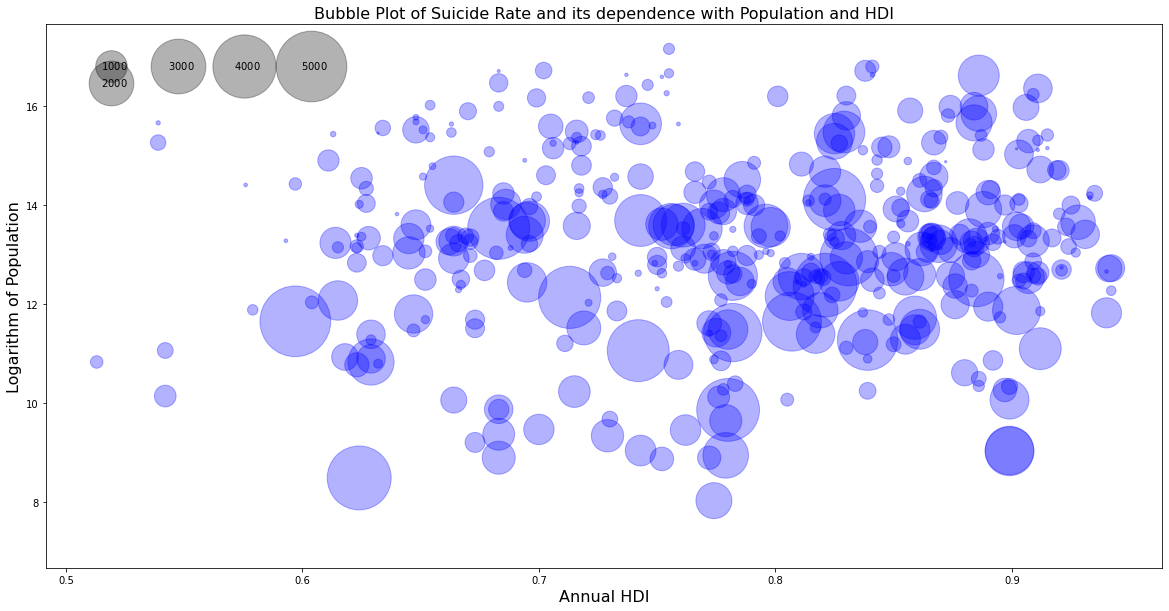

In [106]:
newdata = data.dropna(subset=['HDI for year']).sample(n=500)
#Taking a random sample subset of 500 entries from those entries of data which do not have nan in them 
x1 = newdata['HDI for year']
#using log transformation as population size is very diverse
x2 = np.log(newdata['population'])
x3 = newdata['suicides/100k pop']
#color of the bubbles is blue and opacity of the bubbles is alpha = 0.3, taking a proportionate size of s to make radius of bubble sufficiently visible 
p = plt.scatter(x1,x2,s=40*x3,c='blue',alpha=0.3)
plt.ylabel('Logarithm of Population')
plt.xlabel('Annual HDI')
#To print legend of bubble plot
plt.legend(*p.legend_elements("sizes", num=5),ncol=4, frameon=False, handlelength=6, borderpad = 3,handletextpad=-4)
plt.title("Bubble Plot of Suicide Rate and its dependence with Population and HDI")
plt.show()

<h3>An interesting observation is that majority of the countries with large suicide rates have HDI from 0.7 to 0.9. Whereas countries with larger suicide rates (larger bubble radius) have HDI from 0.65 to 0.85</h3>

<h2>Some References</h2>
[1] <a href = "https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/">https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/</a>

[2] <a href = "https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python/39210767#39210767">https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python/39210767#39210767</a>

[3] <a href = "https://stackoverflow.com/questions/36795949/python-testing-if-my-data-follows-a-lognormal-distribution">https://stackoverflow.com/questions/36795949/python-testing-if-my-data-follows-a-lognormal-distribution</a>

[4] <a href = "https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/">https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/</a>

[5] <a href = "https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/">https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/</a>